# 제품 이상여부 판별 프로젝트


## 1. 데이터 불러오기


### 필수 라이브러리


In [2]:
import os
from pprint import pprint

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import (
    # accuracy_score,
    # classification_report,
    # confusion_matrix,
    # f1_score,
    # precision_score,
    # recall_score,
# )
# from sklearn.model_selection import train_test_split
# from tqdm import tqdm

# from google.colab import drive; drive.mount('/content/drive'); ROOT_DIR = "/content/drive/MyDrive/Projects/LG_Aimers_5th/Jongwu/Data"
ROOT_DIR = "data"
RANDOM_STATE = 110

### 데이터 읽어오기


In [28]:
# Load data
train_data = pd.read_csv(os.path.join(ROOT_DIR, "train.csv"))
test_data = pd.read_csv(os.path.join(ROOT_DIR, "test.csv"))

### Dealing with Coordinates

In [7]:
columns = train_data.columns.tolist()
for column in columns:
    print(f"'{column}',")

'Wip Line_Dam',
'Process Desc._Dam',
'Equipment_Dam',
'Model.Suffix_Dam',
'Workorder_Dam',
'Insp. Seq No._Dam',
'Insp Judge Code_Dam',
'CURE END POSITION X Collect Result_Dam',
'CURE END POSITION X Unit Time_Dam',
'CURE END POSITION X Judge Value_Dam',
'CURE END POSITION Z Collect Result_Dam',
'CURE END POSITION Z Unit Time_Dam',
'CURE END POSITION Z Judge Value_Dam',
'CURE END POSITION Θ Collect Result_Dam',
'CURE END POSITION Θ Unit Time_Dam',
'CURE END POSITION Θ Judge Value_Dam',
'CURE SPEED Collect Result_Dam',
'CURE SPEED Unit Time_Dam',
'CURE SPEED Judge Value_Dam',
'CURE STANDBY POSITION X Collect Result_Dam',
'CURE STANDBY POSITION X Unit Time_Dam',
'CURE STANDBY POSITION X Judge Value_Dam',
'CURE STANDBY POSITION Z Collect Result_Dam',
'CURE STANDBY POSITION Z Unit Time_Dam',
'CURE STANDBY POSITION Z Judge Value_Dam',
'CURE STANDBY POSITION Θ Collect Result_Dam',
'CURE STANDBY POSITION Θ Unit Time_Dam',
'CURE STANDBY POSITION Θ Judge Value_Dam',
'CURE START POSITION X Collect

### Spherical coordinate mapping + Target encoding

In [29]:
Coordinate_columns = ['HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill2',
'HEAD NORMAL COORDINATE X AXIS(Stage1) Unit Time_Fill2',
'HEAD NORMAL COORDINATE X AXIS(Stage1) Judge Value_Fill2',
'HEAD NORMAL COORDINATE X AXIS(Stage2) Collect Result_Fill2',
'HEAD NORMAL COORDINATE X AXIS(Stage2) Unit Time_Fill2',
'HEAD NORMAL COORDINATE X AXIS(Stage2) Judge Value_Fill2',
'HEAD NORMAL COORDINATE X AXIS(Stage3) Collect Result_Fill2',
'HEAD NORMAL COORDINATE X AXIS(Stage3) Unit Time_Fill2',
'HEAD NORMAL COORDINATE X AXIS(Stage3) Judge Value_Fill2',
'HEAD NORMAL COORDINATE Y AXIS(Stage1) Collect Result_Fill2',
'HEAD NORMAL COORDINATE Y AXIS(Stage1) Unit Time_Fill2',
'HEAD NORMAL COORDINATE Y AXIS(Stage1) Judge Value_Fill2',
'HEAD NORMAL COORDINATE Y AXIS(Stage2) Collect Result_Fill2',
'HEAD NORMAL COORDINATE Y AXIS(Stage2) Unit Time_Fill2',
'HEAD NORMAL COORDINATE Y AXIS(Stage2) Judge Value_Fill2',
'HEAD NORMAL COORDINATE Y AXIS(Stage3) Collect Result_Fill2',
'HEAD NORMAL COORDINATE Y AXIS(Stage3) Unit Time_Fill2',
'HEAD NORMAL COORDINATE Y AXIS(Stage3) Judge Value_Fill2',
'HEAD NORMAL COORDINATE Z AXIS(Stage1) Collect Result_Fill2',
'HEAD NORMAL COORDINATE Z AXIS(Stage1) Unit Time_Fill2',
'HEAD NORMAL COORDINATE Z AXIS(Stage1) Judge Value_Fill2',
'HEAD NORMAL COORDINATE Z AXIS(Stage2) Collect Result_Fill2',
'HEAD NORMAL COORDINATE Z AXIS(Stage2) Unit Time_Fill2',
'HEAD NORMAL COORDINATE Z AXIS(Stage2) Judge Value_Fill2',
'HEAD NORMAL COORDINATE Z AXIS(Stage3) Collect Result_Fill2',
'HEAD NORMAL COORDINATE Z AXIS(Stage3) Unit Time_Fill2',
'HEAD NORMAL COORDINATE Z AXIS(Stage3) Judge Value_Fill2',
'HEAD Standby Position X Collect Result_Fill2',
'HEAD Standby Position X Unit Time_Fill2',
'HEAD Standby Position X Judge Value_Fill2',
'HEAD Standby Position Y Collect Result_Fill2',
'HEAD Standby Position Y Unit Time_Fill2',
'HEAD Standby Position Y Judge Value_Fill2',
'HEAD Standby Position Z Collect Result_Fill2',
'HEAD Standby Position Z Unit Time_Fill2',
'HEAD Standby Position Z Judge Value_Fill2',
'Head Clean Position X Collect Result_Fill2',
'Head Clean Position X Unit Time_Fill2',
'Head Clean Position X Judge Value_Fill2',
'Head Clean Position Y Collect Result_Fill2',
'Head Clean Position Y Unit Time_Fill2',
'Head Clean Position Y Judge Value_Fill2',
'Head Clean Position Z Collect Result_Fill2',
'Head Clean Position Z Unit Time_Fill2',
'Head Clean Position Z Judge Value_Fill2',
'Head Purge Position X Collect Result_Fill2',
'Head Purge Position X Unit Time_Fill2',
'Head Purge Position X Judge Value_Fill2',
'Head Purge Position Y Collect Result_Fill2',
'Head Purge Position Y Unit Time_Fill2',
'Head Purge Position Y Judge Value_Fill2',
'Head Purge Position Z Collect Result_Fill2',
'Head Purge Position Z Unit Time_Fill2',
'Head Purge Position Z Judge Value_Fill2',
'CURE END POSITION X Collect Result_Fill2',
'CURE END POSITION X Unit Time_Fill2',
'CURE END POSITION X Judge Value_Fill2',
'CURE END POSITION Z Collect Result_Fill2',
'CURE END POSITION Z Unit Time_Fill2',
'CURE END POSITION Z Judge Value_Fill2',
'CURE END POSITION Θ Collect Result_Fill2',
'CURE END POSITION Θ Unit Time_Fill2',
'CURE END POSITION Θ Judge Value_Fill2',
'CURE STANDBY POSITION X Collect Result_Fill2',
'CURE STANDBY POSITION X Unit Time_Fill2',
'CURE STANDBY POSITION X Judge Value_Fill2',
'CURE STANDBY POSITION Z Collect Result_Fill2',
'CURE STANDBY POSITION Z Unit Time_Fill2',
'CURE STANDBY POSITION Z Judge Value_Fill2',
'CURE STANDBY POSITION Θ Collect Result_Fill2',
'CURE STANDBY POSITION Θ Unit Time_Fill2',
'CURE STANDBY POSITION Θ Judge Value_Fill2',
'CURE START POSITION X Collect Result_Fill2',
'CURE START POSITION X Unit Time_Fill2',
'CURE START POSITION X Judge Value_Fill2',
'CURE START POSITION Z Collect Result_Fill2',
'CURE START POSITION Z Unit Time_Fill2',
'CURE START POSITION Z Judge Value_Fill2',
'CURE START POSITION Θ Collect Result_Fill2',
'CURE START POSITION Θ Unit Time_Fill2',
'CURE START POSITION Θ Judge Value_Fill2',
'CURE END POSITION X Collect Result_Dam',
'CURE END POSITION X Unit Time_Dam',
'CURE END POSITION X Judge Value_Dam',
'CURE END POSITION Z Collect Result_Dam',
'CURE END POSITION Z Unit Time_Dam',
'CURE END POSITION Z Judge Value_Dam',
'CURE END POSITION Θ Collect Result_Dam',
'CURE END POSITION Θ Unit Time_Dam',
'CURE END POSITION Θ Judge Value_Dam',
'CURE STANDBY POSITION X Collect Result_Dam',
'CURE STANDBY POSITION X Unit Time_Dam',
'CURE STANDBY POSITION X Judge Value_Dam',
'CURE STANDBY POSITION Z Collect Result_Dam',
'CURE STANDBY POSITION Z Unit Time_Dam',
'CURE STANDBY POSITION Z Judge Value_Dam',
'CURE STANDBY POSITION Θ Collect Result_Dam',
'CURE STANDBY POSITION Θ Unit Time_Dam',
'CURE STANDBY POSITION Θ Judge Value_Dam',
'CURE START POSITION X Collect Result_Dam',
'CURE START POSITION X Unit Time_Dam',
'CURE START POSITION X Judge Value_Dam',
'CURE START POSITION Z Collect Result_Dam',
'CURE START POSITION Z Unit Time_Dam',
'CURE START POSITION Z Judge Value_Dam',
'CURE START POSITION Θ Collect Result_Dam',
'CURE START POSITION Θ Unit Time_Dam',
'CURE START POSITION Θ Judge Value_Dam',
'HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Dam',
'HEAD NORMAL COORDINATE X AXIS(Stage1) Unit Time_Dam',
'HEAD NORMAL COORDINATE X AXIS(Stage1) Judge Value_Dam',
'HEAD NORMAL COORDINATE X AXIS(Stage2) Collect Result_Dam',
'HEAD NORMAL COORDINATE X AXIS(Stage2) Unit Time_Dam',
'HEAD NORMAL COORDINATE X AXIS(Stage2) Judge Value_Dam',
'HEAD NORMAL COORDINATE X AXIS(Stage3) Collect Result_Dam',
'HEAD NORMAL COORDINATE X AXIS(Stage3) Unit Time_Dam',
'HEAD NORMAL COORDINATE X AXIS(Stage3) Judge Value_Dam',
'HEAD NORMAL COORDINATE Y AXIS(Stage1) Collect Result_Dam',
'HEAD NORMAL COORDINATE Y AXIS(Stage1) Unit Time_Dam',
'HEAD NORMAL COORDINATE Y AXIS(Stage1) Judge Value_Dam',
'HEAD NORMAL COORDINATE Y AXIS(Stage2) Collect Result_Dam',
'HEAD NORMAL COORDINATE Y AXIS(Stage2) Unit Time_Dam',
'HEAD NORMAL COORDINATE Y AXIS(Stage2) Judge Value_Dam',
'HEAD NORMAL COORDINATE Y AXIS(Stage3) Collect Result_Dam',
'HEAD NORMAL COORDINATE Y AXIS(Stage3) Unit Time_Dam',
'HEAD NORMAL COORDINATE Y AXIS(Stage3) Judge Value_Dam',
'HEAD NORMAL COORDINATE Z AXIS(Stage1) Collect Result_Dam',
'HEAD NORMAL COORDINATE Z AXIS(Stage1) Unit Time_Dam',
'HEAD NORMAL COORDINATE Z AXIS(Stage1) Judge Value_Dam',
'HEAD NORMAL COORDINATE Z AXIS(Stage2) Collect Result_Dam',
'HEAD NORMAL COORDINATE Z AXIS(Stage2) Unit Time_Dam',
'HEAD NORMAL COORDINATE Z AXIS(Stage2) Judge Value_Dam',
'HEAD NORMAL COORDINATE Z AXIS(Stage3) Collect Result_Dam',
'HEAD NORMAL COORDINATE Z AXIS(Stage3) Unit Time_Dam',
'HEAD NORMAL COORDINATE Z AXIS(Stage3) Judge Value_Dam',
'HEAD Standby Position X Collect Result_Dam',
'HEAD Standby Position X Unit Time_Dam',
'HEAD Standby Position X Judge Value_Dam',
'HEAD Standby Position Y Collect Result_Dam',
'HEAD Standby Position Y Unit Time_Dam',
'HEAD Standby Position Y Judge Value_Dam',
'HEAD Standby Position Z Collect Result_Dam',
'HEAD Standby Position Z Unit Time_Dam',
'HEAD Standby Position Z Judge Value_Dam',
'Head Clean Position X Collect Result_Dam',
'Head Clean Position X Unit Time_Dam',
'Head Clean Position X Judge Value_Dam',
'Head Clean Position Y Collect Result_Dam',
'Head Clean Position Y Unit Time_Dam',
'Head Clean Position Y Judge Value_Dam',
'Head Clean Position Z Collect Result_Dam',
'Head Clean Position Z Unit Time_Dam',
'Head Clean Position Z Judge Value_Dam',
'Head Purge Position X Collect Result_Dam',
'Head Purge Position X Unit Time_Dam',
'Head Purge Position X Judge Value_Dam',
'Head Purge Position Y Collect Result_Dam',
'Head Purge Position Y Unit Time_Dam',
'Head Purge Position Y Judge Value_Dam',
'Head Purge Position Z Collect Result_Dam',
'Head Purge Position Z Unit Time_Dam',
'Head Purge Position Z Judge Value_Dam',
'Head Zero Position X Collect Result_Dam',
'Head Zero Position X Unit Time_Dam',
'Head Zero Position X Judge Value_Dam',
'Head Zero Position Y Collect Result_Dam',
'Head Zero Position Y Unit Time_Dam',
'Head Zero Position Y Judge Value_Dam',
'Head Zero Position Z Collect Result_Dam',
'Head Zero Position Z Unit Time_Dam',
'Head Zero Position Z Judge Value_Dam',
'HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill1',
'HEAD NORMAL COORDINATE X AXIS(Stage1) Unit Time_Fill1',
'HEAD NORMAL COORDINATE X AXIS(Stage1) Judge Value_Fill1',
'HEAD NORMAL COORDINATE X AXIS(Stage2) Collect Result_Fill1',
'HEAD NORMAL COORDINATE X AXIS(Stage2) Unit Time_Fill1',
'HEAD NORMAL COORDINATE X AXIS(Stage2) Judge Value_Fill1',
'HEAD NORMAL COORDINATE X AXIS(Stage3) Collect Result_Fill1',
'HEAD NORMAL COORDINATE X AXIS(Stage3) Unit Time_Fill1',
'HEAD NORMAL COORDINATE X AXIS(Stage3) Judge Value_Fill1',
'HEAD NORMAL COORDINATE Y AXIS(Stage1) Collect Result_Fill1',
'HEAD NORMAL COORDINATE Y AXIS(Stage1) Unit Time_Fill1',
'HEAD NORMAL COORDINATE Y AXIS(Stage1) Judge Value_Fill1',
'HEAD NORMAL COORDINATE Y AXIS(Stage2) Collect Result_Fill1',
'HEAD NORMAL COORDINATE Y AXIS(Stage2) Unit Time_Fill1',
'HEAD NORMAL COORDINATE Y AXIS(Stage2) Judge Value_Fill1',
'HEAD NORMAL COORDINATE Y AXIS(Stage3) Collect Result_Fill1',
'HEAD NORMAL COORDINATE Y AXIS(Stage3) Unit Time_Fill1',
'HEAD NORMAL COORDINATE Y AXIS(Stage3) Judge Value_Fill1',
'HEAD NORMAL COORDINATE Z AXIS(Stage1) Collect Result_Fill1',
'HEAD NORMAL COORDINATE Z AXIS(Stage1) Unit Time_Fill1',
'HEAD NORMAL COORDINATE Z AXIS(Stage1) Judge Value_Fill1',
'HEAD NORMAL COORDINATE Z AXIS(Stage2) Collect Result_Fill1',
'HEAD NORMAL COORDINATE Z AXIS(Stage2) Unit Time_Fill1',
'HEAD NORMAL COORDINATE Z AXIS(Stage2) Judge Value_Fill1',
'HEAD NORMAL COORDINATE Z AXIS(Stage3) Collect Result_Fill1',
'HEAD NORMAL COORDINATE Z AXIS(Stage3) Unit Time_Fill1',
'HEAD NORMAL COORDINATE Z AXIS(Stage3) Judge Value_Fill1',
'HEAD Standby Position X Collect Result_Fill1',
'HEAD Standby Position X Unit Time_Fill1',
'HEAD Standby Position X Judge Value_Fill1',
'HEAD Standby Position Y Collect Result_Fill1',
'HEAD Standby Position Y Unit Time_Fill1',
'HEAD Standby Position Y Judge Value_Fill1',
'HEAD Standby Position Z Collect Result_Fill1',
'HEAD Standby Position Z Unit Time_Fill1',
'HEAD Standby Position Z Judge Value_Fill1',
'Head Clean Position X Collect Result_Fill1',
'Head Clean Position X Unit Time_Fill1',
'Head Clean Position X Judge Value_Fill1',
'Head Clean Position Y Collect Result_Fill1',
'Head Clean Position Y Unit Time_Fill1',
'Head Clean Position Y Judge Value_Fill1',
'Head Clean Position Z Collect Result_Fill1',
'Head Clean Position Z Unit Time_Fill1',
'Head Clean Position Z Judge Value_Fill1',
'Head Purge Position X Collect Result_Fill1',
'Head Purge Position X Unit Time_Fill1',
'Head Purge Position X Judge Value_Fill1',
'Head Purge Position Y Collect Result_Fill1',
'Head Purge Position Y Unit Time_Fill1',
'Head Purge Position Y Judge Value_Fill1',
'Head Purge Position Z Collect Result_Fill1',
'Head Purge Position Z Unit Time_Fill1',
'Head Purge Position Z Judge Value_Fill1']


In [30]:
filtered_columns = Coordinate_columns

# Create a DataFrame with only the filtered columns
filtered_train_set = train_data[filtered_columns]
filtered_test_set = test_data[filtered_columns]

# Drop columns with more than one null value from the filtered DataFrame
filtered_train_set = filtered_train_set.dropna(axis=1, thresh=1)
filtered_test_set = filtered_test_set.dropna(axis=1, thresh=1)

# Print the filtered columns
print("The number of columns containing 'coordinate' or 'position':")
print(len(filtered_columns))
print("The name of columns")
print(filtered_columns)

The number of columns containing 'coordinate' or 'position':
225
The name of columns
['HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill2', 'HEAD NORMAL COORDINATE X AXIS(Stage1) Unit Time_Fill2', 'HEAD NORMAL COORDINATE X AXIS(Stage1) Judge Value_Fill2', 'HEAD NORMAL COORDINATE X AXIS(Stage2) Collect Result_Fill2', 'HEAD NORMAL COORDINATE X AXIS(Stage2) Unit Time_Fill2', 'HEAD NORMAL COORDINATE X AXIS(Stage2) Judge Value_Fill2', 'HEAD NORMAL COORDINATE X AXIS(Stage3) Collect Result_Fill2', 'HEAD NORMAL COORDINATE X AXIS(Stage3) Unit Time_Fill2', 'HEAD NORMAL COORDINATE X AXIS(Stage3) Judge Value_Fill2', 'HEAD NORMAL COORDINATE Y AXIS(Stage1) Collect Result_Fill2', 'HEAD NORMAL COORDINATE Y AXIS(Stage1) Unit Time_Fill2', 'HEAD NORMAL COORDINATE Y AXIS(Stage1) Judge Value_Fill2', 'HEAD NORMAL COORDINATE Y AXIS(Stage2) Collect Result_Fill2', 'HEAD NORMAL COORDINATE Y AXIS(Stage2) Unit Time_Fill2', 'HEAD NORMAL COORDINATE Y AXIS(Stage2) Judge Value_Fill2', 'HEAD NORMAL COORDINATE 

In [145]:
all_columns = train_data.columns.tolist()
# all_columns = test_data.columns.tolist()

In [146]:
# Define a mapping dictionary to store coordinates
coordinate_mapping = {}
unmatched_columns = []

# Iterate through each column to categorize coordinates
for col in all_columns:
    # Identify the coordinate type first
    if ' X ' in col:
        coord_type = 'X'
    elif ' Y ' in col:
        coord_type = 'Y'
    elif ' Z ' in col:
        coord_type = 'Z'
    elif ' Θ ' in col:
        coord_type = 'Y'  # Treat Θ as Y for consistency
    else:
        coord_type = None

    # If a valid coordinate type is found, determine the category
    if coord_type:
        # Standardize category name by removing specific coordinate indicators
        category = col.replace(' X ', ' ').replace(' Y ', ' ').replace(' Z ', ' ').replace(' Θ ', ' ').strip()

        # Further clean up to standardize category names, keeping common phrases
        if "Collect Result" in col:
            category += " Collect Result"
        elif "Judge Value" in col:
            category += " Judge Value"

        # Add to mapping based on category and coordinate type
        if category not in coordinate_mapping:
            coordinate_mapping[category] = {}
        coordinate_mapping[category][coord_type] = col

# Prepare lists to store full groups, partial groups, and unmatched
full_groups = []
partial_groups = []
unmatched = []

# Simulate a DataFrame with some missing values
# Example:
# train_data = pd.read_csv('your_data.csv')

# Classify the results
for category, coords in coordinate_mapping.items():
    if len(coords) == 3:
        # Check for missing values in the full group
        columns_to_check = [coords['X'], coords['Y'], coords['Z']]
        if train_data[columns_to_check].isnull().any().any():  # Check if any column in the full group has missing values
            partial_groups.append((category, coords))
        else:
            full_groups.append((category, coords))
    elif len(coords) == 2:
        partial_groups.append((category, coords))
    else:
        unmatched.append((category, coords))

# Output results
print("\nFull Groups (X, Y, Z all present and no missing values):")
for category, coords in full_groups:
    print(f"Category: {category}")
    for coord_type, col_name in coords.items():
        print(f"  {coord_type}: {col_name}")

print("\nPartial Groups (includes those downgraded due to missing values):")
for category, coords in partial_groups:
    print(f"Category: {category}")
    for coord_type, col_name in coords.items():
        print(f"  {coord_type}: {col_name}")

print("\nUnmatched (less than 2 coordinates present):")
for category, coords in unmatched:
    print(f"Category: {category}")
    for coord_type, col_name in coords.items():
        print(f"  {coord_type}: {col_name}")



Full Groups (X, Y, Z all present and no missing values):
Category: CURE END POSITION Collect Result_Dam Collect Result
  X: CURE END POSITION X Collect Result_Dam
  Z: CURE END POSITION Z Collect Result_Dam
  Y: CURE END POSITION Θ Collect Result_Dam
Category: CURE STANDBY POSITION Collect Result_Dam Collect Result
  X: CURE STANDBY POSITION X Collect Result_Dam
  Z: CURE STANDBY POSITION Z Collect Result_Dam
  Y: CURE STANDBY POSITION Θ Collect Result_Dam
Category: CURE START POSITION Collect Result_Dam Collect Result
  X: CURE START POSITION X Collect Result_Dam
  Z: CURE START POSITION Z Collect Result_Dam
  Y: CURE START POSITION Θ Collect Result_Dam
Category: HEAD NORMAL COORDINATE AXIS(Stage2) Collect Result_Dam Collect Result
  X: HEAD NORMAL COORDINATE X AXIS(Stage2) Collect Result_Dam
  Y: HEAD NORMAL COORDINATE Y AXIS(Stage2) Collect Result_Dam
  Z: HEAD NORMAL COORDINATE Z AXIS(Stage2) Collect Result_Dam
Category: HEAD NORMAL COORDINATE AXIS(Stage3) Collect Result_Dam Colle

In [147]:
# Define a mapping dictionary to store coordinates
coordinate_mapping = {}
unmatched_columns = []

# Iterate through each column to categorize coordinates
for col in all_columns:
    # Identify the coordinate type first
    if ' X ' in col:
        coord_type = 'X'
    elif ' Y ' in col:
        coord_type = 'Y'
    elif ' Z ' in col:
        coord_type = 'Z'
    elif ' Θ ' in col:
        coord_type = 'Y'  # Treat Θ as Y for consistency
    else:
        coord_type = None

    # If a valid coordinate type is found, determine the category
    if coord_type:
        # Standardize category name by removing specific coordinate indicators
        category = col.replace(' X ', ' ').replace(' Y ', ' ').replace(' Z ', ' ').replace(' Θ ', ' ').strip()

        # Further clean up to standardize category names, keeping common phrases
        if "Collect Result" in col:
            category += " Collect Result"
        elif "Judge Value" in col:
            category += " Judge Value"

        # Add to mapping based on category and coordinate type
        if category not in coordinate_mapping:
            coordinate_mapping[category] = {}
        coordinate_mapping[category][coord_type] = col

# Prepare lists to store full groups, partial groups, and unmatched
full_groups = []
partial_groups = []
unmatched = []

# Simulate a DataFrame with some missing values
# Example:
# train_data = pd.read_csv('your_data.csv')

# Classify the results
for category, coords in coordinate_mapping.items():
    if len(coords) == 3:
        # Check for missing values in the full group
        columns_to_check = [coords['X'], coords['Y'], coords['Z']]
        if train_data[columns_to_check].isnull().any().any():  # Check if any column in the full group has missing values
            partial_groups.append((category, coords))
        else:
            full_groups.append((category, coords))
    elif len(coords) == 2:
        partial_groups.append((category, coords))
    else:
        unmatched.append((category, coords))

# Output results
print("\nFull Groups (X, Y, Z all present and no missing values):")
for category, coords in full_groups:
    print(f"Category: {category}")
    for coord_type, col_name in coords.items():
        print(f"  {coord_type}: {col_name}")

print("\nPartial Groups (includes those downgraded due to missing values):")
for category, coords in partial_groups:
    print(f"Category: {category}")
    for coord_type, col_name in coords.items():
        print(f"  {coord_type}: {col_name}")

print("\nUnmatched (less than 2 coordinates present):")
for category, coords in unmatched:
    print(f"Category: {category}")
    for coord_type, col_name in coords.items():
        print(f"  {coord_type}: {col_name}")



Full Groups (X, Y, Z all present and no missing values):
Category: CURE END POSITION Collect Result_Dam Collect Result
  X: CURE END POSITION X Collect Result_Dam
  Z: CURE END POSITION Z Collect Result_Dam
  Y: CURE END POSITION Θ Collect Result_Dam
Category: CURE STANDBY POSITION Collect Result_Dam Collect Result
  X: CURE STANDBY POSITION X Collect Result_Dam
  Z: CURE STANDBY POSITION Z Collect Result_Dam
  Y: CURE STANDBY POSITION Θ Collect Result_Dam
Category: CURE START POSITION Collect Result_Dam Collect Result
  X: CURE START POSITION X Collect Result_Dam
  Z: CURE START POSITION Z Collect Result_Dam
  Y: CURE START POSITION Θ Collect Result_Dam
Category: HEAD NORMAL COORDINATE AXIS(Stage2) Collect Result_Dam Collect Result
  X: HEAD NORMAL COORDINATE X AXIS(Stage2) Collect Result_Dam
  Y: HEAD NORMAL COORDINATE Y AXIS(Stage2) Collect Result_Dam
  Z: HEAD NORMAL COORDINATE Z AXIS(Stage2) Collect Result_Dam
Category: HEAD NORMAL COORDINATE AXIS(Stage3) Collect Result_Dam Colle

In [148]:
full_groups = []
partial_groups = []
unmatched = []

# Classify the results
for category, coords in coordinate_mapping.items():
    if len(coords) == 3:
        full_groups.append((category, coords))
    elif len(coords) == 2:
        partial_groups.append((category, coords))
    else:
        unmatched.append((category, coords))

# Output results
print("\nFull Groups (X, Y, Z all present):")
for category, coords in full_groups:
    print(f"Category: {category}")
    for coord_type, col_name in coords.items():
        print(f"  {coord_type}: {col_name}")

print("\nPartial Groups (less than 3 coordinates present):")
for category, coords in partial_groups:
    print(f"Category: {category}")
    for coord_type, col_name in coords.items():
        print(f"  {coord_type}: {col_name}")

print("\nUnmatched (less than 2 coordinates present):")
for category, coords in unmatched:
    print(f"Category: {category}")
    for coord_type, col_name in coords.items():
        print(f"  {coord_type}: {col_name}")


Full Groups (X, Y, Z all present):
Category: CURE END POSITION Collect Result_Dam Collect Result
  X: CURE END POSITION X Collect Result_Dam
  Z: CURE END POSITION Z Collect Result_Dam
  Y: CURE END POSITION Θ Collect Result_Dam
Category: CURE END POSITION Unit Time_Dam
  X: CURE END POSITION X Unit Time_Dam
  Z: CURE END POSITION Z Unit Time_Dam
  Y: CURE END POSITION Θ Unit Time_Dam
Category: CURE END POSITION Judge Value_Dam Judge Value
  X: CURE END POSITION X Judge Value_Dam
  Z: CURE END POSITION Z Judge Value_Dam
  Y: CURE END POSITION Θ Judge Value_Dam
Category: CURE STANDBY POSITION Collect Result_Dam Collect Result
  X: CURE STANDBY POSITION X Collect Result_Dam
  Z: CURE STANDBY POSITION Z Collect Result_Dam
  Y: CURE STANDBY POSITION Θ Collect Result_Dam
Category: CURE STANDBY POSITION Unit Time_Dam
  X: CURE STANDBY POSITION X Unit Time_Dam
  Z: CURE STANDBY POSITION Z Unit Time_Dam
  Y: CURE STANDBY POSITION Θ Unit Time_Dam
Category: CURE STANDBY POSITION Judge Value_Dam

In [149]:
# Function to convert Cartesian coordinates to spherical coordinates
def cartesian_to_spherical(x, y, z):
    r = np.sqrt(x**2 + y**2 + z**2)
    theta = np.arccos(z / r)  # inclination
    phi = np.arctan2(y, x)    # azimuth
    return r, theta, phi

# Function to calculate distance and angle for partial groups
def distance_and_angle(y, z):
    distance = np.sqrt(y**2 + z**2)
    angle = np.arctan2(z, y)
    return distance, angle

# DataFrames to store results
spherical_coords = pd.DataFrame()
partial_coords = pd.DataFrame()


In [150]:
# Process Full Groups
for category, coords in full_groups:
    x_col = coords['X']
    y_col = coords['Y']
    z_col = coords['Z']
    
    # if there is any missing value in the x_col, y_col, z_col, skip the category
    if train_data[[x_col, y_col, z_col]].isnull().any().any():
        continue

    x = train_data[x_col]
    y = train_data[y_col]
    z = train_data[z_col]

    r, theta, phi = cartesian_to_spherical(x, y, z)
    
    spherical_coords[f'{category}_r'] = r
    spherical_coords[f'{category}_theta'] = theta
    spherical_coords[f'{category}_phi'] = phi

In [151]:
# Process Partial Groups
for category, coords in partial_groups:
    y_col = coords.get('Y', None)
    z_col = coords.get('Z', None)
    
    if y_col and z_col:
        y = train_data[y_col]
        z = train_data[z_col]
        
        distance, angle = distance_and_angle(y, z)
        
        partial_coords[f'{category}_distance'] = distance
        partial_coords[f'{category}_angle'] = angle

# Output the transformed data
print("Spherical Coordinates for Full Groups:")
print(spherical_coords.head())

print("\nDistance and Angle for Partial Groups:")
print(partial_coords.head())

Spherical Coordinates for Full Groups:
   CURE END POSITION Collect Result_Dam Collect Result_r  \
0                                         256.332304       
1                                         256.332304       
2                                        1004.119639       
3                                        1004.119639       
4                                         256.332304       

   CURE END POSITION Collect Result_Dam Collect Result_theta  \
0                                           1.561043           
1                                           1.561043           
2                                           1.558347           
3                                           1.558347           
4                                           1.561043           

   CURE END POSITION Collect Result_Dam Collect Result_phi  \
0                                          -0.358771         
1                                          -0.358771         
2                            

In [153]:
tr_coords = pd.concat([spherical_coords, partial_coords], axis=1)
tr_coords.head()

,CURE END POSITION Collect Result_Dam Collect Result_r,CURE END POSITION Collect Result_Dam Collect Result_theta,CURE END POSITION Collect Result_Dam Collect Result_phi,CURE STANDBY POSITION Collect Result_Dam Collect Result_r,CURE STANDBY POSITION Collect Result_Dam Collect Result_theta,CURE STANDBY POSITION Collect Result_Dam Collect Result_phi,CURE START POSITION Collect Result_Dam Collect Result_r,CURE START POSITION Collect Result_Dam Collect Result_theta,CURE START POSITION Collect Result_Dam Collect Result_phi,HEAD NORMAL COORDINATE AXIS(Stage2) Collect Result_Dam Collect Result_r,...,HEAD NORMAL COORDINATE AXIS(Stage3) Collect Result_Fill2 Collect Result_phi,HEAD Standby Position Collect Result_Fill2 Collect Result_r,HEAD Standby Position Collect Result_Fill2 Collect Result_theta,HEAD Standby Position Collect Result_Fill2 Collect Result_phi,Head Clean Position Collect Result_Fill2 Collect Result_r,Head Clean Position Collect Result_Fill2 Collect Result_theta,Head Clean Position Collect Result_Fill2 Collect Result_phi,Head Purge Position Collect Result_Fill2 Collect Result_r,Head Purge Position Collect Result_Fill2 Collect Result_theta,Head Purge Position Collect Result_Fill2 Collect Result_phi
0,256.332304,1.561043,-0.358771,1150.487831,1.541674,0.0,1034.467133,1.538407,-0.087157,725.163423,...,0.751434,367.137154,1.434183,0.836551,129.464281,1.174280,1.654633,289.529342,1.397232,1.243058
1,256.332304,1.561043,-0.358771,1150.487831,1.541674,0.0,1034.467133,1.538407,-0.087157,661.115990,...,1.221275,274.772633,1.607198,0.183111,158.392677,0.952593,0.397771,287.445647,1.270600,0.183111
2,1004.119639,1.558347,0.089758,1150.487831,1.541674,0.0,296.010557,1.457382,0.310998,1311.146807,...,1.209892,367.004428,1.434133,0.836959,129.464281,1.174280,1.654633,289.529342,1.397232,1.243058
3,1004.119639,1.558347,0.089758,1150.487831,1.541674,0.0,296.010557,1.457382,0.310998,1382.381048,...,1.088063,274.772633,1.607198,0.183111,158.392677,0.952593,0.397771,287.445647,1.270600,0.183111
4,256.332304,1.561043,-0.358771,1150.487831,1.541674,0.0,1034.467133,1.538407,-0.087157,661.170394,...,1.221275,274.772633,1.607198,0.183111,158.392677,0.952593,0.397771,287.445647,1.270600,0.183111


In [154]:
# drop invariant columns from the tr_coords
tr_coords = tr_coords.loc[:, tr_coords.nunique() > 1]
tr_coords.head()

,CURE END POSITION Collect Result_Dam Collect Result_r,CURE END POSITION Collect Result_Dam Collect Result_theta,CURE END POSITION Collect Result_Dam Collect Result_phi,CURE START POSITION Collect Result_Dam Collect Result_r,CURE START POSITION Collect Result_Dam Collect Result_theta,CURE START POSITION Collect Result_Dam Collect Result_phi,HEAD NORMAL COORDINATE AXIS(Stage2) Collect Result_Dam Collect Result_r,HEAD NORMAL COORDINATE AXIS(Stage2) Collect Result_Dam Collect Result_theta,HEAD NORMAL COORDINATE AXIS(Stage2) Collect Result_Dam Collect Result_phi,HEAD NORMAL COORDINATE AXIS(Stage3) Collect Result_Dam Collect Result_r,...,HEAD NORMAL COORDINATE AXIS(Stage3) Collect Result_Fill2 Collect Result_phi,HEAD Standby Position Collect Result_Fill2 Collect Result_r,HEAD Standby Position Collect Result_Fill2 Collect Result_theta,HEAD Standby Position Collect Result_Fill2 Collect Result_phi,Head Clean Position Collect Result_Fill2 Collect Result_r,Head Clean Position Collect Result_Fill2 Collect Result_theta,Head Clean Position Collect Result_Fill2 Collect Result_phi,Head Purge Position Collect Result_Fill2 Collect Result_r,Head Purge Position Collect Result_Fill2 Collect Result_theta,Head Purge Position Collect Result_Fill2 Collect Result_phi
0,256.332304,1.561043,-0.358771,1034.467133,1.538407,-0.087157,725.163423,1.182568,0.609078,661.585852,...,0.751434,367.137154,1.434183,0.836551,129.464281,1.174280,1.654633,289.529342,1.397232,1.243058
1,256.332304,1.561043,-0.358771,1034.467133,1.538407,-0.087157,661.115990,1.129869,0.682917,497.815782,...,1.221275,274.772633,1.607198,0.183111,158.392677,0.952593,0.397771,287.445647,1.270600,0.183111
2,1004.119639,1.558347,0.089758,296.010557,1.457382,0.310998,1311.146807,1.360010,1.443791,1485.608737,...,1.209892,367.004428,1.434133,0.836959,129.464281,1.174280,1.654633,289.529342,1.397232,1.243058
3,1004.119639,1.558347,0.089758,296.010557,1.457382,0.310998,1382.381048,1.365248,1.219645,1414.845526,...,1.088063,274.772633,1.607198,0.183111,158.392677,0.952593,0.397771,287.445647,1.270600,0.183111
4,256.332304,1.561043,-0.358771,1034.467133,1.538407,-0.087157,661.170394,1.125471,0.683902,499.056650,...,1.221275,274.772633,1.607198,0.183111,158.392677,0.952593,0.397771,287.445647,1.270600,0.183111


In [155]:
# Save the transformed coordinates to a CSV file
tr_coords.to_csv(os.path.join(ROOT_DIR, "tr_transformed_coordinates.csv"), index=False)

In [ ]:

# Combine spherical coordinates and partial coordinates with the original train_data
train_data_combined = pd.concat([train_data, spherical_coords, partial_coords], axis=1)

# Display the first few rows of the combined DataFrame to verify the merge
print("Combined train_data with new features:")
train_data_combined

In [141]:
# Filter columns that contain 'PalletID' in their names
palletid_columns = [col for col in train_data.columns if 'PalletID' in col]

# Dictionary to store the unique counts for each PalletID column
unique_counts = {}

# Iterate over each PalletID column and count unique values
for col in palletid_columns:
    unique_counts[col] = train_data[col].nunique()

# Display the unique counts for each PalletID column
print("Unique value counts for columns containing 'PalletID':")
for col, count in unique_counts.items():
    print(f"{col}: {count}")


Unique value counts for columns containing 'PalletID':
PalletID Collect Result_Dam: 374
PalletID Unit Time_Dam: 0
PalletID Judge Value_Dam: 0
PalletID Collect Result_Fill1: 301
PalletID Unit Time_Fill1: 0
PalletID Judge Value_Fill1: 0
PalletID Collect Result_Fill2: 89
PalletID Unit Time_Fill2: 0
PalletID Judge Value_Fill2: 0


In [142]:
import category_encoders as ce

# Example: Assume 'target' is the column to predict
# Replace 'target' with the actual name of your target column
target_column = 'target'  

# List of columns to encode using LOO target encoding
initial_columns_to_encode = [
    'Model.Suffix_Dam', 'Workorder_Dam',
    'Model.Suffix_AutoClave', 'Workorder_AutoClave',
    'Model.Suffix_Fill1', 'Workorder_Fill1',
    'Model.Suffix_Fill2', 'Workorder_Fill2',
    'PalletID Collect Result_Dam', 'PalletID Collect Result_Fill1',
    'PalletID Collect Result_Fill2'
]

# Replace target values with numerical ones if necessary
train_data_combined["target"] = train_data_combined["target"].replace({"Normal": 0, "AbNormal": 1})

# Extract the initial_columns_to_encode from the train_data_combined DataFrame
initial_data_to_encode = train_data_combined[initial_columns_to_encode]

# Initialize the LOO encoder
loo_encoder = ce.LeaveOneOutEncoder(cols=initial_columns_to_encode, return_df=True)

# Fit and transform the data using the LOO encoder
categorical_data_encoded = loo_encoder.fit_transform(initial_data_to_encode, train_data_combined[target_column])

# Display the first few rows of the encoded DataFrame
print("Train data with LOO target encoded columns:")
# train_data_combined
categorical_data_encoded

C:\Users\user\AppData\Local\Temp\ipykernel_16644\727078149.py:18: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_data_combined["target"] = train_data_combined["target"].replace({"Normal": 0, "AbNormal": 1})


Train data with LOO target encoded columns:


,Model.Suffix_Dam,Workorder_Dam,Model.Suffix_AutoClave,Workorder_AutoClave,Model.Suffix_Fill1,Workorder_Fill1,Model.Suffix_Fill2,Workorder_Fill2,PalletID Collect Result_Dam,PalletID Collect Result_Fill1,PalletID Collect Result_Fill2
0,0.049355,0.160000,0.049355,0.160000,0.049355,0.160000,0.049355,0.160000,0.030162,0.060870,0.047235
1,0.049355,0.015152,0.049355,0.015152,0.049355,0.015152,0.049355,0.015152,0.069462,0.068879,0.068879
2,0.056714,0.009615,0.056714,0.009615,0.056714,0.009615,0.056714,0.009615,0.059172,0.042254,0.042925
3,0.056714,0.057692,0.056714,0.057692,0.056714,0.057692,0.056714,0.057692,0.039256,0.039256,0.041237
4,0.056714,0.129032,0.056714,0.129032,0.056714,0.129032,0.056714,0.129032,0.082174,0.082754,0.082754
...,...,...,...,...,...,...,...,...,...,...,...
40501,0.056714,0.033333,0.056714,0.033333,0.056714,0.033333,0.056714,0.033333,0.071385,0.070240,0.070813
40502,0.056714,0.015625,0.056714,0.015625,0.056714,0.015625,0.056714,0.015625,0.078947,0.042254,0.060052
40503,0.056714,0.029412,0.056714,0.029412,0.056714,0.029412,0.056714,0.029412,0.034483,0.045187,0.040529
40504,0.056714,0.034965,0.056714,0.034965,0.056714,0.034965,0.056714,0.034965,0.075157,0.077083,0.077083


In [143]:
# Save the train_data_combined DataFrame to a new CSV file
categorical_data_encoded.to_csv(os.path.join(ROOT_DIR, 'categorical_data_encoded.csv'), index=False)

## 2. Feature Engineering

## 2.1 Data preprocessing

### Before facing NaNs

In [109]:
train_data = pd.read_csv(os.path.join(ROOT_DIR, "train_data_combined.csv"))
# prompt: Drop invariant features from train_data

# Drop invariant features
invariant_features = train_data.columns[train_data.nunique() <= 1] # Drops features containing only 'OK', which is fault
tr_drop_inv = train_data.drop(columns=invariant_features)

In [110]:
# prompt: In tr_drop_inv, check the columns which have one  or more 'OK' values

ok_columns = []
for col in tr_drop_inv.columns:
  if tr_drop_inv[col].isin(['OK']).any():
    ok_columns.append(col)

print(ok_columns)

['HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Dam', 'Chamber Temp. Judge Value_AutoClave', 'HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill1', 'HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill2']


In [111]:
# Print the number of OK values in ok_columns
for col in ok_columns:
    ok_count = tr_drop_inv[col].isin(['OK']).sum()
    print(f"Number of OK values in {col}: {ok_count}")

Number of OK values in HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Dam: 11293
Number of OK values in Chamber Temp. Judge Value_AutoClave: 29112
Number of OK values in HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill1: 11293
Number of OK values in HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill2: 11293


In [112]:
for col in ok_columns:
    print(tr_drop_inv[col].head(5))

0      NaN
1    550.3
2       OK
3    162.4
4      549
Name: HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Dam, dtype: object
0    OK
1    OK
2    OK
3    OK
4    NG
Name: Chamber Temp. Judge Value_AutoClave, dtype: object
0      NaN
1    838.4
2       OK
3    837.7
4    838.4
Name: HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill1, dtype: object
0      NaN
1    835.5
2       OK
3      305
4    835.5
Name: HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill2, dtype: object


In [113]:
# Check if the OK values appear in the same row
ok_indices = []
for col in ok_columns:
    ok_indices.append(set(tr_drop_inv[col].index[tr_drop_inv[col] == 'OK']))

common_ok_indices = set.intersection(*ok_indices)

if common_ok_indices:
    print("OK values appear in the same row at indices:", common_ok_indices)
else:
    print("OK values do not appear in the same row.")

OK values appear in the same row at indices: {32769, 2, 6, 32774, 7, 10, 32780, 32784, 17, 20, 32791, 23, 29, 32798, 30, 32799, 32801, 32816, 32817, 50, 32819, 32820, 55, 59, 63, 65, 67, 32835, 73, 74, 32841, 76, 85, 88, 32857, 32861, 97, 32879, 32890, 122, 124, 32894, 126, 32896, 32895, 32901, 135, 32903, 32904, 32909, 143, 144, 147, 154, 32922, 32925, 32926, 32927, 32930, 163, 167, 169, 32940, 173, 174, 175, 32943, 32949, 32951, 187, 194, 195, 32972, 206, 32978, 211, 217, 223, 32992, 225, 32998, 32999, 33000, 234, 235, 33002, 33007, 33009, 242, 33014, 248, 250, 33019, 253, 254, 255, 33025, 259, 33029, 33030, 264, 33033, 266, 33037, 272, 273, 274, 33041, 282, 33052, 33053, 33063, 296, 297, 33065, 299, 33072, 305, 33079, 33081, 33082, 324, 325, 33092, 33094, 33095, 329, 33096, 33104, 337, 340, 33108, 33110, 344, 350, 355, 361, 362, 33136, 33137, 372, 33141, 33143, 379, 33148, 33150, 33151, 385, 392, 394, 396, 404, 406, 33178, 411, 422, 33191, 425, 33194, 33197, 33203, 33205, 441, 442, 

'Chamber Temp. Judge Value_AutoClave' is the only column that contains both 'OK' and 'NG' values.

In [114]:
# Except 'Chamber Temp. Judge Value_AutoClave' in ok_columns, replace 'OK' values to null values in tr_drop_inv
for col in ok_columns:
    if col != 'Chamber Temp. Judge Value_AutoClave':
        tr_drop_inv[col] = tr_drop_inv[col].replace('OK', np.nan)

In [115]:
tr_drop_inv['Chamber Temp. Judge Value_AutoClave'] = tr_drop_inv['Chamber Temp. Judge Value_AutoClave'].map({'OK': 0, 'NG': 1})

In [116]:
tr_drop_inv['target'].head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [117]:
# For the 'target' column in tr_drop_inv, map 'Normal' to 1 and 'AbNormal' to -1
tr_nan_drop_inv_num = tr_drop_inv.copy()
# tr_nan_drop_inv_num['target'] = tr_drop_inv['target'].map({'Normal': 1, 'AbNormal': -1})
tr_nan_drop_inv_num['target'] = tr_drop_inv['target'].map({0: 1, 1: -1})

In [118]:
tr_nan_drop_inv_num['target'].head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [119]:
# prompt: Check if there is any non-numeric columns in tr_nan_drop_inv_num
non_numeric_columns = tr_nan_drop_inv_num.select_dtypes(exclude=['number']).columns
print(non_numeric_columns)

Index(['Equipment_Dam', 'Model.Suffix_Dam', 'Workorder_Dam',
       'HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Dam',
       'Model.Suffix_AutoClave', 'Workorder_AutoClave', 'Equipment_Fill1',
       'Model.Suffix_Fill1', 'Workorder_Fill1',
       'HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill1',
       'Equipment_Fill2', 'Model.Suffix_Fill2', 'Workorder_Fill2',
       'HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill2'],
      dtype='object')


In [120]:
# prompt: check head values in non_numeric columns
for col in non_numeric_columns:
  print(tr_nan_drop_inv_num[col].head())

0    Dam dispenser #1
1    Dam dispenser #1
2    Dam dispenser #2
3    Dam dispenser #2
4    Dam dispenser #1
Name: Equipment_Dam, dtype: object
0    AJX75334505
1    AJX75334505
2    AJX75334501
3    AJX75334501
4    AJX75334501
Name: Model.Suffix_Dam, dtype: object
0    4F1XA938-1
1    3KPM0016-2
2    4E1X9167-1
3    3K1X0057-1
4    3HPM0007-1
Name: Workorder_Dam, dtype: object
0      NaN
1    550.3
2      NaN
3    162.4
4      549
Name: HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Dam, dtype: object
0    AJX75334505
1    AJX75334505
2    AJX75334501
3    AJX75334501
4    AJX75334501
Name: Model.Suffix_AutoClave, dtype: object
0    4F1XA938-1
1    3KPM0016-2
2    4E1X9167-1
3    3K1X0057-1
4    3HPM0007-1
Name: Workorder_AutoClave, dtype: object
0    Fill1 dispenser #1
1    Fill1 dispenser #1
2    Fill1 dispenser #2
3    Fill1 dispenser #2
4    Fill1 dispenser #1
Name: Equipment_Fill1, dtype: object
0    AJX75334505
1    AJX75334505
2    AJX75334501
3    AJX75334501
4    AJX7

To do: Check the fraction of NaN over the size of column in 'Workorder_Dam', 'Workorder_Fill1', 'Workorder_Fill2'.
If the fraction is low, replace NaN values with the mean of the rest of data in the corresponding columns.

In [121]:
# prompt: Print the number of NaN in column 'HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Dam', 'HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill1', 'HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill2' and print the size of each column.

print("Number of NaN in 'HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Dam':", tr_nan_drop_inv_num['HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Dam'].isna().sum())
print("Size of 'HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Dam':", tr_nan_drop_inv_num['HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Dam'].size)

print("Number of NaN in 'HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill1':", tr_nan_drop_inv_num['HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill1'].isna().sum())
print("Size of 'HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill1':", tr_nan_drop_inv_num['HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill1'].size)

print("Number of NaN in 'HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill2':", tr_nan_drop_inv_num['HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill2'].isna().sum())
print("Size of 'HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill2':", tr_nan_drop_inv_num['HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill2'].size)


Number of NaN in 'HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Dam': 24059
Size of 'HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Dam': 40506
Number of NaN in 'HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill1': 24059
Size of 'HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill1': 40506
Number of NaN in 'HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill2': 24059
Size of 'HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill2': 40506


It seems clear that 24059/40506 of NaN fraction comes from the same row apperence. The NaNs are too many to be maintained.

There would be 2 approaches:

### Approach 1: Drop the NaN columns first

(Run the above 'Before facing NaNs' for reproduce the outputs)

In [122]:
# prompt: Drop the columns which have NaN. These features are regarded as contaminated.
tr_drop_inv_num = tr_nan_drop_inv_num.dropna(axis=1)
# check if there is non_numeric columns
non_numeric_columns = tr_drop_inv_num.select_dtypes(exclude=['number']).columns
print(non_numeric_columns)
print(len(non_numeric_columns))

Index(['Equipment_Dam', 'Model.Suffix_Dam', 'Workorder_Dam',
       'Model.Suffix_AutoClave', 'Workorder_AutoClave', 'Equipment_Fill1',
       'Model.Suffix_Fill1', 'Workorder_Fill1', 'Equipment_Fill2',
       'Model.Suffix_Fill2', 'Workorder_Fill2'],
      dtype='object')
11


In [123]:
# Drop all non-numeric columns in tr_drop_inv_num
non_numeric_columns = tr_drop_inv_num.select_dtypes(exclude=['number']).columns
tr_drop_inv_num = tr_drop_inv_num.drop(columns=non_numeric_columns)

# check if there is non_numeric columns
non_numeric_columns = tr_drop_inv_num.select_dtypes(exclude=['number']).columns
print(non_numeric_columns)

Index([], dtype='object')


In [124]:
tr_drop_inv_num.head()

,CURE END POSITION X Collect Result_Dam,CURE END POSITION Z Collect Result_Dam,CURE END POSITION Θ Collect Result_Dam,CURE SPEED Collect Result_Dam,CURE START POSITION X Collect Result_Dam,CURE START POSITION Θ Collect Result_Dam,DISCHARGED SPEED OF RESIN Collect Result_Dam,DISCHARGED TIME OF RESIN(Stage1) Collect Result_Dam,DISCHARGED TIME OF RESIN(Stage2) Collect Result_Dam,DISCHARGED TIME OF RESIN(Stage3) Collect Result_Dam,...,Head Clean Position Judge Value_Fill2 Judge Value_phi,Head Purge Position Collect Result_Fill2 Collect Result_r,Head Purge Position Collect Result_Fill2 Collect Result_theta,Head Purge Position Collect Result_Fill2 Collect Result_phi,Head Purge Position Unit Time_Fill2_r,Head Purge Position Unit Time_Fill2_theta,Head Purge Position Unit Time_Fill2_phi,Head Purge Position Judge Value_Fill2 Judge Value_r,Head Purge Position Judge Value_Fill2 Judge Value_theta,Head Purge Position Judge Value_Fill2 Judge Value_phi
0,240.0,2.5,-90,100,1030,-90,16,14.9,8.4,14.7,...,1.243058,289.529342,1.397232,1.243058,289.529342,1.397232,1.243058,289.529342,1.397232,1.243058
1,240.0,2.5,-90,70,1030,-90,10,21.3,4.9,21.3,...,0.183111,287.445647,1.270600,0.183111,287.445647,1.270600,0.183111,287.445647,1.270600,0.183111
2,1000.0,12.5,90,85,280,90,16,14.7,8.5,14.7,...,1.243058,289.529342,1.397232,1.243058,289.529342,1.397232,1.243058,289.529342,1.397232,1.243058
3,1000.0,12.5,90,70,280,90,10,21.3,8.4,21.3,...,0.183111,287.445647,1.270600,0.183111,287.445647,1.270600,0.183111,287.445647,1.270600,0.183111
4,240.0,2.5,-90,70,1030,-90,10,9.7,4.9,9.6,...,0.183111,287.445647,1.270600,0.183111,287.445647,1.270600,0.183111,287.445647,1.270600,0.183111


In [125]:
tr_drop_inv_num.shape

(40506, 353)

In [126]:
# Save the train data without NaN values to a new CSV file
tr_drop_inv_num.to_csv(os.path.join(ROOT_DIR, 'train_data_combined_cleaned.csv'), index=False)

In [ ]:
# Set the test dataset to have the same columns as tr_drop_inv_num
te_drop_inv_num = test_data[tr_drop_inv_num.columns]
te_drop_inv_num.head()

,CURE END POSITION X Collect Result_Dam,CURE END POSITION Z Collect Result_Dam,CURE END POSITION Θ Collect Result_Dam,CURE SPEED Collect Result_Dam,CURE START POSITION X Collect Result_Dam,CURE START POSITION Θ Collect Result_Dam,DISCHARGED SPEED OF RESIN Collect Result_Dam,DISCHARGED TIME OF RESIN(Stage1) Collect Result_Dam,DISCHARGED TIME OF RESIN(Stage2) Collect Result_Dam,DISCHARGED TIME OF RESIN(Stage3) Collect Result_Dam,...,Head Clean Position Z Collect Result_Fill2,Head Purge Position X Collect Result_Fill2,Head Purge Position Y Collect Result_Fill2,Head Purge Position Z Collect Result_Fill2,Machine Tact time Collect Result_Fill2,PalletID Collect Result_Fill2,Production Qty Collect Result_Fill2,Receip No Collect Result_Fill2,WorkMode Collect Result_Fill2,target
0,1000.0,12.5,90,70,280,90,10,17.0,4.9,17.0,...,91.8,270.0,50,85,19.8,13.0,195,1,0,NaN
1,1000.0,12.5,90,70,280,90,16,14.2,8.3,14.2,...,50.0,91.8,270,50,85.0,19.8,14,256,1,NaN
2,240.0,2.5,-90,70,1030,-90,10,9.7,4.9,9.7,...,91.8,270.0,50,85,19.7,1.0,98,1,0,NaN
3,1000.0,12.5,90,70,280,90,10,21.3,10.6,21.3,...,50.0,91.8,270,50,85.0,20.0,14,0,1,NaN
4,240.0,2.5,-90,70,1030,-90,16,13.2,7.5,13.2,...,50.0,91.8,270,50,85.0,19.8,1,215,1,NaN


In [ ]:
# Check non-numeric columns in te_drop_inv_num
non_numeric_columns = te_drop_inv_num.select_dtypes(exclude=['number']).columns
print(non_numeric_columns)

Index(['Chamber Temp. Judge Value_AutoClave'], dtype='object')


In [ ]:
te_drop_inv_num['Chamber Temp. Judge Value_AutoClave'].head()

0    OK
1    OK
2    OK
3    OK
4    OK
Name: Chamber Temp. Judge Value_AutoClave, dtype: object

In [ ]:
te_drop_inv_num['Chamber Temp. Judge Value_AutoClave'] = te_drop_inv_num['Chamber Temp. Judge Value_AutoClave'].map({'OK': 0, 'NG': 1})

C:\Users\user\AppData\Local\Temp\ipykernel_13524\1838207637.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  te_drop_inv_num['Chamber Temp. Judge Value_AutoClave'] = te_drop_inv_num['Chamber Temp. Judge Value_AutoClave'].map({'OK': 0, 'NG': 1})


In [ ]:
# Save the test dataset into a csv file
te_drop_inv_num.to_csv(os.path.join(ROOT_DIR,'te_drop_inv_num.csv'), index=False)

### Approach 1-1. Integrate Coordinate related information

In [ ]:
# Check if columns exist in df before dropping
columns_to_drop = [col for col in Coordinate_columns if col in tr_drop_inv_num.columns]
# train_distance_angle = df.drop(columns=columns_to_drop)
tr_drop_inv_num_coor = tr_drop_inv_num.drop(columns=columns_to_drop)
te_drop_inv_num_coor = te_drop_inv_num.drop(columns=columns_to_drop)

In [ ]:
tr_drop_inv_num_coor = pd.concat([tr_drop_inv_num_coor, train_distance_angle], axis=1)
te_drop_inv_num_coor = pd.concat([te_drop_inv_num_coor, test_distance_angle], axis=1)

In [ ]:
tr_drop_inv_num_coor.head()

,CURE SPEED Collect Result_Dam,DISCHARGED SPEED OF RESIN Collect Result_Dam,DISCHARGED TIME OF RESIN(Stage1) Collect Result_Dam,DISCHARGED TIME OF RESIN(Stage2) Collect Result_Dam,DISCHARGED TIME OF RESIN(Stage3) Collect Result_Dam,Dispense Volume(Stage1) Collect Result_Dam,Dispense Volume(Stage2) Collect Result_Dam,Dispense Volume(Stage3) Collect Result_Dam,Machine Tact time Collect Result_Dam,PalletID Collect Result_Dam,...,CURE STANDBY POSITION Θ Collect angle,CURE START POSITION X Collect distance,CURE START POSITION X Collect angle,CURE START POSITION Z Collect distance,CURE START POSITION Z Collect angle,CURE START POSITION Θ Collect distance,CURE START POSITION Θ Collect angle,Head Zero Position X Collect duplicate,Head Zero Position Y Collect duplicate,Head Zero Position Z Collect duplicate
0,100,16,14.9,8.4,14.7,1.04,0.58,1.02,265.00,58.5,...,0.0,1449.586148,0.790276,47.02393,0.792917,127.279221,-0.785398,130.85,505.0,300.0
1,70,10,21.3,4.9,21.3,1.49,0.34,1.49,65.10,7.0,...,0.0,1449.586148,0.790276,47.02393,0.792917,127.279221,-0.785398,505.00,300.0,265.0
2,85,16,14.7,8.5,14.7,1.61,0.93,1.61,265.02,76.9,...,0.0,1057.733426,0.267910,47.02393,0.792917,127.279221,0.785398,130.85,505.0,300.0
3,70,10,21.3,8.4,21.3,1.49,0.58,1.49,70.50,12.0,...,0.0,1057.733426,0.267910,47.02393,0.792917,127.279221,0.785398,505.00,300.0,265.0
4,70,10,9.7,4.9,9.6,0.67,0.34,0.67,88.30,8.0,...,0.0,1449.586148,0.790276,47.02393,0.792917,127.279221,-0.785398,505.00,300.0,265.0


In [ ]:
tr_drop_inv_num_coor.to_csv(os.path.join(ROOT_DIR, 'tr_drop_inv_num_coor.csv'), index=False)

# Drop the target column from te_drop_inv_num_coor
te_drop_inv_num_coor = te_drop_inv_num_coor.drop(columns='target')
te_drop_inv_num_coor.to_csv(os.path.join(ROOT_DIR, 'te_drop_inv_num_coor.csv'), index=False)

### Approach 1-2 Load Coordinate-integrated columns & Applying Target encoding to the some data

In [ ]:
# Load the data
tr_drop_inv_num_coor = pd.read_csv(os.path.join(ROOT_DIR, 'tr_drop_inv_num_coor.csv'))
te_drop_inv_num_coor = pd.read_csv(os.path.join(ROOT_DIR, 'te_drop_inv_num_coor.csv'))

In [ ]:
tr_drop_inv_num_coor['PalletID Collect Result_Dam'].head()

0    58.5
1     7.0
2    76.9
3    12.0
4     8.0
Name: PalletID Collect Result_Dam, dtype: float64

In [ ]:
te_drop_inv_num_coor['PalletID Collect Result_Dam'].value_counts()

PalletID Collect Result_Dam
6.0     699
3.0     693
8.0     689
2.0     686
7.0     683
       ... 
45.3      1
61.2      1
51.3      1
47.4      1
80.5      1
Name: count, Length: 306, dtype: int64

In [ ]:
tr_drop_inv_num_coor['target'].value_counts()

target
 1    38156
-1     2350
Name: count, dtype: int64

In [ ]:
# Number of unique values in 'PalletID Collect Result_Dam'
unique_values = tr_drop_inv_num_coor['PalletID Collect Result_Dam'].nunique()
print(f"Number of unique values in 'PalletID Collect Result_Dam': {unique_values}")

Number of unique values in 'PalletID Collect Result_Dam': 374


In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the data
train_df = tr_drop_inv_num_coor.copy()
test_df = te_drop_inv_num_coor.copy()

# Verify the unique values in the target column of train data
print("Unique values in target column:", train_df['target'].unique())

# Verify the number of unique values in 'PalletID Collect Result_Dam' for both datasets
print("Number of unique values in train 'PalletID Collect Result_Dam':",
      train_df['PalletID Collect Result_Dam'].nunique())
print("Number of unique values in test 'PalletID Collect Result_Dam':",
      test_df['PalletID Collect Result_Dam'].nunique())

# Function to create target encoding dictionary
def create_target_encoding_dict(df, column, target):
    return df.groupby(column)[target].apply(lambda x: (x == -1).mean()).to_dict()

# Create the encoding dictionary from the training data
encoding_dict = create_target_encoding_dict(train_df, 'PalletID Collect Result_Dam', 'target')

# Function to apply target encoding
def apply_target_encoding(df, column, encoding_dict):
    return df[column].map(encoding_dict)

# Apply encoding to both train and test data
train_df['PalletID_encoded'] = apply_target_encoding(train_df, 'PalletID Collect Result_Dam', encoding_dict)
test_df['PalletID_encoded'] = apply_target_encoding(test_df, 'PalletID Collect Result_Dam', encoding_dict)

# Display the first few rows of both dataframes to verify the encoding
print("Train data:")
print(train_df[['PalletID Collect Result_Dam', 'PalletID_encoded', 'target']].head())
print("\nTest data:")
print(test_df[['PalletID Collect Result_Dam', 'PalletID_encoded']].head())

# Handle missing values in the test set (if any)
test_df['PalletID_encoded'].fillna(train_df['PalletID_encoded'].mean(), inplace=True)

# Optional: If you want to replace the original column with the encoded version
train_df['PalletID Collect Result_Dam'] = train_df['PalletID_encoded']
test_df['PalletID Collect Result_Dam'] = test_df['PalletID_encoded']
train_df.drop('PalletID_encoded', axis=1, inplace=True)
test_df.drop('PalletID_encoded', axis=1, inplace=True)

Unique values in target column: [ 1 -1]
Number of unique values in train 'PalletID Collect Result_Dam': 374
Number of unique values in test 'PalletID Collect Result_Dam': 306
Train data:
   PalletID Collect Result_Dam  PalletID_encoded  target
0                         58.5          0.030093       1
1                          7.0          0.069418       1
2                         76.9          0.058824       1
3                         12.0          0.039175       1
4                          8.0          0.082123       1

Test data:
   PalletID Collect Result_Dam  PalletID_encoded
0                         13.0          0.075000
1                         60.5          0.042169
2                          1.0          0.071341
3                         73.2          0.014286
4                         54.3          0.039216


C:\Users\user\AppData\Local\Temp\ipykernel_24464\2554551559.py:40: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df['PalletID_encoded'].fillna(train_df['PalletID_encoded'].mean(), inplace=True)


In [ ]:
tr_drop_inv_num_coor_encoded = train_df.copy()
te_drop_inv_num_coor_encoded = test_df.copy()

In [ ]:
# Save the tr_drop_inv_num_coor dataframe to a CSV file
tr_drop_inv_num_coor_encoded.to_csv(os.path.join(ROOT_DIR, 'tr_drop_inv_num_coor_encoded.csv'), index=False)
te_drop_inv_num_coor_encoded.to_csv(os.path.join(ROOT_DIR, 'te_drop_inv_num_coor_encoded.csv'), index=False)

### Approach 2. Just keep the NaNs and string columns

In [ ]:
tr_nan_drop_inv_num.head()

,Equipment_Dam,Model.Suffix_Dam,Workorder_Dam,CURE END POSITION X Collect Result_Dam,CURE END POSITION Z Collect Result_Dam,CURE END POSITION Θ Collect Result_Dam,CURE SPEED Collect Result_Dam,CURE START POSITION X Collect Result_Dam,CURE START POSITION Θ Collect Result_Dam,DISCHARGED SPEED OF RESIN Collect Result_Dam,...,Head Clean Position Z Collect Result_Fill2,Head Purge Position X Collect Result_Fill2,Head Purge Position Y Collect Result_Fill2,Head Purge Position Z Collect Result_Fill2,Machine Tact time Collect Result_Fill2,PalletID Collect Result_Fill2,Production Qty Collect Result_Fill2,Receip No Collect Result_Fill2,WorkMode Collect Result_Fill2,target
0,Dam dispenser #1,AJX75334505,4F1XA938-1,240.0,2.5,-90,100,1030,-90,16,...,50.0,91.8,270,50,114.612,19.9,7,127,1,1
1,Dam dispenser #1,AJX75334505,3KPM0016-2,240.0,2.5,-90,70,1030,-90,10,...,91.8,270.0,50,85,19.600,7.0,185,1,0,1
2,Dam dispenser #2,AJX75334501,4E1X9167-1,1000.0,12.5,90,85,280,90,16,...,50.0,91.8,270,50,114.612,19.8,10,73,1,1
3,Dam dispenser #2,AJX75334501,3K1X0057-1,1000.0,12.5,90,70,280,90,10,...,91.8,270.0,50,85,19.900,12.0,268,1,0,1
4,Dam dispenser #1,AJX75334501,3HPM0007-1,240.0,2.5,-90,70,1030,-90,10,...,91.8,270.0,50,85,19.700,8.0,121,1,0,1


In [ ]:
# Check for string columns
string_columns = tr_nan_drop_inv_num.select_dtypes(include=['object']).columns
tr_nan_drop_inv_num[string_columns].head(10)

,Equipment_Dam,Model.Suffix_Dam,Workorder_Dam,HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Dam,Model.Suffix_AutoClave,Workorder_AutoClave,Equipment_Fill1,Model.Suffix_Fill1,Workorder_Fill1,HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill1,Equipment_Fill2,Model.Suffix_Fill2,Workorder_Fill2,HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill2
0,Dam dispenser #1,AJX75334505,4F1XA938-1,NaN,AJX75334505,4F1XA938-1,Fill1 dispenser #1,AJX75334505,4F1XA938-1,NaN,Fill2 dispenser #1,AJX75334505,4F1XA938-1,NaN
1,Dam dispenser #1,AJX75334505,3KPM0016-2,550.3,AJX75334505,3KPM0016-2,Fill1 dispenser #1,AJX75334505,3KPM0016-2,838.4,Fill2 dispenser #1,AJX75334505,3KPM0016-2,835.5
2,Dam dispenser #2,AJX75334501,4E1X9167-1,NaN,AJX75334501,4E1X9167-1,Fill1 dispenser #2,AJX75334501,4E1X9167-1,NaN,Fill2 dispenser #2,AJX75334501,4E1X9167-1,NaN
3,Dam dispenser #2,AJX75334501,3K1X0057-1,162.4,AJX75334501,3K1X0057-1,Fill1 dispenser #2,AJX75334501,3K1X0057-1,837.7,Fill2 dispenser #2,AJX75334501,3K1X0057-1,305
4,Dam dispenser #1,AJX75334501,3HPM0007-1,549,AJX75334501,3HPM0007-1,Fill1 dispenser #1,AJX75334501,3HPM0007-1,838.4,Fill2 dispenser #1,AJX75334501,3HPM0007-1,835.5
5,Dam dispenser #1,AJX75334501,3G1X8297-2,549,AJX75334501,3G1X8297-2,Fill1 dispenser #1,AJX75334501,3G1X8297-2,837.9,Fill2 dispenser #1,AJX75334501,3G1X8297-2,835.5
6,Dam dispenser #1,AJX75334501,3M1XH425-1,NaN,AJX75334501,3M1XH425-1,Fill1 dispenser #1,AJX75334501,3M1XH425-1,NaN,Fill2 dispenser #1,AJX75334501,3M1XH425-1,NaN
7,Dam dispenser #2,AJX75334501,4A1XB542-4,NaN,AJX75334501,4A1XB542-4,Fill1 dispenser #2,AJX75334501,4A1XB542-4,NaN,Fill2 dispenser #2,AJX75334501,4A1XB542-4,NaN
8,Dam dispenser #1,AJX75334501,3H1X9883-1,549,AJX75334501,3H1X9883-1,Fill1 dispenser #1,AJX75334501,3H1X9883-1,838.4,Fill2 dispenser #1,AJX75334501,3H1X9883-1,835.5
9,Dam dispenser #1,AJX75334501,3G1XD171-2,549,AJX75334501,3G1XD171-2,Fill1 dispenser #1,AJX75334501,3G1XD171-2,838.4,Fill2 dispenser #1,AJX75334501,3G1XD171-2,835.5


In [ ]:
tr_nan_drop_inv_num['Equipment_Dam'] = tr_nan_drop_inv_num['Equipment_Dam'].map({'Dam dispenser #1':1, 'Dam dispenser #2':2})
tr_nan_drop_inv_num['Equipment_Fill1'] = tr_nan_drop_inv_num['Equipment_Fill1'].map({'Fill1 dispenser #1':1, 'Fill1 dispenser #2':2})
tr_nan_drop_inv_num['Equipment_Fill2'] = tr_nan_drop_inv_num['Equipment_Fill2'].map({'Fill2 dispenser #1':1, 'Fill2 dispenser #2':2})

In [ ]:
tr_nan_drop_inv_num['Model.Suffix_AutoClave'] = tr_nan_drop_inv_num['Model.Suffix_AutoClave'].map({'AJX75334501':1, 'AJX75334502':2, 'AJX75334503':3, 'AJX75334504':4, 'AJX75334505':5})
tr_nan_drop_inv_num['Model.Suffix_Fill1'] = tr_nan_drop_inv_num['Model.Suffix_Fill1'].map({'AJX75334501':1, 'AJX75334502':2, 'AJX75334503':3, 'AJX75334504':4, 'AJX75334505':5})
tr_nan_drop_inv_num['Model.Suffix_Fill2'] = tr_nan_drop_inv_num['Model.Suffix_Fill2'].map({'AJX75334501':1, 'AJX75334502':2, 'AJX75334503':3, 'AJX75334504':4, 'AJX75334505':5})
tr_nan_drop_inv_num['Model.Suffix_Dam'] = tr_nan_drop_inv_num['Model.Suffix_Dam'].map({'AJX75334501':1, 'AJX75334502':2, 'AJX75334503':3, 'AJX75334504':4, 'AJX75334505':5})

In [ ]:
string_columns = tr_nan_drop_inv_num.select_dtypes(include=['object']).columns
tr_nan_drop_inv_num[string_columns].head(10)

,Workorder_Dam,HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Dam,Workorder_AutoClave,Workorder_Fill1,HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill1,Workorder_Fill2,HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill2
0,4F1XA938-1,NaN,4F1XA938-1,4F1XA938-1,NaN,4F1XA938-1,NaN
1,3KPM0016-2,550.3,3KPM0016-2,3KPM0016-2,838.4,3KPM0016-2,835.5
2,4E1X9167-1,NaN,4E1X9167-1,4E1X9167-1,NaN,4E1X9167-1,NaN
3,3K1X0057-1,162.4,3K1X0057-1,3K1X0057-1,837.7,3K1X0057-1,305
4,3HPM0007-1,549,3HPM0007-1,3HPM0007-1,838.4,3HPM0007-1,835.5
5,3G1X8297-2,549,3G1X8297-2,3G1X8297-2,837.9,3G1X8297-2,835.5
6,3M1XH425-1,NaN,3M1XH425-1,3M1XH425-1,NaN,3M1XH425-1,NaN
7,4A1XB542-4,NaN,4A1XB542-4,4A1XB542-4,NaN,4A1XB542-4,NaN
8,3H1X9883-1,549,3H1X9883-1,3H1X9883-1,838.4,3H1X9883-1,835.5
9,3G1XD171-2,549,3G1XD171-2,3G1XD171-2,838.4,3G1XD171-2,835.5


In [ ]:
tr_nan_drop_inv_num.head()

,Equipment_Dam,Model.Suffix_Dam,Workorder_Dam,CURE END POSITION X Collect Result_Dam,CURE END POSITION Z Collect Result_Dam,CURE END POSITION Θ Collect Result_Dam,CURE SPEED Collect Result_Dam,CURE START POSITION X Collect Result_Dam,CURE START POSITION Θ Collect Result_Dam,DISCHARGED SPEED OF RESIN Collect Result_Dam,...,Head Clean Position Z Collect Result_Fill2,Head Purge Position X Collect Result_Fill2,Head Purge Position Y Collect Result_Fill2,Head Purge Position Z Collect Result_Fill2,Machine Tact time Collect Result_Fill2,PalletID Collect Result_Fill2,Production Qty Collect Result_Fill2,Receip No Collect Result_Fill2,WorkMode Collect Result_Fill2,target
0,1,5.0,4F1XA938-1,240.0,2.5,-90,100,1030,-90,16,...,50.0,91.8,270,50,114.612,19.9,7,127,1,1
1,1,5.0,3KPM0016-2,240.0,2.5,-90,70,1030,-90,10,...,91.8,270.0,50,85,19.600,7.0,185,1,0,1
2,2,1.0,4E1X9167-1,1000.0,12.5,90,85,280,90,16,...,50.0,91.8,270,50,114.612,19.8,10,73,1,1
3,2,1.0,3K1X0057-1,1000.0,12.5,90,70,280,90,10,...,91.8,270.0,50,85,19.900,12.0,268,1,0,1
4,1,1.0,3HPM0007-1,240.0,2.5,-90,70,1030,-90,10,...,91.8,270.0,50,85,19.700,8.0,121,1,0,1


In [ ]:
tr_nan_drop_inv_num.drop(['Workorder_Dam', 'Workorder_AutoClave', 'Workorder_Fill1', 'Workorder_Fill2'], axis=1, inplace=True)

In [ ]:
string_columns = tr_nan_drop_inv_num.select_dtypes(include=['object']).columns
tr_nan_drop_inv_num[string_columns].head(10)

,HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Dam,HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill1,HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill2
0,NaN,NaN,NaN
1,550.3,838.4,835.5
2,NaN,NaN,NaN
3,162.4,837.7,305
4,549,838.4,835.5
5,549,837.9,835.5
6,NaN,NaN,NaN
7,NaN,NaN,NaN
8,549,838.4,835.5
9,549,838.4,835.5


In [ ]:
tr_nan_drop_inv_num.shape

(40506, 142)

In [ ]:
# Save tr_nan_drop_inv_num into a csv file
tr_drop_inv_num_strtuned = tr_nan_drop_inv_num.copy()
tr_drop_inv_num_strtuned.to_csv(os.path.join(ROOT_DIR,'tr_drop_inv_num_strtuned.csv'), index=False)

### Approach 2-1 Drop NaN columns for Oversampling

In [ ]:
# Drop NaN columns in tr_nan_drop_inv_num and save it into a csv file
tr_drop_inv_num_strtuned_dropna = tr_nan_drop_inv_num.dropna(axis=1)
tr_drop_inv_num_strtuned_dropna.to_csv(os.path.join(ROOT_DIR,'tr_drop_inv_num_strtuned_dropna.csv'), index=False)

In [ ]:
# Load the test data and set the columns to the same as the tr_drop_inv_num_strtuned
te = pd.read_csv(os.path.join(ROOT_DIR, "test.csv"))


te = te[tr_drop_inv_num_strtuned_dropna.columns]

te['Equipment_Dam'] = te['Equipment_Dam'].map({'Dam dispenser #1':1, 'Dam dispenser #2':2})
te['Equipment_Fill1'] = te['Equipment_Fill1'].map({'Fill1 dispenser #1':1, 'Fill1 dispenser #2':2})
te['Equipment_Fill2'] = te['Equipment_Fill2'].map({'Fill2 dispenser #1':1, 'Fill2 dispenser #2':2})

In [ ]:
model_suffix_columns = ['Model.Suffix_Dam', 'Model.Suffix_Fill2', 'Model.Suffix_Fill1', 'Model.Suffix_AutoClave']
is_column_present = any(col in te.columns for col in model_suffix_columns)
is_column_present

False

In [ ]:
# Drop 'target' column from te
te.drop('target', axis=1, inplace=True)

In [ ]:
print(te.shape); print(tr_drop_inv_num_strtuned_dropna.shape)

(17361, 134)
(40506, 135)


In [ ]:
te_drop_inv_num_strtuned_dropna = te.copy()
te_drop_inv_num_strtuned_dropna.to_csv(os.path.join(ROOT_DIR,'te_drop_inv_num_strtuned_dropna.csv'), index=False)

## 2.2 Feature selection



### Approach 1: Use col.wise Na Dropped data

Data Dim: 40506*132

In [91]:
# Load tr_drop_inv_num.csv
tr = pd.read_csv(os.path.join(ROOT_DIR, 'train_data.csv'))
# te = pd.read_csv(os.path.join(ROOT_DIR, 'test.csv'))

In [ ]:
# Drop the columns in test data not in the train data, and also drop the 'target' column.
te = te[tr.columns]
te = te.drop('target', axis=1)

In [ ]:
# Check if there is any non-numeric column in the test data
non_numeric_columns = te.select_dtypes(exclude=['number']).columns
te[non_numeric_columns]

,Chamber Temp. Judge Value_AutoClave
0,OK
1,OK
2,OK
3,OK
4,OK
...,...
17356,OK
17357,OK
17358,OK
17359,OK


In [ ]:
te['Chamber Temp. Judge Value_AutoClave'] = te['Chamber Temp. Judge Value_AutoClave'].map({'OK': 0, 'NG': 1})

In [ ]:
# Check if there is any non-numeric column in the test data
non_numeric_columns = te.select_dtypes(exclude=['number']).columns
print(non_numeric_columns)

Index([], dtype='object')


## 2.2.1 PCA (After running one of the 2 approaches above)

Removing High Correlated features with PCA

In [ ]:
# Load the test data
te = pd.read_csv(os.path.join(ROOT_DIR, 'test.csv'))

import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Function to remove highly correlated features
def remove_highly_correlated(data, threshold):
    cor_matrix = data.corr().abs()
    upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k=1).astype(bool))
    to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > threshold)]
    print(f"Removing {len(to_drop)} highly correlated features: {', '.join(to_drop)}")
    print(f"Remaining features: {', '.join(set(data.columns) - set(to_drop))}")
    print(f"Total features remaining: {len(set(data.columns) - set(to_drop))}")
    return data.drop(columns=to_drop)

# Scree plot function
def scree_plot(data):
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data)

    pca = PCA()
    pca.fit(data_scaled)

    cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

    plt.figure(figsize=(12, 6))
    plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, 'bo-')
    plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, 'ro-')
    plt.title('Scree Plot')
    plt.xlabel('Principal Components')
    plt.ylabel('Explained Variance Ratio')
    plt.grid(True)

    for i in range(min(10, len(pca.explained_variance_ratio_))):
        plt.annotate(f'{pca.explained_variance_ratio_[i]:.2f}',
                     (i+1, pca.explained_variance_ratio_[i]),
                     textcoords="offset points",
                     xytext=(0,10),
                     ha='center')

    plt.legend(['Individual explained variance ratio', 'Cumulative explained variance ratio'])
    plt.tight_layout()
    plt.show()

    return pca

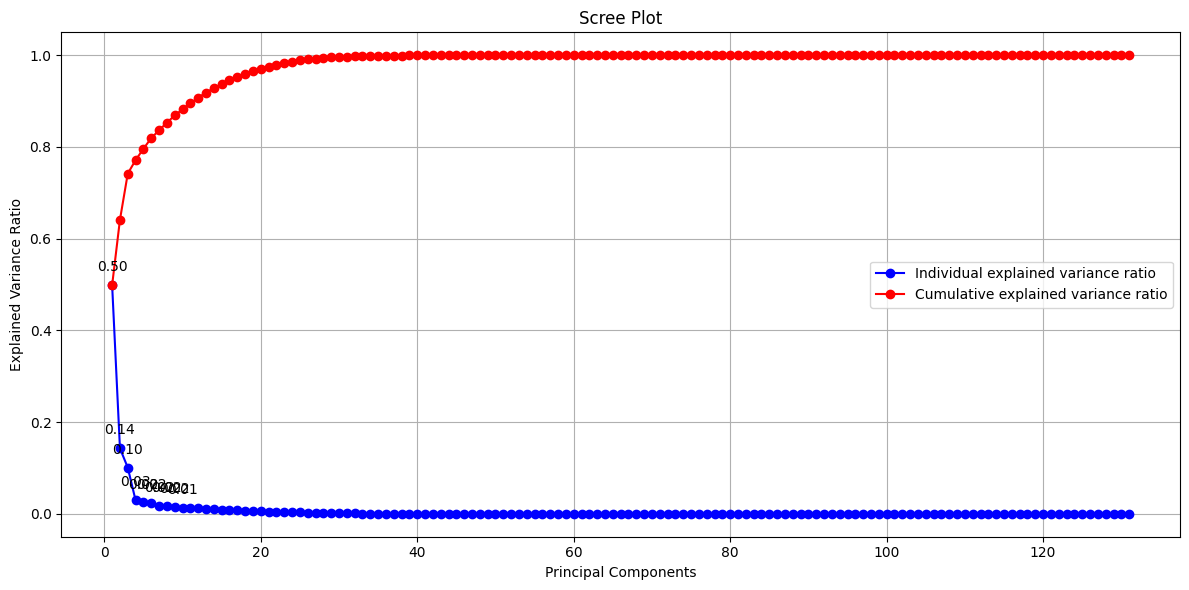

In [ ]:
# Create scree plot and get PCA object
pca = scree_plot(tr.drop('target', axis=1))

In [ ]:
EXPLAINED_VAR_RATIO = 0.97 # Tuning parameter

In [ ]:
# Remove highly correlated features
tr_cleaned = remove_highly_correlated(tr.drop('target', axis=1), EXPLAINED_VAR_RATIO)
tr_cleaned['target'] = tr['target']

Removing 79 highly correlated features: CURE END POSITION Z Collect Result_Dam, CURE END POSITION Θ Collect Result_Dam, CURE START POSITION X Collect Result_Dam, CURE START POSITION Θ Collect Result_Dam, DISCHARGED TIME OF RESIN(Stage3) Collect Result_Dam, Dispense Volume(Stage3) Collect Result_Dam, HEAD NORMAL COORDINATE Y AXIS(Stage2) Collect Result_Dam, HEAD NORMAL COORDINATE Y AXIS(Stage3) Collect Result_Dam, HEAD NORMAL COORDINATE Z AXIS(Stage3) Collect Result_Dam, HEAD Standby Position Z Collect Result_Dam, Head Clean Position X Collect Result_Dam, Head Clean Position Y Collect Result_Dam, Head Clean Position Z Collect Result_Dam, Head Purge Position X Collect Result_Dam, Head Purge Position Y Collect Result_Dam, Head Purge Position Z Collect Result_Dam, Head Zero Position X Collect Result_Dam, Head Zero Position Y Collect Result_Dam, Head Zero Position Z Collect Result_Dam, Machine Tact time Collect Result_Dam, Stage1 Circle3 Distance Speed Collect Result_Dam, Stage1 Circle4 Dis

In [ ]:
# prompt: # Sort the remaining column by their importance by PCA

# Fit PCA to the cleaned training data (excluding the target variable)
pca = PCA()
pca.fit(tr_cleaned.drop('target', axis=1))

# Get the feature importances (absolute values of components)
feature_importances = np.abs(pca.components_).sum(axis=0)

# Create a DataFrame to store feature names and importances
feature_importance_df = pd.DataFrame({
    'Feature': tr_cleaned.drop('target', axis=1).columns,
    'Importance': feature_importances
})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

# Print the sorted feature importances
print(feature_importance_df)


                                              Feature  Importance
32       Dispense Volume(Stage1) Collect Result_Fill1    3.746084
9   HEAD NORMAL COORDINATE Y AXIS(Stage1) Collect ...    3.721871
0              CURE END POSITION X Collect Result_Dam    3.703765
7   HEAD NORMAL COORDINATE X AXIS(Stage2) Collect ...    3.653013
8   HEAD NORMAL COORDINATE X AXIS(Stage3) Collect ...    3.609794
10  HEAD NORMAL COORDINATE Z AXIS(Stage1) Collect ...    3.391504
31  DISCHARGED TIME OF RESIN(Stage3) Collect Resul...    3.383054
33       Dispense Volume(Stage3) Collect Result_Fill1    3.352537
29  DISCHARGED TIME OF RESIN(Stage1) Collect Resul...    3.303702
5          Dispense Volume(Stage1) Collect Result_Dam    3.187699
2        DISCHARGED SPEED OF RESIN Collect Result_Dam    3.143288
30  DISCHARGED TIME OF RESIN(Stage2) Collect Resul...    3.058411
3   DISCHARGED TIME OF RESIN(Stage1) Collect Resul...    3.034679
44  HEAD NORMAL COORDINATE X AXIS(Stage2) Collect ...    3.022726
28     DIS

In [ ]:
# Create compressed datasets
tr_corr_compressed = tr_cleaned
tr_cleaned_exepted_target = tr_cleaned.drop('target', axis=1)
te_corr_compressed = te[tr_cleaned_exepted_target.columns]

print(tr_corr_compressed.shape); print(te_corr_compressed.shape)

(40506, 48)
(17361, 47)


In [ ]:
for col in te_corr_compressed.columns:
  if te_corr_compressed[col].isin(['OK']).any():
    te_corr_compressed[col] = te_corr_compressed[col].map({'OK': 0, 'NG': 1})

In [ ]:
te_corr_compressed['Chamber Temp. Judge Value_AutoClave'].value_counts()

,count
Chamber Temp. Judge Value_AutoClave,
0,12640
1,4721


In [ ]:
# Save compressed datasets
tr_corr_compressed.to_csv(os.path.join(ROOT_DIR,f'tr_pca{EXPLAINED_VAR_RATIO}var.csv'), index=False)
te_corr_compressed.to_csv(os.path.join(ROOT_DIR,f'te_pca{EXPLAINED_VAR_RATIO}var.csv'), index=False)

print(f"Number of features in compressed training set: {tr_corr_compressed.shape[1]}")
print(f"Number of features in compressed test set: {te_corr_compressed.shape[1]}")
print(f"Size of compressed training set: {len(tr_corr_compressed)}")
print(f"Size of compressed test set: {len(te_corr_compressed)}")

Number of features in compressed training set: 48
Number of features in compressed test set: 47
Size of compressed training set: 40506
Size of compressed test set: 17361


## 2.2.1 PCA - (Spherical + Other numeric) - and merge the categorical group 

In [7]:
train = pd.read_csv(os.path.join(ROOT_DIR, 'tr_drop_inv_num.csv')) # Without categorical data
# test = pd.read_csv(os.path.join(ROOT_DIR, 'test_data_combined.csv'))
categorical_data_encoded = pd.read_csv(os.path.join(ROOT_DIR, 'categorical_data_encoded.csv'))
tr_transformed_coordinates = pd.read_csv(os.path.join(ROOT_DIR, 'tr_transformed_coordinates.csv'))

In [8]:
# Drop the target column from the train data
tr_deducted = train.drop('target', axis=1)

In [9]:
Coordinate_columns = ['HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill2',
'HEAD NORMAL COORDINATE X AXIS(Stage1) Unit Time_Fill2',
'HEAD NORMAL COORDINATE X AXIS(Stage1) Judge Value_Fill2',
'HEAD NORMAL COORDINATE X AXIS(Stage2) Collect Result_Fill2',
'HEAD NORMAL COORDINATE X AXIS(Stage2) Unit Time_Fill2',
'HEAD NORMAL COORDINATE X AXIS(Stage2) Judge Value_Fill2',
'HEAD NORMAL COORDINATE X AXIS(Stage3) Collect Result_Fill2',
'HEAD NORMAL COORDINATE X AXIS(Stage3) Unit Time_Fill2',
'HEAD NORMAL COORDINATE X AXIS(Stage3) Judge Value_Fill2',
'HEAD NORMAL COORDINATE Y AXIS(Stage1) Collect Result_Fill2',
'HEAD NORMAL COORDINATE Y AXIS(Stage1) Unit Time_Fill2',
'HEAD NORMAL COORDINATE Y AXIS(Stage1) Judge Value_Fill2',
'HEAD NORMAL COORDINATE Y AXIS(Stage2) Collect Result_Fill2',
'HEAD NORMAL COORDINATE Y AXIS(Stage2) Unit Time_Fill2',
'HEAD NORMAL COORDINATE Y AXIS(Stage2) Judge Value_Fill2',
'HEAD NORMAL COORDINATE Y AXIS(Stage3) Collect Result_Fill2',
'HEAD NORMAL COORDINATE Y AXIS(Stage3) Unit Time_Fill2',
'HEAD NORMAL COORDINATE Y AXIS(Stage3) Judge Value_Fill2',
'HEAD NORMAL COORDINATE Z AXIS(Stage1) Collect Result_Fill2',
'HEAD NORMAL COORDINATE Z AXIS(Stage1) Unit Time_Fill2',
'HEAD NORMAL COORDINATE Z AXIS(Stage1) Judge Value_Fill2',
'HEAD NORMAL COORDINATE Z AXIS(Stage2) Collect Result_Fill2',
'HEAD NORMAL COORDINATE Z AXIS(Stage2) Unit Time_Fill2',
'HEAD NORMAL COORDINATE Z AXIS(Stage2) Judge Value_Fill2',
'HEAD NORMAL COORDINATE Z AXIS(Stage3) Collect Result_Fill2',
'HEAD NORMAL COORDINATE Z AXIS(Stage3) Unit Time_Fill2',
'HEAD NORMAL COORDINATE Z AXIS(Stage3) Judge Value_Fill2',
'HEAD Standby Position X Collect Result_Fill2',
'HEAD Standby Position X Unit Time_Fill2',
'HEAD Standby Position X Judge Value_Fill2',
'HEAD Standby Position Y Collect Result_Fill2',
'HEAD Standby Position Y Unit Time_Fill2',
'HEAD Standby Position Y Judge Value_Fill2',
'HEAD Standby Position Z Collect Result_Fill2',
'HEAD Standby Position Z Unit Time_Fill2',
'HEAD Standby Position Z Judge Value_Fill2',
'Head Clean Position X Collect Result_Fill2',
'Head Clean Position X Unit Time_Fill2',
'Head Clean Position X Judge Value_Fill2',
'Head Clean Position Y Collect Result_Fill2',
'Head Clean Position Y Unit Time_Fill2',
'Head Clean Position Y Judge Value_Fill2',
'Head Clean Position Z Collect Result_Fill2',
'Head Clean Position Z Unit Time_Fill2',
'Head Clean Position Z Judge Value_Fill2',
'Head Purge Position X Collect Result_Fill2',
'Head Purge Position X Unit Time_Fill2',
'Head Purge Position X Judge Value_Fill2',
'Head Purge Position Y Collect Result_Fill2',
'Head Purge Position Y Unit Time_Fill2',
'Head Purge Position Y Judge Value_Fill2',
'Head Purge Position Z Collect Result_Fill2',
'Head Purge Position Z Unit Time_Fill2',
'Head Purge Position Z Judge Value_Fill2',
'CURE END POSITION X Collect Result_Fill2',
'CURE END POSITION X Unit Time_Fill2',
'CURE END POSITION X Judge Value_Fill2',
'CURE END POSITION Z Collect Result_Fill2',
'CURE END POSITION Z Unit Time_Fill2',
'CURE END POSITION Z Judge Value_Fill2',
'CURE END POSITION Θ Collect Result_Fill2',
'CURE END POSITION Θ Unit Time_Fill2',
'CURE END POSITION Θ Judge Value_Fill2',
'CURE STANDBY POSITION X Collect Result_Fill2',
'CURE STANDBY POSITION X Unit Time_Fill2',
'CURE STANDBY POSITION X Judge Value_Fill2',
'CURE STANDBY POSITION Z Collect Result_Fill2',
'CURE STANDBY POSITION Z Unit Time_Fill2',
'CURE STANDBY POSITION Z Judge Value_Fill2',
'CURE STANDBY POSITION Θ Collect Result_Fill2',
'CURE STANDBY POSITION Θ Unit Time_Fill2',
'CURE STANDBY POSITION Θ Judge Value_Fill2',
'CURE START POSITION X Collect Result_Fill2',
'CURE START POSITION X Unit Time_Fill2',
'CURE START POSITION X Judge Value_Fill2',
'CURE START POSITION Z Collect Result_Fill2',
'CURE START POSITION Z Unit Time_Fill2',
'CURE START POSITION Z Judge Value_Fill2',
'CURE START POSITION Θ Collect Result_Fill2',
'CURE START POSITION Θ Unit Time_Fill2',
'CURE START POSITION Θ Judge Value_Fill2',
'CURE END POSITION X Collect Result_Dam',
'CURE END POSITION X Unit Time_Dam',
'CURE END POSITION X Judge Value_Dam',
'CURE END POSITION Z Collect Result_Dam',
'CURE END POSITION Z Unit Time_Dam',
'CURE END POSITION Z Judge Value_Dam',
'CURE END POSITION Θ Collect Result_Dam',
'CURE END POSITION Θ Unit Time_Dam',
'CURE END POSITION Θ Judge Value_Dam',
'CURE STANDBY POSITION X Collect Result_Dam',
'CURE STANDBY POSITION X Unit Time_Dam',
'CURE STANDBY POSITION X Judge Value_Dam',
'CURE STANDBY POSITION Z Collect Result_Dam',
'CURE STANDBY POSITION Z Unit Time_Dam',
'CURE STANDBY POSITION Z Judge Value_Dam',
'CURE STANDBY POSITION Θ Collect Result_Dam',
'CURE STANDBY POSITION Θ Unit Time_Dam',
'CURE STANDBY POSITION Θ Judge Value_Dam',
'CURE START POSITION X Collect Result_Dam',
'CURE START POSITION X Unit Time_Dam',
'CURE START POSITION X Judge Value_Dam',
'CURE START POSITION Z Collect Result_Dam',
'CURE START POSITION Z Unit Time_Dam',
'CURE START POSITION Z Judge Value_Dam',
'CURE START POSITION Θ Collect Result_Dam',
'CURE START POSITION Θ Unit Time_Dam',
'CURE START POSITION Θ Judge Value_Dam',
'HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Dam',
'HEAD NORMAL COORDINATE X AXIS(Stage1) Unit Time_Dam',
'HEAD NORMAL COORDINATE X AXIS(Stage1) Judge Value_Dam',
'HEAD NORMAL COORDINATE X AXIS(Stage2) Collect Result_Dam',
'HEAD NORMAL COORDINATE X AXIS(Stage2) Unit Time_Dam',
'HEAD NORMAL COORDINATE X AXIS(Stage2) Judge Value_Dam',
'HEAD NORMAL COORDINATE X AXIS(Stage3) Collect Result_Dam',
'HEAD NORMAL COORDINATE X AXIS(Stage3) Unit Time_Dam',
'HEAD NORMAL COORDINATE X AXIS(Stage3) Judge Value_Dam',
'HEAD NORMAL COORDINATE Y AXIS(Stage1) Collect Result_Dam',
'HEAD NORMAL COORDINATE Y AXIS(Stage1) Unit Time_Dam',
'HEAD NORMAL COORDINATE Y AXIS(Stage1) Judge Value_Dam',
'HEAD NORMAL COORDINATE Y AXIS(Stage2) Collect Result_Dam',
'HEAD NORMAL COORDINATE Y AXIS(Stage2) Unit Time_Dam',
'HEAD NORMAL COORDINATE Y AXIS(Stage2) Judge Value_Dam',
'HEAD NORMAL COORDINATE Y AXIS(Stage3) Collect Result_Dam',
'HEAD NORMAL COORDINATE Y AXIS(Stage3) Unit Time_Dam',
'HEAD NORMAL COORDINATE Y AXIS(Stage3) Judge Value_Dam',
'HEAD NORMAL COORDINATE Z AXIS(Stage1) Collect Result_Dam',
'HEAD NORMAL COORDINATE Z AXIS(Stage1) Unit Time_Dam',
'HEAD NORMAL COORDINATE Z AXIS(Stage1) Judge Value_Dam',
'HEAD NORMAL COORDINATE Z AXIS(Stage2) Collect Result_Dam',
'HEAD NORMAL COORDINATE Z AXIS(Stage2) Unit Time_Dam',
'HEAD NORMAL COORDINATE Z AXIS(Stage2) Judge Value_Dam',
'HEAD NORMAL COORDINATE Z AXIS(Stage3) Collect Result_Dam',
'HEAD NORMAL COORDINATE Z AXIS(Stage3) Unit Time_Dam',
'HEAD NORMAL COORDINATE Z AXIS(Stage3) Judge Value_Dam',
'HEAD Standby Position X Collect Result_Dam',
'HEAD Standby Position X Unit Time_Dam',
'HEAD Standby Position X Judge Value_Dam',
'HEAD Standby Position Y Collect Result_Dam',
'HEAD Standby Position Y Unit Time_Dam',
'HEAD Standby Position Y Judge Value_Dam',
'HEAD Standby Position Z Collect Result_Dam',
'HEAD Standby Position Z Unit Time_Dam',
'HEAD Standby Position Z Judge Value_Dam',
'Head Clean Position X Collect Result_Dam',
'Head Clean Position X Unit Time_Dam',
'Head Clean Position X Judge Value_Dam',
'Head Clean Position Y Collect Result_Dam',
'Head Clean Position Y Unit Time_Dam',
'Head Clean Position Y Judge Value_Dam',
'Head Clean Position Z Collect Result_Dam',
'Head Clean Position Z Unit Time_Dam',
'Head Clean Position Z Judge Value_Dam',
'Head Purge Position X Collect Result_Dam',
'Head Purge Position X Unit Time_Dam',
'Head Purge Position X Judge Value_Dam',
'Head Purge Position Y Collect Result_Dam',
'Head Purge Position Y Unit Time_Dam',
'Head Purge Position Y Judge Value_Dam',
'Head Purge Position Z Collect Result_Dam',
'Head Purge Position Z Unit Time_Dam',
'Head Purge Position Z Judge Value_Dam',
'Head Zero Position X Collect Result_Dam',
'Head Zero Position X Unit Time_Dam',
'Head Zero Position X Judge Value_Dam',
'Head Zero Position Y Collect Result_Dam',
'Head Zero Position Y Unit Time_Dam',
'Head Zero Position Y Judge Value_Dam',
'Head Zero Position Z Collect Result_Dam',
'Head Zero Position Z Unit Time_Dam',
'Head Zero Position Z Judge Value_Dam',
'HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill1',
'HEAD NORMAL COORDINATE X AXIS(Stage1) Unit Time_Fill1',
'HEAD NORMAL COORDINATE X AXIS(Stage1) Judge Value_Fill1',
'HEAD NORMAL COORDINATE X AXIS(Stage2) Collect Result_Fill1',
'HEAD NORMAL COORDINATE X AXIS(Stage2) Unit Time_Fill1',
'HEAD NORMAL COORDINATE X AXIS(Stage2) Judge Value_Fill1',
'HEAD NORMAL COORDINATE X AXIS(Stage3) Collect Result_Fill1',
'HEAD NORMAL COORDINATE X AXIS(Stage3) Unit Time_Fill1',
'HEAD NORMAL COORDINATE X AXIS(Stage3) Judge Value_Fill1',
'HEAD NORMAL COORDINATE Y AXIS(Stage1) Collect Result_Fill1',
'HEAD NORMAL COORDINATE Y AXIS(Stage1) Unit Time_Fill1',
'HEAD NORMAL COORDINATE Y AXIS(Stage1) Judge Value_Fill1',
'HEAD NORMAL COORDINATE Y AXIS(Stage2) Collect Result_Fill1',
'HEAD NORMAL COORDINATE Y AXIS(Stage2) Unit Time_Fill1',
'HEAD NORMAL COORDINATE Y AXIS(Stage2) Judge Value_Fill1',
'HEAD NORMAL COORDINATE Y AXIS(Stage3) Collect Result_Fill1',
'HEAD NORMAL COORDINATE Y AXIS(Stage3) Unit Time_Fill1',
'HEAD NORMAL COORDINATE Y AXIS(Stage3) Judge Value_Fill1',
'HEAD NORMAL COORDINATE Z AXIS(Stage1) Collect Result_Fill1',
'HEAD NORMAL COORDINATE Z AXIS(Stage1) Unit Time_Fill1',
'HEAD NORMAL COORDINATE Z AXIS(Stage1) Judge Value_Fill1',
'HEAD NORMAL COORDINATE Z AXIS(Stage2) Collect Result_Fill1',
'HEAD NORMAL COORDINATE Z AXIS(Stage2) Unit Time_Fill1',
'HEAD NORMAL COORDINATE Z AXIS(Stage2) Judge Value_Fill1',
'HEAD NORMAL COORDINATE Z AXIS(Stage3) Collect Result_Fill1',
'HEAD NORMAL COORDINATE Z AXIS(Stage3) Unit Time_Fill1',
'HEAD NORMAL COORDINATE Z AXIS(Stage3) Judge Value_Fill1',
'HEAD Standby Position X Collect Result_Fill1',
'HEAD Standby Position X Unit Time_Fill1',
'HEAD Standby Position X Judge Value_Fill1',
'HEAD Standby Position Y Collect Result_Fill1',
'HEAD Standby Position Y Unit Time_Fill1',
'HEAD Standby Position Y Judge Value_Fill1',
'HEAD Standby Position Z Collect Result_Fill1',
'HEAD Standby Position Z Unit Time_Fill1',
'HEAD Standby Position Z Judge Value_Fill1',
'Head Clean Position X Collect Result_Fill1',
'Head Clean Position X Unit Time_Fill1',
'Head Clean Position X Judge Value_Fill1',
'Head Clean Position Y Collect Result_Fill1',
'Head Clean Position Y Unit Time_Fill1',
'Head Clean Position Y Judge Value_Fill1',
'Head Clean Position Z Collect Result_Fill1',
'Head Clean Position Z Unit Time_Fill1',
'Head Clean Position Z Judge Value_Fill1',
'Head Purge Position X Collect Result_Fill1',
'Head Purge Position X Unit Time_Fill1',
'Head Purge Position X Judge Value_Fill1',
'Head Purge Position Y Collect Result_Fill1',
'Head Purge Position Y Unit Time_Fill1',
'Head Purge Position Y Judge Value_Fill1',
'Head Purge Position Z Collect Result_Fill1',
'Head Purge Position Z Unit Time_Fill1',
'Head Purge Position Z Judge Value_Fill1']


In [10]:
# Drop the duplicated columns from tr_deducted
duplicated_columns = tr_deducted.columns.intersection(Coordinate_columns)
print("Duplicated columns between tr_deducted and categorical_data_encoded:")
print(duplicated_columns)

Duplicated columns between tr_deducted and categorical_data_encoded:
Index(['CURE END POSITION X Collect Result_Dam',
       'CURE END POSITION Z Collect Result_Dam',
       'CURE END POSITION Θ Collect Result_Dam',
       'CURE START POSITION X Collect Result_Dam',
       'CURE START POSITION Θ Collect Result_Dam',
       'HEAD NORMAL COORDINATE X AXIS(Stage2) Collect Result_Dam',
       'HEAD NORMAL COORDINATE X AXIS(Stage3) Collect Result_Dam',
       'HEAD NORMAL COORDINATE Y AXIS(Stage1) Collect Result_Dam',
       'HEAD NORMAL COORDINATE Y AXIS(Stage2) Collect Result_Dam',
       'HEAD NORMAL COORDINATE Y AXIS(Stage3) Collect Result_Dam',
       'HEAD NORMAL COORDINATE Z AXIS(Stage1) Collect Result_Dam',
       'HEAD NORMAL COORDINATE Z AXIS(Stage2) Collect Result_Dam',
       'HEAD NORMAL COORDINATE Z AXIS(Stage3) Collect Result_Dam',
       'HEAD Standby Position X Collect Result_Dam',
       'HEAD Standby Position Y Collect Result_Dam',
       'HEAD Standby Position Z Collect 

In [11]:
tr_deducted = tr_deducted.drop(columns=duplicated_columns)
tr_deducted.head()

,CURE SPEED Collect Result_Dam,DISCHARGED SPEED OF RESIN Collect Result_Dam,DISCHARGED TIME OF RESIN(Stage1) Collect Result_Dam,DISCHARGED TIME OF RESIN(Stage2) Collect Result_Dam,DISCHARGED TIME OF RESIN(Stage3) Collect Result_Dam,Dispense Volume(Stage1) Collect Result_Dam,Dispense Volume(Stage2) Collect Result_Dam,Dispense Volume(Stage3) Collect Result_Dam,Machine Tact time Collect Result_Dam,PalletID Collect Result_Dam,...,PalletID Collect Result_Fill1,Production Qty Collect Result_Fill1,Receip No Collect Result_Fill1,WorkMode Collect Result_Fill1,CURE SPEED Collect Result_Fill2,Machine Tact time Collect Result_Fill2,PalletID Collect Result_Fill2,Production Qty Collect Result_Fill2,Receip No Collect Result_Fill2,WorkMode Collect Result_Fill2
0,100,16,14.9,8.4,14.7,1.04,0.58,1.02,265.00,58.5,...,55.7,7,127,1,48,114.612,19.9,7,127,1
1,70,10,21.3,4.9,21.3,1.49,0.34,1.49,65.10,7.0,...,7.0,185,1,7,50,19.600,7.0,185,1,0
2,85,16,14.7,8.5,14.7,1.61,0.93,1.61,265.02,76.9,...,58.7,10,73,1,50,114.612,19.8,10,73,1
3,70,10,21.3,8.4,21.3,1.49,0.58,1.49,70.50,12.0,...,12.0,268,1,7,50,19.900,12.0,268,1,0
4,70,10,9.7,4.9,9.6,0.67,0.34,0.67,88.30,8.0,...,8.0,121,1,7,50,19.700,8.0,121,1,0


In [12]:
duplicated_columns = tr_deducted.columns.intersection(tr_transformed_coordinates.columns)
print("Duplicated columns between tr_deducted and tr_transformed_coordinates:")
print(duplicated_columns)

Duplicated columns between tr_deducted and tr_transformed_coordinates:
Index([], dtype='object')


In [13]:
categorical_columns = ['Equipment_Dam', 'Model.Suffix_Dam', 'Workorder_Dam',
       'Model.Suffix_AutoClave', 'Workorder_AutoClave', 'Equipment_Fill1',
       'Model.Suffix_Fill1', 'Workorder_Fill1', 'Equipment_Fill2',
       'Model.Suffix_Fill2', 'Workorder_Fill2']

duplicated_columns = tr_deducted.columns.intersection(categorical_columns)
print("Duplicated columns between tr_deducted and categorical columns:")
print(duplicated_columns)

Duplicated columns between tr_deducted and categorical columns:
Index([], dtype='object')


In [14]:
# Check the duplicated column names between tr_deducted and categorical_data_encoded
duplicated_columns = tr_deducted.columns.intersection(categorical_data_encoded.columns)
print("Duplicated columns between tr_deducted and categorical_data_encoded:")
print(duplicated_columns)

Duplicated columns between tr_deducted and categorical_data_encoded:
Index(['PalletID Collect Result_Dam', 'PalletID Collect Result_Fill1',
       'PalletID Collect Result_Fill2'],
      dtype='object')


In [15]:
# Drop the duplicated columns from tr_deducted
tr_deducted = tr_deducted.drop(columns=duplicated_columns)

In [16]:
tr_deducted.head()

,CURE SPEED Collect Result_Dam,DISCHARGED SPEED OF RESIN Collect Result_Dam,DISCHARGED TIME OF RESIN(Stage1) Collect Result_Dam,DISCHARGED TIME OF RESIN(Stage2) Collect Result_Dam,DISCHARGED TIME OF RESIN(Stage3) Collect Result_Dam,Dispense Volume(Stage1) Collect Result_Dam,Dispense Volume(Stage2) Collect Result_Dam,Dispense Volume(Stage3) Collect Result_Dam,Machine Tact time Collect Result_Dam,Production Qty Collect Result_Dam,...,Dispense Volume(Stage3) Collect Result_Fill1,Machine Tact time Collect Result_Fill1,Production Qty Collect Result_Fill1,Receip No Collect Result_Fill1,WorkMode Collect Result_Fill1,CURE SPEED Collect Result_Fill2,Machine Tact time Collect Result_Fill2,Production Qty Collect Result_Fill2,Receip No Collect Result_Fill2,WorkMode Collect Result_Fill2
0,100,16,14.9,8.4,14.7,1.04,0.58,1.02,265.00,7,...,11.97,128.0,7,127,1,48,114.612,7,127,1
1,70,10,21.3,4.9,21.3,1.49,0.34,1.49,65.10,185,...,12.82,56.5,185,1,7,50,19.600,185,1,0
2,85,16,14.7,8.5,14.7,1.61,0.93,1.61,265.02,10,...,12.73,128.0,10,73,1,50,114.612,10,73,1
3,70,10,21.3,8.4,21.3,1.49,0.58,1.49,70.50,268,...,12.82,57.7,268,1,7,50,19.900,268,1,0
4,70,10,9.7,4.9,9.6,0.67,0.34,0.67,88.30,121,...,12.82,89.9,121,1,7,50,19.700,121,1,0


In [17]:
from sklearn.preprocessing import StandardScaler

# Normalize the 3 data - tr_deducted, categorical_data_encoded, tr_transformed_coordinates
scaler = StandardScaler()
tr_deducted_scaled = scaler.fit_transform(tr_deducted)
categorical_data_encoded_scaled = scaler.fit_transform(categorical_data_encoded)
tr_transformed_coordinates_scaled = scaler.fit_transform(tr_transformed_coordinates)

# Create a DataFrame for each of the scaled data
tr_deducted_scaled_df = pd.DataFrame(tr_deducted_scaled, columns=tr_deducted.columns)
categorical_data_encoded_scaled_df = pd.DataFrame(categorical_data_encoded_scaled, columns=categorical_data_encoded.columns)
tr_transformed_coordinates_scaled_df = pd.DataFrame(tr_transformed_coordinates_scaled, columns=tr_transformed_coordinates.columns)

#### PCA part

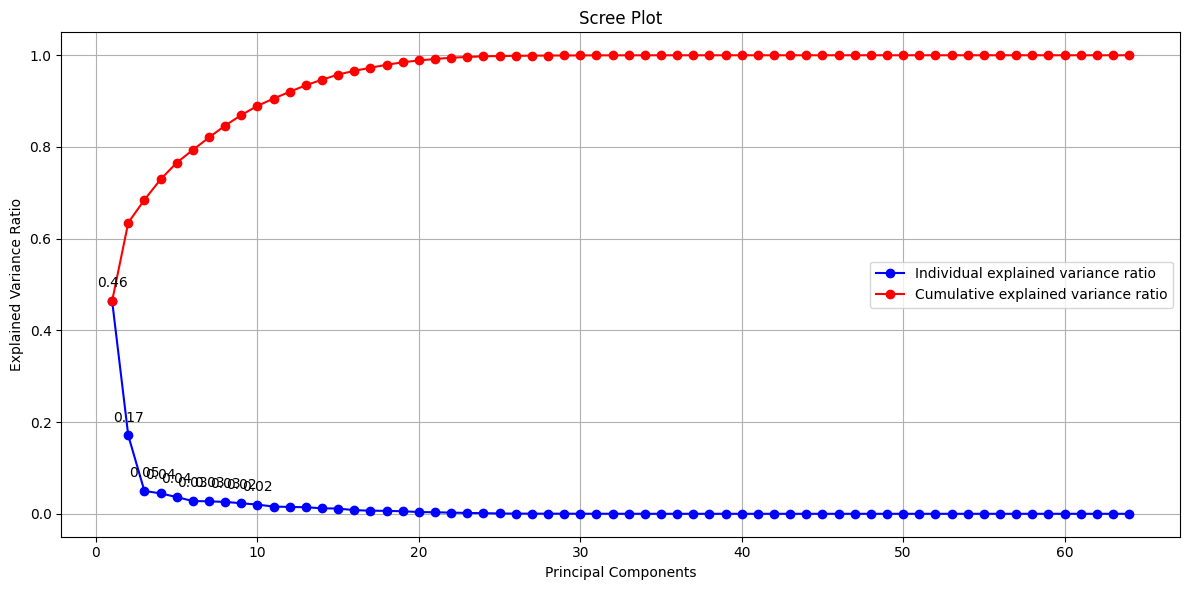

In [15]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Draw scree-plot for tr_deducted_scaled_df
pca = PCA()
pca.fit(tr_deducted_scaled_df)

cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, 'bo-')
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, 'ro-')
plt.title('Scree Plot')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)

for i in range(min(10, len(pca.explained_variance_ratio_))):
    plt.annotate(f'{pca.explained_variance_ratio_[i]:.2f}',
                 (i+1, pca.explained_variance_ratio_[i]),
                 textcoords="offset points",
                 xytext=(0,10),
                 ha='center')
    
plt.legend(['Individual explained variance ratio', 'Cumulative explained variance ratio'])
plt.tight_layout()
plt.show()

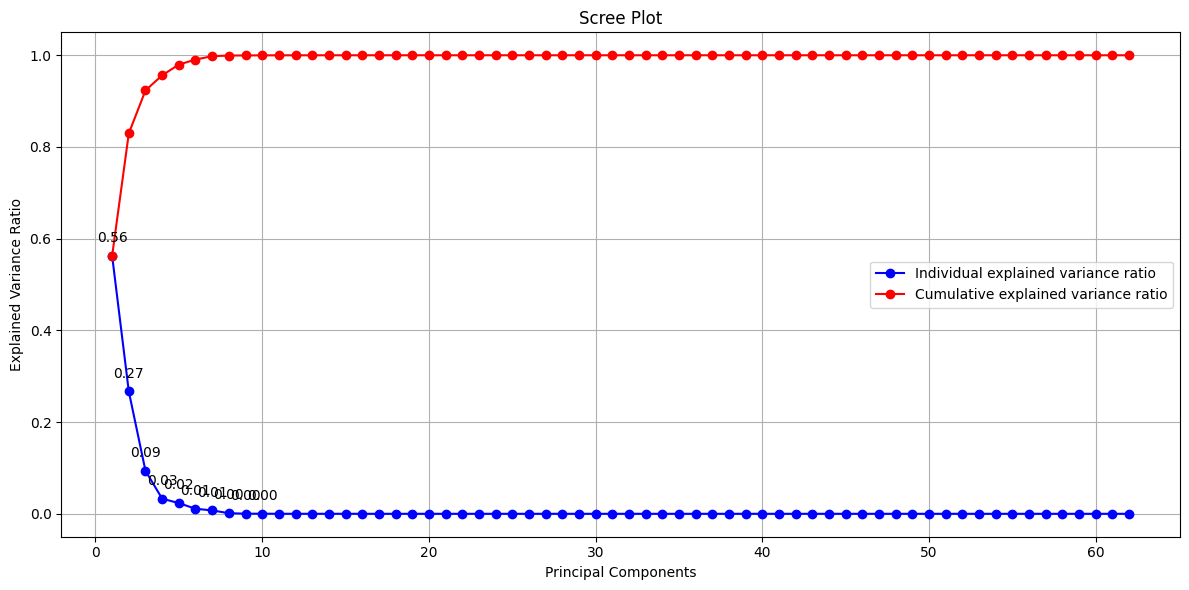

In [17]:
# Draw scree-plot for tr_transformed_coordinates_scaled_df
pca = PCA()
pca.fit(tr_transformed_coordinates_scaled_df)

cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, 'bo-')
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, 'ro-')
plt.title('Scree Plot')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)

for i in range(min(10, len(pca.explained_variance_ratio_))):
    plt.annotate(f'{pca.explained_variance_ratio_[i]:.2f}',
                 (i+1, pca.explained_variance_ratio_[i]),
                 textcoords="offset points",
                 xytext=(0,10),
                 ha='center')
    
plt.legend(['Individual explained variance ratio', 'Cumulative explained variance ratio'])
plt.tight_layout()
plt.show()

In [18]:
# Decide on the number of components based on the scree plot
n_components = 19  # Example: choose based on the plots

# Re-fit PCA with the chosen number of components
pca = PCA(n_components=n_components)
train_pca = pca.fit_transform(tr_deducted_scaled_df)

# Create DataFrame for the transformed train data
train_deducted_pca_df = pd.DataFrame(train_pca, columns=[f'PC{i+1}' for i in range(n_components)])

# Normalize the test features using the same scaler
# test_features = pd.concat([spherical_coords_test, partial_coords_test], axis=1)
# test_features_normalized = scaler.transform(test_features)

# Transform the test data using the same PCA model fitted on training data
# test_pca = pca.transform(test_features_normalized)

# Create DataFrame for the transformed test data
# test_pca_df = pd.DataFrame(test_pca, columns=[f'PC{i+1}' for i in range(n_components)])

# Output the transformed data
print("PCA-transformed Training Data:")
print(train_deducted_pca_df.head())

# print("\nPCA-transformed Test Data:")
# print(test_pca_df.head())

PCA-transformed Training Data:
        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -3.891998  2.447112  1.139259 -0.831001  0.728743 -0.529436 -0.651090   
1 -0.894747 -7.912827  1.258137 -0.065894  0.057039  1.798276 -0.319993   
2 -4.351461  1.145805 -1.380191  0.771932  0.187663 -0.755023 -1.106070   
3 -3.561014 -7.279059  0.654148 -0.324098  0.725200 -1.262726 -1.647526   
4  7.612667  0.599745 -1.646162 -0.847334  0.600083 -1.467418  1.682767   

        PC8       PC9      PC10      PC11      PC12      PC13      PC14  \
0 -1.555858  1.667934  1.479667  0.178460 -1.033333 -0.185283  1.087786   
1 -0.717733  0.528323  0.909624 -0.051447 -0.291521  0.965834 -0.046423   
2 -1.814241  0.423044  1.185618  1.231808 -0.812331  0.675655 -0.106808   
3  0.820905  1.341720 -1.274717  0.581771  0.858120 -1.078753 -0.273641   
4  1.405032 -0.160710 -0.621083 -0.772511  1.225513 -0.139630 -0.002363   

       PC15      PC16      PC17      PC18      PC19  
0  0.277932  

In [22]:
train_deducted_pca_df.to_csv(os.path.join(ROOT_DIR, 'train_deducted_pca_df.csv'), index=False)

In [4]:
train_deducted_pca_df = pd.read_csv(os.path.join(ROOT_DIR, 'train_deducted_pca_df.csv'))

In [20]:
# Decide on the number of components based on the scree plot
n_components = 5  # Example: choose based on the plots

# Re-fit PCA with the chosen number of components
pca = PCA(n_components=n_components)
train_pca = pca.fit_transform(tr_transformed_coordinates_scaled_df)

# Create DataFrame for the transformed train data
train_transformed_coordinates_pca_df = pd.DataFrame(train_pca, columns=[f'PC{i+1}' for i in range(n_components)])

# Normalize the test features using the same scaler
# test_features = pd.concat([spherical_coords_test, partial_coords_test], axis=1)
# test_features_normalized = scaler.transform(test_features)

# Transform the test data using the same PCA model fitted on training data
# test_pca = pca.transform(test_features_normalized)

# Create DataFrame for the transformed test data
# test_pca_df = pd.DataFrame(test_pca, columns=[f'PC{i+1}' for i in range(n_components)])

# Output the transformed data
print("PCA-transformed Training Data:")
print(train_transformed_coordinates_pca_df.head())

# print("\nPCA-transformed Test Data:")
# print(test_pca_df.head())

PCA-transformed Training Data:
        PC1       PC2       PC3       PC4       PC5
0 -3.023347 -5.174471 -0.246752 -0.593305  0.917259
1  7.919741  0.018265 -0.035018 -1.114498  0.228126
2 -6.576635  3.169059 -0.161164  0.380409 -0.434126
3  3.066054  7.921283 -0.059021 -1.560079  2.255790
4  7.664744 -0.392418  0.207350 -0.076481 -1.667725


In [23]:
train_transformed_coordinates_pca_df.to_csv(os.path.join(ROOT_DIR, 'train_transformed_coordinates_pca_df.csv'), index=False)

In [3]:
train_transformed_coordinates_pca_df = pd.read_csv(os.path.join(ROOT_DIR, 'train_transformed_coordinates_pca_df.csv'))

In [6]:
# Change the column names of the train_transformed_coordinates_pca_df by adding 'Coor' to the column names
train_transformed_coordinates_pca_df.columns = [f'Coor{i+1}' for i in range(5)]
train_transformed_coordinates_pca_df.head()

,Coor1,Coor2,Coor3,Coor4,Coor5
0,-3.023347,-5.174471,-0.246752,-0.593305,0.917259
1,7.919741,0.018265,-0.035018,-1.114498,0.228126
2,-6.576635,3.169059,-0.161164,0.380409,-0.434126
3,3.066054,7.921283,-0.059021,-1.560079,2.255790
4,7.664744,-0.392418,0.207350,-0.076481,-1.667725


In [19]:
# merge the train_deducted_pca_df, train_transformed_coordinates_pca_df, and categorical_data_encoded_scaled_df
train_pca_combined = pd.concat([train_deducted_pca_df, train_transformed_coordinates_pca_df, categorical_data_encoded_scaled_df], axis=1)

In [20]:
train_pca_combined = pd.concat([train_deducted_pca_df, train_data['target']], axis=1)

In [21]:
train_pca_combined['target'] = train_pca_combined['target'].map({'Normal': 1, 'AbNormal': -1})
print(train_pca_combined['target'].value_counts())

target
 1    38156
-1     2350
Name: count, dtype: int64


In [22]:
# Check non-numeric columns in the combined dataframe
non_numeric_columns = train_pca_combined.select_dtypes(exclude=['number']).columns
train_pca_combined[non_numeric_columns].head()

""
0
1
2
3
4


In [23]:
train_pca_combined.to_csv(os.path.join(ROOT_DIR, 'train_pca_combined.csv'), index=False)

## 2.2.2 Hellinger distance(Feature selection)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

def hellinger_distance(p, q):
    return np.sqrt(np.sum((np.sqrt(p) - np.sqrt(q)) ** 2)) / np.sqrt(2)

def calculate_hellinger_distances(X, y, n_bins=20):
    n_features = X.shape[1]
    classes = np.unique(y)
    hellinger_distances = []

    for feature in range(n_features):
        feature_data = X[:, feature]

        # Calculate the range for histogram bins
        feature_min, feature_max = np.min(feature_data), np.max(feature_data)
        bin_edges = np.linspace(feature_min, feature_max, n_bins + 1)

        # Calculate histograms for each class using the same bin edges
        hist_data = [np.histogram(feature_data[y == c], bins=bin_edges, density=True)[0] for c in classes]

        # Calculate pairwise Hellinger distances between class distributions
        distances = []
        for i in range(len(classes)):
            for j in range(i + 1, len(classes)):
                dist = hellinger_distance(hist_data[i], hist_data[j])
                distances.append(dist)

        # Use the average Hellinger distance for this feature
        hellinger_distances.append(np.mean(distances))

    return np.array(hellinger_distances)

def select_features_hellinger(X, y, n_features, n_bins=20):
    hellinger_distances = calculate_hellinger_distances(X, y, n_bins)
    selected_features = np.argsort(hellinger_distances)[::-1][:n_features]
    return selected_features

# Main pipeline
def hellinger_feature_selection_pipeline(X, y, n_features_to_select, test_size=0.2, random_state=42, n_bins=20):
    # Ensure X and y have the same number of samples
    if X.shape[0] != y.shape[0]:
        raise ValueError(f"X has {X.shape[0]} samples, but y has {y.shape[0]} samples. They must be equal.")

    # Convert X to DataFrame if it's not already
    if not isinstance(X, pd.DataFrame):
        X = pd.DataFrame(X)

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Normalize features to [0, 1] range
    scaler = MinMaxScaler()
    X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
    X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index=X_test.index)

    # Select top features using Hellinger distance
    selected_features = select_features_hellinger(X_train_scaled.values, y_train, n_features_to_select, n_bins)
    selected_columns = X_train.columns[selected_features]

    # Use selected features
    X_train_selected = X_train_scaled[selected_columns]
    X_test_selected = X_test_scaled[selected_columns]

    print(f"Top {n_features_to_select} features selected based on Hellinger distance:")
    print(selected_columns.tolist())

    print(f"\nShape of original dataset: {X.shape}")
    print(f"Shape of training dataset with selected features: {X_train_selected.shape}")
    print(f"Shape of test dataset with selected features: {X_test_selected.shape}")

    return selected_columns, X_train_selected, X_test_selected, y_train, y_test

In [ ]:
X = pd.read_csv(os.path.join(ROOT_DIR, "tr_drop_inv_num.csv"))
y = X.pop('target') # Remove target column from X and assign it to y

In [ ]:
print(X.shape, y.shape);

(40506, 131) (40506,)


In [ ]:
N_FEATURES_TO_SELECT = 60; N_BINS = 20  # You can adjust this value if needed. Default of N_BINS is 20

In [ ]:
hellinger_columns, _, _, _, _ = hellinger_feature_selection_pipeline(X, y, N_FEATURES_TO_SELECT, n_bins=N_BINS, random_state=RANDOM_STATE)
hellinger_columns

Top 60 features selected based on Hellinger distance:
['WorkMode Collect Result_Fill1', 'WorkMode Collect Result_Fill2', 'Head Zero Position Z Collect Result_Dam', 'Chamber Temp. Unit Time_AutoClave', 'Stage3 Circle1 Distance Speed Collect Result_Dam', 'DISCHARGED TIME OF RESIN(Stage1) Collect Result_Dam', 'Machine Tact time Collect Result_Fill1', 'Dispense Volume(Stage3) Collect Result_Dam', 'Stage1 Line4 Distance Speed Collect Result_Dam', 'HEAD NORMAL COORDINATE Z AXIS(Stage3) Collect Result_Dam', 'HEAD NORMAL COORDINATE Z AXIS(Stage2) Collect Result_Dam', 'Dispense Volume(Stage1) Collect Result_Dam', '3rd Pressure Unit Time_AutoClave', 'Dispense Volume(Stage2) Collect Result_Dam', 'DISCHARGED TIME OF RESIN(Stage3) Collect Result_Dam', 'Stage3 Line1 Distance Speed Collect Result_Dam', 'Stage3 Line3 Distance Speed Collect Result_Dam', 'Stage1 Line3 Distance Speed Collect Result_Dam', 'Stage1 Line1 Distance Speed Collect Result_Dam', 'Stage1 Circle1 Distance Speed Collect Result_Dam',

Index(['WorkMode Collect Result_Fill1', 'WorkMode Collect Result_Fill2',
       'Head Zero Position Z Collect Result_Dam',
       'Chamber Temp. Unit Time_AutoClave',
       'Stage3 Circle1 Distance Speed Collect Result_Dam',
       'DISCHARGED TIME OF RESIN(Stage1) Collect Result_Dam',
       'Machine Tact time Collect Result_Fill1',
       'Dispense Volume(Stage3) Collect Result_Dam',
       'Stage1 Line4 Distance Speed Collect Result_Dam',
       'HEAD NORMAL COORDINATE Z AXIS(Stage3) Collect Result_Dam',
       'HEAD NORMAL COORDINATE Z AXIS(Stage2) Collect Result_Dam',
       'Dispense Volume(Stage1) Collect Result_Dam',
       '3rd Pressure Unit Time_AutoClave',
       'Dispense Volume(Stage2) Collect Result_Dam',
       'DISCHARGED TIME OF RESIN(Stage3) Collect Result_Dam',
       'Stage3 Line1 Distance Speed Collect Result_Dam',
       'Stage3 Line3 Distance Speed Collect Result_Dam',
       'Stage1 Line3 Distance Speed Collect Result_Dam',
       'Stage1 Line1 Distance Speed C

In [ ]:
# Modify the test dataset to include only the selected features
te = pd.read_csv(os.path.join(ROOT_DIR, "te_drop_inv_num.csv"))
te_hell = te[hellinger_columns]

tr = pd.read_csv(os.path.join(ROOT_DIR, "tr_drop_inv_num.csv"))
tr_hell = tr[hellinger_columns]

# Add target column from original training data to the selected features if there is not already
if 'target' not in tr_hell.columns:
    tr_hell['target'] = tr['target']

C:\Users\user\AppData\Local\Temp\ipykernel_12380\1909976191.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tr_hell['target'] = tr['target']


In [ ]:
tr_hell['target'].head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [ ]:
# Save the train and test datasets with selected features
tr_hell.to_csv(os.path.join(ROOT_DIR, f"tr_hell{N_FEATURES_TO_SELECT}cols{N_BINS}bins.csv"), index=False)
te_hell.to_csv(os.path.join(ROOT_DIR, f"te_hell{N_FEATURES_TO_SELECT}cols{N_BINS}bins.csv"), index=False)

## 2.3 Hybrid Sampling

In [ ]:
# pip install imblearn

In [ ]:
# !pip uninstall ctgan -y
# !pip install ctgan

In [ ]:
# pip install imbalanced-learn

In [1]:
from imblearn.under_sampling import RandomUnderSampler, TomekLinks, CondensedNearestNeighbour, OneSidedSelection
from imblearn.over_sampling import SMOTE, BorderlineSMOTE, ADASYN
from sklearn.utils import resample
from ctgan import CTGAN
import ipywidgets
import imblearn
import os

OSError: [WinError 126] 지정된 모듈을 찾을 수 없습니다. Error loading "c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\lib\fbgemm.dll" or one of its dependencies.

In [ ]:
UNDERSAMPLING_METHOD = 'RUS'  # RUS, TL, OSS
# WARNING: Don't use CNN (extremely slow)
OVERSAMPLING_METHOD = 'CTGAN'  # CTGAN, SMOTE, BorderlineSMOTE, ADASYN
RANDOM_STATE = 110

In [ ]:
def hybrid_sampling(train_data, undersampling_rate, undersampling_method='TL', oversampling_method='SMOTE'):
    # Separate features and target
    X = train_data.drop('target', axis=1)
    y = train_data['target']

    # Undersampling
    if undersampling_method.upper() == 'RUS':
        n_normal = len(train_data[train_data['target'] == 1])
        n_keep = max(int(n_normal * undersampling_rate), len(train_data[train_data['target'] == -1]))
        rus = RandomUnderSampler(sampling_strategy={1: n_keep}, random_state=RANDOM_STATE)
        X_under, y_under = rus.fit_resample(X, y)
    elif undersampling_method.upper() == 'TL':
        tl = TomekLinks(sampling_strategy='majority')
        X_under, y_under = tl.fit_resample(X, y)
    elif undersampling_method.upper() == 'CNN':
        # Use CNN with a limit on the number of iterations
        cnn = CondensedNearestNeighbour(sampling_strategy='majority', random_state=RANDOM_STATE, n_neighbors=1, n_seeds_S=1)
        X_under, y_under = cnn.fit_resample(X, y)
    elif undersampling_method.upper() == 'OSS':
        oss = OneSidedSelection(sampling_strategy='majority', random_state=RANDOM_STATE)
        X_under, y_under = oss.fit_resample(X, y)
    else:
        raise ValueError("Invalid undersampling method. Choose 'RUS', 'TL', 'CNN', or 'OSS'.")

    # Combine undersampled data
    undersampled_data = pd.concat([X_under, pd.Series(y_under, name='target')], axis=1)

    # Separate normal and abnormal samples after undersampling
    normal_samples = undersampled_data[undersampled_data['target'] == 1]
    abnormal_samples = undersampled_data[undersampled_data['target'] == -1]

    # If TL, CNN, or OSS was used, we might need additional random undersampling
    if undersampling_method.upper() in ['TL', 'CNN', 'OSS']:
        n_normal_desired = max(int(len(normal_samples) * undersampling_rate), len(abnormal_samples))
        if len(normal_samples) > n_normal_desired:
            normal_samples = resample(normal_samples, n_samples=n_normal_desired, random_state=RANDOM_STATE)

    # Determine the number of synthetic samples to generate
    n_synthetic = max(0, len(normal_samples) - len(abnormal_samples))

    if n_synthetic > 0:
        if oversampling_method.upper() == 'SMOTE':
            smote = SMOTE(sampling_strategy={-1: len(normal_samples)}, random_state=RANDOM_STATE)
            X_resampled, y_resampled = smote.fit_resample(
                pd.concat([normal_samples, abnormal_samples]).drop('target', axis=1),
                pd.concat([normal_samples, abnormal_samples])['target']
            )
            final_data = pd.concat([X_resampled, pd.Series(y_resampled, name='target')], axis=1)
        elif oversampling_method.upper() == 'CTGAN':
            ctgan = CTGAN()  # CTGAN doesn't accept random_state
            ctgan.fit(abnormal_samples, epochs=100)
            synthetic_samples = ctgan.sample(n_synthetic)
            final_data = pd.concat([normal_samples, abnormal_samples, synthetic_samples], axis=0)
        elif oversampling_method.upper() == 'BORDERLINESMOTE':
            bsmote = BorderlineSMOTE(sampling_strategy={-1: len(normal_samples)}, random_state=RANDOM_STATE)
            X_resampled, y_resampled = bsmote.fit_resample(
                pd.concat([normal_samples, abnormal_samples]).drop('target', axis=1),
                pd.concat([normal_samples, abnormal_samples])['target']
            )
            final_data = pd.concat([X_resampled, pd.Series(y_resampled, name='target')], axis=1)
        elif oversampling_method.upper() == 'ADASYN':
            adasyn = ADASYN(sampling_strategy={-1: len(normal_samples)}, random_state=RANDOM_STATE)
            X_resampled, y_resampled = adasyn.fit_resample(
                pd.concat([normal_samples, abnormal_samples]).drop('target', axis=1),
                pd.concat([normal_samples, abnormal_samples])['target']
            )
            final_data = pd.concat([X_resampled, pd.Series(y_resampled, name='target')], axis=1)
        else:
            raise ValueError("Invalid oversampling method. Choose 'SMOTE', 'CTGAN', 'BorderlineSMOTE', or 'ADASYN'.")
    else:
        final_data = pd.concat([normal_samples, abnormal_samples], axis=0)

    print(f"Final data shape: {final_data.shape}")
    print(f"Normal samples: {len(final_data[final_data['target'] == 1])}")
    print(f"Abnormal samples: {len(final_data[final_data['target'] == -1])}")

    return final_data

def save_to_csv(data, filename):
    """
    Save the given DataFrame to a CSV file.
    :param data: pandas DataFrame to save
    :param filename: name of the file to save (without extension)
    """
    if not os.path.exists('sampled_datasets'):
        os.makedirs('sampled_datasets')
    filepath = os.path.join('sampled_datasets', f"{filename}.csv")
    data.to_csv(filepath, index=False)
    print(f"Saved sampled dataset to {filepath}")

In [ ]:
undersampling_rates = [0.10]; results = {}

In [ ]:
DATA_TYPE = 'hell'
N_FEATURES_TO_SELECT = 50; N_BINS = 20 # For hellinger distance
EXPLAINED_VAR_RATIO = 0.95 # Write the value used in the PCA part
# e.g. pca, hell(hellinger), rowwisedrop_pca, rowwisedrop_doublepca80var

# For pca data
# train_data = pd.read_csv(os.path.join(ROOT_DIR, f"tr_strtuned_{DATA_TYPE}{EXPLAINED_VAR_RATIO}var.csv"))

# For Hellinger data
# train_data = pd.read_csv(os.path.join(ROOT_DIR, f"tr_{DATA_TYPE}{N_FEATURES_TO_SELECT}cols{N_BINS}bins.csv"))

# For non-var_select data
train_data = pd.read_csv(os.path.join(ROOT_DIR, f"tr_drop_inv_num_coor_encoded.csv"))

In [ ]:
for rate in undersampling_rates:
    print(f"\nProcessing undersampling rate: {rate}")
    resampled_data = hybrid_sampling(train_data, rate, undersampling_method=UNDERSAMPLING_METHOD, oversampling_method=OVERSAMPLING_METHOD)

    # Store results
    results[rate] = {
        'resampled_data': resampled_data,
        'original_normal_count': len(train_data[train_data['target'] == 1]),
        'original_abnormal_count': len(train_data[train_data['target'] == -1]),
        'resampled_normal_count': len(resampled_data[resampled_data['target'] == 1]),
        'resampled_abnormal_count': len(resampled_data[resampled_data['target'] == -1]),
    }

    print(f"Original data shape: {train_data.shape}")
    print(f"Resampled data shape: {resampled_data.shape}")
    print(f"Original normal samples: {results[rate]['original_normal_count']}")
    print(f"Original abnormal samples: {results[rate]['original_abnormal_count']}")
    print(f"Resampled normal samples: {results[rate]['resampled_normal_count']}")
    print(f"Resampled abnormal samples: {results[rate]['resampled_abnormal_count']}")

    # Save the resampled data to a CSV file

    # For PCA data
#     save_to_csv(resampled_data, f"tr_strtuned_{DATA_TYPE}{EXPLAINED_VAR_RATIO}var_{UNDERSAMPLING_METHOD}{int(rate*100)}perc_{OVERSAMPLING_METHOD}")

    # For Hell data
    # save_to_csv(resampled_data, f"tr_{DATA_TYPE}{N_FEATURES_TO_SELECT}cols{N_BINS}bins_{UNDERSAMPLING_METHOD}{int(rate*100)}perc_{OVERSAMPLING_METHOD}")

    # For non-PCA data
    save_to_csv(resampled_data, f"tr_drop_inv_num_coor_encoded_{UNDERSAMPLING_METHOD}{int(rate*100)}perc_{OVERSAMPLING_METHOD}")

    print("\n")

# The results dictionary now contains the resampled data and statistics for each undersampling rate


Processing undersampling rate: 0.1
Final data shape: (7630, 40)
Normal samples: 3815
Abnormal samples: 3815
Original data shape: (40506, 40)
Resampled data shape: (7630, 40)
Original normal samples: 38156
Original abnormal samples: 2350
Resampled normal samples: 3815
Resampled abnormal samples: 3815
Saved sampled dataset to sampled_datasets/tr_pca0.91var_RUS10perc_CTGAN.csv




## 3. 모델 학습


## 3.1 XGBoost with hybrid sampling

In [ ]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.9/153.9 MB 11.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.9/190.9 MB 8.1 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder
import joblib
import os

In [ ]:
def load_data(filename):
    """
    Load data from a CSV file.

    :param filename: name of the file to load (without extension)
    :return: pandas DataFrame
    """
    filepath = os.path.join('sampled_datasets', f"{filename}.csv")
    return pd.read_csv(filepath)

def train_xgboost_model(X, y):
    """
    Train an XGBoost model.

    :param X: feature DataFrame
    :param y: target Series
    :return: trained XGBoost model, label encoder
    """
    # Create a LabelEncoder object
    le = LabelEncoder()

    # Fit the LabelEncoder and transform the target variable
    y_encoded = le.fit_transform(y)

    # Create and train the XGBoost model
    model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
    model.fit(X, y_encoded)

    return model, le

def evaluate_model(model, X, y, le):
    """
    Evaluate the model and return performance metrics.

    :param model: trained model
    :param X: feature DataFrame
    :param y: target Series
    :param le: fitted LabelEncoder
    :return: dictionary of performance metrics
    """
    y_encoded = le.transform(y)
    y_pred = model.predict(X)
    y_pred = le.inverse_transform(y_pred)

    return {
        'accuracy': accuracy_score(y, y_pred),
        'precision': precision_score(y, y_pred, average='weighted'),
        'recall': recall_score(y, y_pred, average='weighted'),
        'f1': f1_score(y, y_pred, average='weighted')
    }

def save_model(model, le, filename):
    """
    Save the trained model and label encoder to files.

    :param model: trained model to save
    :param le: fitted LabelEncoder to save
    :param filename: base name of the files to save (without extension)
    """
    if not os.path.exists('trained_XGB_models'):
        os.makedirs('trained_XGB_models')

    model_filepath = os.path.join('trained_XGB_models', f"{filename}_model.joblib")
    le_filepath = os.path.join('trained_XGB_models', f"{filename}_encoder.joblib")

    joblib.dump(model, model_filepath)
    joblib.dump(le, le_filepath)
    print(f"Saved model to {model_filepath} and encoder to {le_filepath}")

def load_model(filename):
    """
    Load a saved model and label encoder from files.

    :param filename: base name of the files to load (without extension)
    :return: loaded model, loaded label encoder
    """
    model_filepath = os.path.join('trained_XGB_models', f"{filename}_model.joblib")
    le_filepath = os.path.join('trained_XGB_models', f"{filename}_encoder.joblib")

    if os.path.exists(model_filepath) and os.path.exists(le_filepath):
        model = joblib.load(model_filepath)
        le = joblib.load(le_filepath)
        print(f"Loaded model from {model_filepath} and encoder from {le_filepath}")
        return model, le
    else:
        print(f"Model or encoder file not found: {model_filepath} or {le_filepath}")
        return None, None

In [ ]:
undersampling_rates = [0.01 ,0.02, 0.03, 0.04]; results = {}

In [ ]:
for rate in undersampling_rates:
    print(f"\nProcessing model for undersampling rate: {rate}")

    # Load the sampled dataset
    data = load_data(f"sampled_data_{int(rate*100)}percent")

    # Split features and target
    X = data.drop('target', axis=1)
    y = data['target']

    # Print unique values in y
    print(f"Unique values in target: {y.unique()}")

    # Split data into train and validation sets
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE)

    # Train the model
    model, le = train_xgboost_model(X_train, y_train)

    # Evaluate the model
    train_metrics = evaluate_model(model, X_train, y_train, le)
    val_metrics = evaluate_model(model, X_val, y_val, le)

    # Save the model and encoder
    save_model(model, le, f"xgboost_model_{int(rate*100)}percent")

    # Store results
    results[rate] = {
        'train_metrics': train_metrics,
        'val_metrics': val_metrics
    }

    print(f"Train metrics: {train_metrics}")
    print(f"Validation metrics: {val_metrics}")



Processing model for undersampling rate: 0.01
Unique values in target: [ 1 -1]


/home/elicer/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [13:08:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Saved model to trained_models/xgboost_model_1percent_model.joblib and encoder to trained_models/xgboost_model_1percent_encoder.joblib
Train metrics: {'accuracy': 0.9125, 'precision': 0.9125110131971629, 'recall': 0.9125, 'f1': 0.9125002785131114}
Validation metrics: {'accuracy': 0.5851063829787234, 'precision': 0.5858493273963433, 'recall': 0.5851063829787234, 'f1': 0.5848809340752722}

Processing model for undersampling rate: 0.02
Unique values in target: [ 1 -1]


/home/elicer/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [13:08:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Saved model to trained_models/xgboost_model_2percent_model.joblib and encoder to trained_models/xgboost_model_2percent_encoder.joblib
Train metrics: {'accuracy': 0.9356382978723404, 'precision': 0.9356407798672373, 'recall': 0.9356382978723404, 'f1': 0.9356384799744154}
Validation metrics: {'accuracy': 0.6159574468085106, 'precision': 0.6174601613658938, 'recall': 0.6159574468085106, 'f1': 0.6154149419302485}

Processing model for undersampling rate: 0.03
Unique values in target: [ 1 -1]


/home/elicer/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [13:08:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Saved model to trained_models/xgboost_model_3percent_model.joblib and encoder to trained_models/xgboost_model_3percent_encoder.joblib
Train metrics: {'accuracy': 0.9215425531914894, 'precision': 0.9215425170716709, 'recall': 0.9215425531914894, 'f1': 0.9215424699467779}
Validation metrics: {'accuracy': 0.6, 'precision': 0.6011403161785767, 'recall': 0.6, 'f1': 0.5995868741959447}

Processing model for undersampling rate: 0.04
Unique values in target: [ 1 -1]
Saved model to trained_models/xgboost_model_4percent_model.joblib and encoder to trained_models/xgboost_model_4percent_encoder.joblib
Train metrics: {'accuracy': 0.9287234042553192, 'precision': 0.928885729897552, 'recall': 0.9287234042553192, 'f1': 0.9287194111449967}
Validation metrics: {'accuracy': 0.5904255319148937, 'precision': 0.5910066989020623, 'recall': 0.5904255319148937, 'f1': 0.5902980439058709}


/home/elicer/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [13:08:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
# Demonstrate loading and using a saved model
print("\nDemonstrating model loading and usage:")
loaded_model, loaded_le = load_model("xgboost_model_9percent")

if loaded_model is not None and loaded_le is not None:
    # Load the corresponding dataset
    test_data = load_data("sampled_data_10percent")
    X_test = test_data.drop('target', axis=1)
    y_test = test_data['target']

    # Evaluate the loaded model
    test_metrics = evaluate_model(loaded_model, X_test, y_test, loaded_le)
    print("Test metrics for loaded model:")
    print(test_metrics)


Demonstrating model loading and usage:
Loaded model from trained_models/xgboost_model_9percent_model.joblib and encoder from trained_models/xgboost_model_9percent_encoder.joblib
Test metrics for loaded model:
{'accuracy': 0.7935779816513762, 'precision': 0.7951565805383443, 'recall': 0.7935779816513762, 'f1': 0.793301608132323}


In [ ]:
# Load the saved model (change the filename as needed)
model, le = load_model("xgboost_model_9percent")

Loaded model from trained_models/xgboost_model_9percent_model.joblib and encoder from trained_models/xgboost_model_9percent_encoder.joblib


## 3.2 RF with hybrid sampling

In [ ]:
import os
from pprint import pprint

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    f1_score,
    precision_score,
    recall_score,
)
from sklearn.model_selection import train_test_split
from tqdm import tqdm

RANDOM_STATE = 110
ROOT_DIR = "data"

train_data = pd.read_csv(os.path.join(ROOT_DIR, "tr_drop_inv_num_compressed_fa.csv"))

model = RandomForestClassifier(random_state=RANDOM_STATE)

train_x = train_data.iloc[:, :-1].to_numpy()
train_y = train_data.iloc[:, [-1]].to_numpy() # x,y 값 분리
train_y = train_y.reshape(-1) # Convert train_y into 1-dim array

model.fit(train_x, train_y)

RandomForestClassifier(random_state=110)

In [ ]:
test_data = pd.read_csv(os.path.join(ROOT_DIR, "te_drop_inv_num_compressed_fa.csv"))

predictions = model.predict(test_data)
unique, counts = np.unique(predictions, return_counts=True)
dict(zip(unique, counts))

/home/elicer/.local/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


{-1: 73, 1: 17288}

## 3.3 LightGBM with hybrid sampling

In [ ]:
pip install lightgbm

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pandas as pd
import numpy as np
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder
import joblib
import os

def load_data(filename):
    """
    Load data from a CSV file.

    :param filename: name of the file to load (without extension)
    :return: pandas DataFrame
    """
    filepath = os.path.join('sampled_datasets', f"{filename}.csv")
    return pd.read_csv(filepath)

def train_lightgbm_model(X, y):
    """
    Train a LightGBM model.

    :param X: feature DataFrame
    :param y: target Series
    :return: trained LightGBM model, label encoder
    """
    # Create a LabelEncoder object
    le = LabelEncoder()

    # Fit the LabelEncoder and transform the target variable
    y_encoded = le.fit_transform(y)

    # Create and train the LightGBM model
    model = LGBMClassifier(random_state=RANDOM_STATE)
    model.fit(X, y_encoded)

    return model, le

def evaluate_model(model, X, y, le):
    """
    Evaluate the model and return performance metrics.

    :param model: trained model
    :param X: feature DataFrame
    :param y: target Series
    :param le: fitted LabelEncoder
    :return: dictionary of performance metrics
    """
    y_encoded = le.transform(y)
    y_pred = model.predict(X)
    y_pred = le.inverse_transform(y_pred)

    return {
        'accuracy': accuracy_score(y, y_pred),
        'precision': precision_score(y, y_pred, average='weighted'),
        'recall': recall_score(y, y_pred, average='weighted'),
        'f1': f1_score(y, y_pred, average='weighted')
    }

def save_model(model, le, filename):
    """
    Save the trained model and label encoder to files.

    :param model: trained model to save
    :param le: fitted LabelEncoder to save
    :param filename: base name of the files to save (without extension)
    """
    if not os.path.exists('trained_LGBM_models'):
        os.makedirs('trained_LGBM_models')

    model_filepath = os.path.join('trained_LGBM_models', f"{filename}_model.joblib")
    le_filepath = os.path.join('trained_LGBM_models', f"{filename}_encoder.joblib")

    joblib.dump(model, model_filepath)
    joblib.dump(le, le_filepath)
    print(f"Saved model to {model_filepath} and encoder to {le_filepath}")

def load_model(filename):
    """
    Load a saved model and label encoder from files.

    :param filename: base name of the files to load (without extension)
    :return: loaded model, loaded label encoder
    """
    model_filepath = os.path.join('trained_LGBM_models', f"{filename}_model.joblib")
    le_filepath = os.path.join('trained_LGBM_models', f"{filename}_encoder.joblib")

    if os.path.exists(model_filepath) and os.path.exists(le_filepath):
        model = joblib.load(model_filepath)
        le = joblib.load(le_filepath)
        print(f"Loaded model from {model_filepath} and encoder from {le_filepath}")
        return model, le
    else:
        print(f"Model or encoder file not found: {model_filepath} or {le_filepath}")
        return None, None

In [ ]:
# Undersampling rates used in the previous step
DATA_TYPE = 'pca'
# e.g. pca, doublepca80var, rowwisedrop_pca, rowwisedrop_doublepca80var

undersampling_rates = [.1]; results = {}

In [ ]:
for rate in undersampling_rates:
    print(f"\nProcessing model for undersampling rate: {rate}")

    # Load the sampled dataset
    data = load_data(f"tr_{DATA_TYPE}{EXPLAINED_VAR_RATIO}var_{UNDERSAMPLING_METHOD}{int(rate*100)}perc_{OVERSAMPLING_METHOD}")

    # Split features and target
    X = data.drop('target', axis=1)
    y = data['target']

    # Print unique values in y
    print(f"Unique values in target: {y.unique()}")

    # Split data into train and validation sets
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE)

    # Train the model
    model, le = train_lightgbm_model(X_train, y_train)

    # Evaluate the model
    train_metrics = evaluate_model(model, X_train, y_train, le)
    val_metrics = evaluate_model(model, X_val, y_val, le)

    # Save the model and encoder
    save_model(model, le, f"lightgbm_{DATA_TYPE}{EXPLAINED_VAR_RATIO}var_{UNDERSAMPLING_METHOD}{int(rate*100)}perc_{OVERSAMPLING_METHOD}")

    # Store results
    results[rate] = {
        'train_metrics': train_metrics,
        'val_metrics': val_metrics
    }

    print(f"Train metrics: {train_metrics}")
    print(f"Validation metrics: {val_metrics}")


Processing model for undersampling rate: 0.1
Unique values in target: [ 1 -1]
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3059, number of negative: 3045
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000803 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7076
[LightGBM] [Info] Number of data points in the train set: 6104, number of used features: 39
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.501147 -> initscore=0.004587
[LightGBM] [Info] Start training from score 0.004587
Saved model to trained_LGBM_models/lightgbm_pca0.91var_RUS10perc_CTGAN_model.joblib and encoder to trained_LGBM_models/lightgbm_pca0.91var_RUS10perc_CTGAN_encoder.joblib
Train metrics: {'accuracy': 0.846002621231979, 'precision': 0.8631311705726645, 'recall': 0.846002621231979, 'f1': 0.8

In [ ]:
# Print overall results
print("\nOverall Results:")
for rate, metrics in results.items():
    print(f"\nModel with {int(rate*100)}% undersampling:")
    print(f"Train metrics: {metrics['train_metrics']}")
    print(f"Validation metrics: {metrics['val_metrics']}")


Overall Results:

Model with 10% undersampling:
Train metrics: {'accuracy': 0.846002621231979, 'precision': 0.8631311705726645, 'recall': 0.846002621231979, 'f1': 0.8441186532095177}
Validation metrics: {'accuracy': 0.6887287024901704, 'precision': 0.7014742522134526, 'recall': 0.6887287024901704, 'f1': 0.6843480822019262}


In [ ]:
for rate in undersampling_rates:
    print(f"\nProcessing model for undersampling rate: {rate}")

    # Load the sampled dataset
    data = load_data(f"tr_{DATA_TYPE}{EXPLAINED_VAR_RATIO}var_{UNDERSAMPLING_METHOD}{int(rate*100)}perc_{OVERSAMPLING_METHOD}")

    # Split features and target
    X = data.drop('target', axis=1)
    y = data['target']

    # Print unique values in y
#     print(f"Unique values in target: {y.unique()}")

    # Split data into train and validation sets
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE)

    # Train the model
    model, le = train_lightgbm_model(X_train, y_train)

    # Evaluate the model
    train_metrics = evaluate_model(model, X_train, y_train, le)
    val_metrics = evaluate_model(model, X_val, y_val, le)

    # Save the model and encoder
    save_model(model, le, f"lightgbm_model_{DATA_TYPE}_{int(rate*100)}percent")

    # Store results
    results[rate] = {
        'train_metrics': train_metrics,
        'val_metrics': val_metrics
    }

    print(f"Train metrics: {train_metrics}")
    print(f"Validation metrics: {val_metrics}")

# Print overall results
print("\nOverall Results:")
for rate, metrics in results.items():
    print(f"\nModel with {int(rate*100)}% undersampling:")
    print(f"Train metrics: {metrics['train_metrics']}")
    print(f"Validation metrics: {metrics['val_metrics']}")


Processing model for undersampling rate: 0.1
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3059, number of negative: 3045
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000755 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7076
[LightGBM] [Info] Number of data points in the train set: 6104, number of used features: 39
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.501147 -> initscore=0.004587
[LightGBM] [Info] Start training from score 0.004587
Saved model to trained_LGBM_models/lightgbm_model_pca_10percent_model.joblib and encoder to trained_LGBM_models/lightgbm_model_pca_10percent_encoder.joblib
Train metrics: {'accuracy': 0.846002621231979, 'precision': 0.8631311705726645, 'recall': 0.846002621231979, 'f1': 0.8441186532095177}
Validation metrics: {'accuracy

### Load a model & Predict

In [ ]:
import pandas as pd
import numpy as np
from lightgbm import LGBMClassifier
from sklearn.preprocessing import LabelEncoder
import joblib
import os

def load_model(filename):
    """
    Load a saved model and label encoder from files.

    :param filename: base name of the files to load (without extension)
    :return: loaded model, loaded label encoder
    """
    model_filepath = os.path.join('trained_LGBM_models', f"{filename}_model.joblib")
    le_filepath = os.path.join('trained_LGBM_models', f"{filename}_encoder.joblib")

    if os.path.exists(model_filepath) and os.path.exists(le_filepath):
        model = joblib.load(model_filepath)
        le = joblib.load(le_filepath)
        print(f"Loaded model from {model_filepath} and encoder from {le_filepath}")
        return model, le
    else:
        print(f"Model or encoder file not found: {model_filepath} or {le_filepath}")
        return None, None

def load_data(filename):
    """
    Load data from a CSV file.

    :param filename: name of the file to load (without extension)
    :return: pandas DataFrame
    """
    return pd.read_csv(f"{filename}.csv")

def make_predictions(model, le, X):
    """
    Make predictions using the model.

    :param model: trained LightGBM model
    :param le: fitted LabelEncoder
    :param X: feature DataFrame
    :return: predictions
    """
    # Make predictions
    y_pred = model.predict(X)

    # Inverse transform predictions to original labels
    y_pred = le.inverse_transform(y_pred)

    return y_pred

In [ ]:
DATA_TYPE = 'pca'; UNDERSAMPLING_RATE = 0.10;

In [ ]:
# Load the saved model (change the filename as needed)
model, le = load_model(f"lightgbm_{DATA_TYPE}{EXPLAINED_VAR_RATIO}var_{UNDERSAMPLING_METHOD}{int(rate*100)}perc_{OVERSAMPLING_METHOD}")

if model is not None and le is not None:
    # Load the test data
    test_data = pd.read_csv(os.path.join(ROOT_DIR, f"te_{DATA_TYPE}{EXPLAINED_VAR_RATIO}var.csv"))

    # Make predictions
    predictions = make_predictions(model, le, test_data)

    # Print a sample of predictions
    print("\nSample of Predictions:")
    print(predictions)

Loaded model from trained_LGBM_models/lightgbm_pca0.91var_RUS10perc_CTGAN_model.joblib and encoder from trained_LGBM_models/lightgbm_pca0.91var_RUS10perc_CTGAN_encoder.joblib

Sample of Predictions:
[ 1  1 -1 ...  1  1  1]


## 3.4 Ensemble(Catboost + LightGBM + XGB)

In [ ]:
pip install catboost

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 356.4 kB/s eta 0:00:0000:0100:07
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 529.7 kB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 1.1 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install lightgbm

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import VotingClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
import joblib
import os

def load_data(filename):
    """
    Load data from a CSV file in the sampled_datasets folder.

    :param filename: name of the file to load (without extension)
    :return: pandas DataFrame
    """
    filepath = os.path.join('sampled_datasets', f"{filename}.csv")
    return pd.read_csv(filepath)

def create_ensemble_model():
    """
    Create an ensemble model with CatBoost, LightGBM, and XGBoost.

    :return: VotingClassifier ensemble model
    """
    catboost_model = CatBoostClassifier(verbose=0, random_state=RANDOM_STATE)
    lightgbm_model = LGBMClassifier(random_state=RANDOM_STATE)
    xgboost_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=RANDOM_STATE)

    ensemble_model = VotingClassifier(
        estimators=[
            ('catboost', catboost_model),
            ('lightgbm', lightgbm_model),
            ('xgboost', xgboost_model)
        ],
        voting='soft'
    )

    return ensemble_model

def train_ensemble_model(X, y):
    """
    Train the ensemble model.

    :param X: feature DataFrame
    :param y: target Series
    :return: trained ensemble model, label encoder
    """
    # Create a LabelEncoder object
    le = LabelEncoder()

    # Fit the LabelEncoder and transform the target variable
    y_encoded = le.fit_transform(y)

    # Create and train the ensemble model
    model = create_ensemble_model()
    model.fit(X, y_encoded)

    return model, le

def evaluate_model(model, X, y, le):
    """
    Evaluate the model and return performance metrics.

    :param model: trained model
    :param X: feature DataFrame
    :param y: target Series
    :param le: fitted LabelEncoder
    :return: dictionary of performance metrics
    """
    y_encoded = le.transform(y)
    y_pred = model.predict(X)
    y_pred = le.inverse_transform(y_pred)

    return {
        'accuracy': accuracy_score(y, y_pred),
        'precision': precision_score(y, y_pred, average='weighted'),
        'recall': recall_score(y, y_pred, average='weighted'),
        'f1': f1_score(y, y_pred, average='weighted')
    }

def save_model(model, le, filename):
    """
    Save the trained model and label encoder to files.

    :param model: trained model to save
    :param le: fitted LabelEncoder to save
    :param filename: base name of the files to save (without extension)
    """
    if not os.path.exists('trained_EnsembleBoost_models'):
        os.makedirs('trained_EnsembleBoost_models')

    model_filepath = os.path.join('trained_EnsembleBoost_models', f"{filename}_model.joblib")
    le_filepath = os.path.join('trained_EnsembleBoost_models', f"{filename}_encoder.joblib")

    joblib.dump(model, model_filepath)
    joblib.dump(le, le_filepath)
    print(f"Saved model to {model_filepath} and encoder to {le_filepath}")

def load_model(filename):
    """
    Load a saved model and label encoder from files.

    :param filename: base name of the files to load (without extension)
    :return: loaded model, loaded label encoder
    """
    model_filepath = os.path.join('trained_EnsembleBoost_models', f"{filename}_model.joblib")
    le_filepath = os.path.join('trained_EnsembleBoost_models', f"{filename}_encoder.joblib")

    if os.path.exists(model_filepath) and os.path.exists(le_filepath):
        model = joblib.load(model_filepath)
        le = joblib.load(le_filepath)
        print(f"Loaded model from {model_filepath} and encoder from {le_filepath}")
        return model, le
    else:
        print(f"Model or encoder file not found: {model_filepath} or {le_filepath}")
        return None, None

In [ ]:
# Undersampling rates
undersampling_rates = [0.15, 0.2, 0.25, 0.3]; results = {}

In [ ]:
for rate in undersampling_rates:
    print(f"\nProcessing ensemble model for undersampling rate: {rate}")

    # Load the sampled dataset
    data = load_data(f"sampled_data_{int(rate*100)}percent")

    # Split features and target
    X = data.drop('target', axis=1)
    y = data['target']

    # Print unique values in y
    print(f"Unique values in target: {y.unique()}")

    # Split data into train and validation sets
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE)

    # Train the ensemble model
    model, le = train_ensemble_model(X_train, y_train)

    # Evaluate the model
    train_metrics = evaluate_model(model, X_train, y_train, le)
    val_metrics = evaluate_model(model, X_val, y_val, le)

    # Save the model and encoder
    save_model(model, le, f"ensemble_model_{int(rate*100)}percent")

    # Store results
    results[rate] = {
        'train_metrics': train_metrics,
        'val_metrics': val_metrics
    }

    print(f"Train metrics: {train_metrics}")
    print(f"Validation metrics: {val_metrics}")


Processing ensemble model for undersampling rate: 0.15
Unique values in target: [ 1 -1]
[LightGBM] [Info] Number of positive: 4553, number of negative: 4603
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005209 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 24024
[LightGBM] [Info] Number of data points in the train set: 9156, number of used features: 114
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.497270 -> initscore=-0.010922
[LightGBM] [Info] Start training from score -0.010922


/home/elicer/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [15:32:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Saved model to trained_EnsembleBoost_models/ensemble_model_15percent_model.joblib and encoder to trained_EnsembleBoost_models/ensemble_model_15percent_encoder.joblib
Train metrics: {'accuracy': 0.8793141109654871, 'precision': 0.900353325141369, 'recall': 0.8793141109654871, 'f1': 0.8777933287864641}
Validation metrics: {'accuracy': 0.8087336244541484, 'precision': 0.8319101273325848, 'recall': 0.8087336244541484, 'f1': 0.8046112516110973}

Processing ensemble model for undersampling rate: 0.2
Unique values in target: [ 1 -1]
[LightGBM] [Info] Number of positive: 6104, number of negative: 6105
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006128 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 24118
[LightGBM] [Info] Number of data points in the train set: 12209, number of used features: 114
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499959 -> initscore=-0.000164
[LightGBM] [Info] Start trai

/home/elicer/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [15:32:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Saved model to trained_EnsembleBoost_models/ensemble_model_20percent_model.joblib and encoder to trained_EnsembleBoost_models/ensemble_model_20percent_encoder.joblib
Train metrics: {'accuracy': 0.8890982062412974, 'precision': 0.9087355567743722, 'recall': 0.8890982062412974, 'f1': 0.8877510884362257}
Validation metrics: {'accuracy': 0.8509662626924337, 'precision': 0.875871153458653, 'recall': 0.8509662626924337, 'f1': 0.8484485060882172}

Processing ensemble model for undersampling rate: 0.25
Unique values in target: [ 1 -1]
[LightGBM] [Info] Number of positive: 7611, number of negative: 7651
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007755 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 24152
[LightGBM] [Info] Number of data points in the train set: 15262, number of used features: 114
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.498690 -> initscore=-0.005242
[LightGBM] [Info] Start tra

/home/elicer/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [15:33:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Saved model to trained_EnsembleBoost_models/ensemble_model_25percent_model.joblib and encoder to trained_EnsembleBoost_models/ensemble_model_25percent_encoder.joblib
Train metrics: {'accuracy': 0.9021098152273621, 'precision': 0.9178615095596752, 'recall': 0.9021098152273621, 'f1': 0.9012061158401942}
Validation metrics: {'accuracy': 0.8875786163522013, 'precision': 0.9047584660354366, 'recall': 0.8875786163522013, 'f1': 0.8862346171745084}

Processing ensemble model for undersampling rate: 0.3
Unique values in target: [ 1 -1]
[LightGBM] [Info] Number of positive: 9126, number of negative: 9187
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008595 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 24231
[LightGBM] [Info] Number of data points in the train set: 18313, number of used features: 114
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.498335 -> initscore=-0.006662
[LightGBM] [Info] Start tra

/home/elicer/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [15:33:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Saved model to trained_EnsembleBoost_models/ensemble_model_30percent_model.joblib and encoder to trained_EnsembleBoost_models/ensemble_model_30percent_encoder.joblib
Train metrics: {'accuracy': 0.9148146125703053, 'precision': 0.9270222870643249, 'recall': 0.9148146125703053, 'f1': 0.9142276002411607}
Validation metrics: {'accuracy': 0.9015068792312732, 'precision': 0.9155196753993712, 'recall': 0.9015068792312732, 'f1': 0.9005342892447747}


In [ ]:
# Print overall results
print("\nOverall Results:")
for rate, metrics in results.items():
    print(f"\nEnsemble Model with {int(rate*100)}% undersampling:")
    print(f"Train metrics: {metrics['train_metrics']}")
    print(f"Validation metrics: {metrics['val_metrics']}")


Overall Results:

Ensemble Model with 15% undersampling:
Train metrics: {'accuracy': 0.8793141109654871, 'precision': 0.900353325141369, 'recall': 0.8793141109654871, 'f1': 0.8777933287864641}
Validation metrics: {'accuracy': 0.8087336244541484, 'precision': 0.8319101273325848, 'recall': 0.8087336244541484, 'f1': 0.8046112516110973}

Ensemble Model with 20% undersampling:
Train metrics: {'accuracy': 0.8890982062412974, 'precision': 0.9087355567743722, 'recall': 0.8890982062412974, 'f1': 0.8877510884362257}
Validation metrics: {'accuracy': 0.8509662626924337, 'precision': 0.875871153458653, 'recall': 0.8509662626924337, 'f1': 0.8484485060882172}

Ensemble Model with 25% undersampling:
Train metrics: {'accuracy': 0.9021098152273621, 'precision': 0.9178615095596752, 'recall': 0.9021098152273621, 'f1': 0.9012061158401942}
Validation metrics: {'accuracy': 0.8875786163522013, 'precision': 0.9047584660354366, 'recall': 0.8875786163522013, 'f1': 0.8862346171745084}

Ensemble Model with 30% un

In [ ]:
# Demonstrate loading and using a saved model
print("\nDemonstrating model loading and usage:")
loaded_model, loaded_le = load_model("ensemble_model_10percent")

if loaded_model is not None and loaded_le is not None:
    # Load the corresponding dataset
    test_data = load_data("sampled_data_10percent")
    X_test = test_data.drop('target', axis=1)
    y_test = test_data['target']

    # Evaluate the loaded model
    test_metrics = evaluate_model(loaded_model, X_test, y_test, loaded_le)
    print("Test metrics for loaded model:")
    print(test_metrics)

    # Make predictions
    y_pred = loaded_model.predict(X_test)
    y_pred = loaded_le.inverse_transform(y_pred)

    # Print classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))


Demonstrating model loading and usage:
Loaded model from trained_EnsembleBoost_models/ensemble_model_10percent_model.joblib and encoder from trained_EnsembleBoost_models/ensemble_model_10percent_encoder.joblib
Test metrics for loaded model:
{'accuracy': 0.8376146788990826, 'precision': 0.8519911196333696, 'recall': 0.8376146788990826, 'f1': 0.8359394901907953}

Classification Report:
              precision    recall  f1-score   support

          -1       0.92      0.74      0.82      3815
           1       0.78      0.94      0.85      3815

    accuracy                           0.84      7630
   macro avg       0.85      0.84      0.84      7630
weighted avg       0.85      0.84      0.84      7630



### Load a model & Predict

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import VotingClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
import joblib
import os

def load_model(filename):
    """
    Load a saved model and label encoder from files.

    :param filename: base name of the files to load (without extension)
    :return: loaded model, loaded label encoder
    """
    model_filepath = os.path.join('trained_EnsembleBoost_models', f"{filename}_model.joblib")
    le_filepath = os.path.join('trained_EnsembleBoost_models', f"{filename}_encoder.joblib")

    if os.path.exists(model_filepath) and os.path.exists(le_filepath):
        model = joblib.load(model_filepath)
        le = joblib.load(le_filepath)
        print(f"Loaded model from {model_filepath} and encoder from {le_filepath}")
        return model, le
    else:
        print(f"Model or encoder file not found: {model_filepath} or {le_filepath}")
        return None, None

def load_data(filename):
    """
    Load data from a CSV file.

    :param filename: name of the file to load (without extension)
    :return: pandas DataFrame
    """
    return pd.read_csv(f"{filename}.csv")

def make_predictions(model, le, X):
    """
    Make predictions using the model.

    :param model: trained LightGBM model
    :param le: fitted LabelEncoder
    :param X: feature DataFrame
    :return: predictions
    """
    # Make predictions
    y_pred = model.predict(X)

    # Inverse transform predictions to original labels
    y_pred = le.inverse_transform(y_pred)

    return y_pred

In [ ]:
# Load the saved model (change the filename as needed)
model, le = load_model("ensemble_model_15percent")

if model is not None and le is not None:
    # Load the test data
    test_data = pd.read_csv(os.path.join(ROOT_DIR, "te_drop_inv_num_compressed_fa.csv"))

    # Make predictions
    predictions = make_predictions(model, le, test_data)

    # Add predictions to the test data
    test_data['predicted_target'] = predictions

    # Save predictions to a CSV file
    test_data.to_csv('ensembleBoost_test_predictions.csv', index=False)
    print("\nPredictions saved to 'ensembleBoost_test_predictions.csv'")

    # Print a sample of predictions
    print("\nSample of Predictions:")
    print(test_data['predicted_target'].head(10))

Loaded model from trained_EnsembleBoost_models/ensemble_model_15percent_model.joblib and encoder from trained_EnsembleBoost_models/ensemble_model_15percent_encoder.joblib

Predictions saved to 'ensembleBoost_test_predictions.csv'

Sample of Predictions:
0    1
1    1
2    1
3   -1
4    1
5   -1
6    1
7    1
8   -1
9    1
Name: predicted_target, dtype: int64


## 3.5 Autogluon

In [ ]:
# pip install autogluon

In [4]:
# Load the test_pca_combined.csv and train_pca_combined.csv files
te = pd.read_csv(os.path.join(ROOT_DIR, "test_pca_combined.csv"))
tr = pd.read_csv(os.path.join(ROOT_DIR, "train_pca_combined.csv"))

In [8]:
print(tr.shape, te.shape)

(40506, 20) (17361, 35)


In [ ]:
DATA_TYPE = 'pca'
EXPLAINED_VAR_RATIO = 0.95 # Write the value used in the PCA part
UNDERSAMPLING_RATE = 0.10
UNDERSAMPLING_METHOD = 'RUS'; OVERSAMPLING_METHOD = 'CTGAN'
# e.g. pca, doublepca80var, rowwisedrop_pca, rowwisedrop_doublepca80var

In [3]:
tr = pd.read_csv(os.path.join(ROOT_DIR, 'tr_drop_inv_num_coor_encoded_RUS10perc_CTGAN.csv'))
te = pd.read_csv(os.path.join(ROOT_DIR, "te_drop_inv_num_coor_encoded.csv"))
te = te.drop('target', axis=1)
# tr = pd.read_csv(os.path.join('sampled_datasets', f'tr_strtuned_{DATA_TYPE}{EXPLAINED_VAR_RATIO}var_{UNDERSAMPLING_METHOD}{int(UNDERSAMPLING_RATE*100)}perc_{OVERSAMPLING_METHOD}.csv'))  # 학습 데이터 지정
# tr = pd.read_csv(os.path.join('sampled_datasets', f'tr_{DATA_TYPE}{N_FEATURES_TO_SELECT}cols{N_BINS}bins_{UNDERSAMPLING_METHOD}{int(UNDERSAMPLING_RATE*100)}perc_{OVERSAMPLING_METHOD}.csv'))  # 학습 데이터 지정

In [ ]:
tune_kwargs ={
    "searcher":"auto",
    "num_trials":5,
    "scheduler":"local"
}

from autogluon.tabular import TabularPredictor
predictor = TabularPredictor(
    label='target',         # 'target' 컬럼을 라벨로 지정
    eval_metric='f1'        # 평가 메트릭을 F1 스코어로 설정
).fit(train_data = tr,
      presets = 'best_quality',
      hyperparameter_tune_kwargs = tune_kwargs,
      num_bag_folds = 5,    # 앙상블에 사용할 폴드 수
      num_bag_sets = 15,    # kfold 배깅
      num_stack_levels = 3, # 스택 앙상블의 레벨 수
      refit_full = True,    # 최고 성능 모델 재학습
      verbosity = 2,
      time_limit = 60*60*24 # 학습 시간 제한 (초 단위, 57600초 = 16시간)
    #   ag_args_fit={'num_gpus': 1} # GPU 사용 설정
      )

No path specified. Models will be saved in: "AutogluonModels\ag-20240828_151324"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.1.1
Python Version:     3.11.9
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.22631
CPU Count:          12
Memory Avail:       1.84 GB / 15.80 GB (11.6%)
Disk Space Avail:   24.49 GB / 200.00 GB (12.2%)
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=3, num_bag_folds=5, num_bag_sets=15
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal `num_stack_levels` value. Copies of AutoGluon will be fit on subsets of the data. Then holdou

(_dystack pid=14632) ╭───────────────────────────────────────────────────────────╮
(_dystack pid=14632) │ Configuration for experiment     NeuralNetFastAI_BAG_L1   │
(_dystack pid=14632) ├───────────────────────────────────────────────────────────┤
(_dystack pid=14632) │ Search algorithm                 SearchGenerator          │
(_dystack pid=14632) │ Scheduler                        FIFOScheduler            │
(_dystack pid=14632) │ Number of trials                 5                        │
(_dystack pid=14632) ╰───────────────────────────────────────────────────────────╯
(_dystack pid=14632) 
(_dystack pid=14632) View detailed results here: G:/My Drive/Projects/LG_Aimers_5th/Jongwu/AutogluonModels/ag-20240828_151324/ds_sub_fit/sub_fit_ho/models/NeuralNetFastAI_BAG_L1


(model_trial pid=9956) 	Memory not enough to fit 5 folds in parallel. Will train 1 folds in parallel instead (Estimated 43.55% memory usage per fold, 43.55%/80.00% total).
(model_trial pid=9956) 		Switching to pseudo sequential ParallelFoldFittingStrategy to avoid Python memory leakage.
(model_trial pid=9956) 		Overrule this behavior by setting fold_fitting_strategy to 'sequential_local' in ag_args_ensemble when when calling `predictor.fit`
(model_trial pid=9956) Consider decreasing folds trained in parallel by passing num_folds_parallel to ag_args_ensemble when calling `predictor.fit`.
(model_trial pid=9956) 
(model_trial pid=9956) Traceback (most recent call last):
(model_trial pid=9956)   File "c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\autogluon\core\models\ensemble\fold_fitting_strategy.py", line 537, in _process_fold_results
(model_trial pid=9956)     fold_model, pred_proba, time_start_fit, time_end_fit, predict_time, predict_1_time, predict_n_size = 

(_dystack pid=14632) 


 20%|██        | 1/5 [00:07<00:29,  7.35s/it]
(_dystack pid=14632) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (5 workers, per: cpus=2, gpus=0, memory=4.38%)
 40%|████      | 2/5 [00:13<00:19,  6.64s/it]	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (5 workers, per: cpus=2, gpus=0, memory=11.59%)
(raylet) [2024-08-29 00:16:25,865 E 15308 19628] (raylet.exe) worker_pool.cc:550: Some workers of the worker process(9416) have not registered within the timeout. The process is dead, probably it crashed during start.
 60%|██████    | 3/5 [00:21<00:14,  7.26s/it]
(_dystack pid=14632) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (5 workers, per: cpus=2, gpus=0, memory=4.27%)
 80%|████████  | 4/5 [00:26<00:06,  6.31s/it]
(_dystack pid=14632) 	Memory not enough to fit 5 folds in parallel. Will train 2 folds in parallel instead (Estimated 22.09% memory usage per fold, 44.19%/80

(_dystack pid=14632) ╭──────────────────────────────────────────────────────────╮
(_dystack pid=14632) │ Configuration for experiment     NeuralNetTorch_BAG_L1   │
(_dystack pid=14632) ├──────────────────────────────────────────────────────────┤
(_dystack pid=14632) │ Search algorithm                 SearchGenerator         │
(_dystack pid=14632) │ Scheduler                        FIFOScheduler           │
(_dystack pid=14632) │ Number of trials                 5                       │
(_dystack pid=14632) ╰──────────────────────────────────────────────────────────╯
(_dystack pid=14632) 
(_dystack pid=14632) View detailed results here: G:/My Drive/Projects/LG_Aimers_5th/Jongwu/AutogluonModels/ag-20240828_151324/ds_sub_fit/sub_fit_ho/models/NeuralNetTorch_BAG_L1


(_ray_fit pid=10036) Stack (most recent call first):
(_ray_fit pid=10036)   File "<frozen importlib._bootstrap>", line 241 in _call_with_frames_removed
(_ray_fit pid=10036)   File "<frozen importlib._bootstrap_external>", line 1233 in create_module
(_ray_fit pid=10036)   File "<frozen importlib._bootstrap>", line 573 in module_from_spec
(_ray_fit pid=10036)   File "<frozen importlib._bootstrap>", line 676 in _load_unlocked
(_ray_fit pid=10036)   File "<frozen importlib._bootstrap>", line 1147 in _find_and_load_unlocked
(_ray_fit pid=10036)   File "<frozen importlib._bootstrap>", line 1176 in _find_and_load
(_ray_fit pid=10036)   File "c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\onnx\__init__.py", line 77 in <module>
(_ray_fit pid=10036)   File "<frozen importlib._bootstrap>", line 241 in _call_with_frames_removed
(_ray_fit pid=10036)   File "<frozen importlib._bootstrap_external>", line 940 in exec_module
(_ray_fit pid=10036)   File "<frozen importlib._boots

(_dystack pid=14632) 


(_dystack pid=14632) 	0.7503	 = Validation score   (f1)
(_dystack pid=14632) 	8.83s	 = Training   runtime
(_dystack pid=14632) 	0.02s	 = Validation runtime
(_dystack pid=14632) Hyperparameter tuning model: CatBoost_r177_BAG_L1 ... Tuning model for up to 58.88s of the 21320.88s of remaining time.
(_dystack pid=14632) 	No hyperparameter search space specified for CatBoost_r177_BAG_L1. Skipping HPO. Will train one model based on the provided hyperparameters.
(_dystack pid=14632) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (5 workers, per: cpus=2, gpus=0, memory=1.25%)
(_dystack pid=14632) Fitted model: CatBoost_r177_BAG_L1 ...
(_dystack pid=14632) 	0.7519	 = Validation score   (f1)
(_dystack pid=14632) 	20.55s	 = Training   runtime
(_dystack pid=14632) 	0.0s	 = Validation runtime
(_dystack pid=14632) Hyperparameter tuning model: NeuralNetTorch_r79_BAG_L1 ... Tuning model for up to 58.88s of the 21300.25s of remaining time.
(_dystack pid=14632) [ou

(_dystack pid=14632) ╭──────────────────────────────────────────────────────────────╮
(_dystack pid=14632) │ Configuration for experiment     NeuralNetTorch_r79_BAG_L1   │
(_dystack pid=14632) ├──────────────────────────────────────────────────────────────┤
(_dystack pid=14632) │ Search algorithm                 SearchGenerator             │
(_dystack pid=14632) │ Scheduler                        FIFOScheduler               │
(_dystack pid=14632) │ Number of trials                 5                           │
(_dystack pid=14632) ╰──────────────────────────────────────────────────────────────╯
(_dystack pid=14632) 
(_dystack pid=14632) View detailed results here: G:/My Drive/Projects/LG_Aimers_5th/Jongwu/AutogluonModels/ag-20240828_151324/ds_sub_fit/sub_fit_ho/models/NeuralNetTorch_r79_BAG_L1


(_ray_fit pid=20092) Stack (most recent call first):
(_ray_fit pid=20092)   File "<frozen importlib._bootstrap>", line 241 in _call_with_frames_removed
(_ray_fit pid=20092)   File "<frozen importlib._bootstrap_external>", line 1233 in create_module
(_ray_fit pid=20092)   File "<frozen importlib._bootstrap>", line 573 in module_from_spec
(_ray_fit pid=20092)   File "<frozen importlib._bootstrap>", line 676 in _load_unlocked
(_ray_fit pid=20092)   File "<frozen importlib._bootstrap>", line 1147 in _find_and_load_unlocked
(_ray_fit pid=20092)   File "<frozen importlib._bootstrap>", line 1176 in _find_and_load
(_ray_fit pid=20092)   File "c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\onnx\__init__.py", line 77 in <module>
(_ray_fit pid=20092)   File "<frozen importlib._bootstrap>", line 241 in _call_with_frames_removed
(_ray_fit pid=20092)   File "<frozen importlib._bootstrap_external>", line 940 in exec_module
(_ray_fit pid=20092)   File "<frozen importlib._boots

(_dystack pid=14632) 


(_dystack pid=14632) Failed to fetch metrics for 5 trial(s):
(_dystack pid=14632) - 33bf6c53: FileNotFoundError('Could not fetch metrics for 33bf6c53: both result.json and progress.csv were not found at G:/My Drive/Projects/LG_Aimers_5th/Jongwu/AutogluonModels/ag-20240828_151324/ds_sub_fit/sub_fit_ho/models/NeuralNetTorch_r79_BAG_L1/33bf6c53')
(_dystack pid=14632) - 38a25e12: FileNotFoundError('Could not fetch metrics for 38a25e12: both result.json and progress.csv were not found at G:/My Drive/Projects/LG_Aimers_5th/Jongwu/AutogluonModels/ag-20240828_151324/ds_sub_fit/sub_fit_ho/models/NeuralNetTorch_r79_BAG_L1/38a25e12')
(_dystack pid=14632) - 7346012a: FileNotFoundError('Could not fetch metrics for 7346012a: both result.json and progress.csv were not found at G:/My Drive/Projects/LG_Aimers_5th/Jongwu/AutogluonModels/ag-20240828_151324/ds_sub_fit/sub_fit_ho/models/NeuralNetTorch_r79_BAG_L1/7346012a')
(_dystack pid=14632) - e75d6bc2: FileNotFoundError('Could not fetch metrics for e75d

(_dystack pid=14632) ╭──────────────────────────────────────────────────────────────╮
(_dystack pid=14632) │ Configuration for experiment     NeuralNetTorch_r22_BAG_L1   │
(_dystack pid=14632) ├──────────────────────────────────────────────────────────────┤
(_dystack pid=14632) │ Search algorithm                 SearchGenerator             │
(_dystack pid=14632) │ Scheduler                        FIFOScheduler               │
(_dystack pid=14632) │ Number of trials                 5                           │
(_dystack pid=14632) ╰──────────────────────────────────────────────────────────────╯
(_dystack pid=14632) 
(_dystack pid=14632) View detailed results here: G:/My Drive/Projects/LG_Aimers_5th/Jongwu/AutogluonModels/ag-20240828_151324/ds_sub_fit/sub_fit_ho/models/NeuralNetTorch_r22_BAG_L1


(_ray_fit pid=3312) Stack (most recent call first):
(_ray_fit pid=3312)   File "<frozen importlib._bootstrap>", line 241 in _call_with_frames_removed
(_ray_fit pid=3312)   File "<frozen importlib._bootstrap_external>", line 1233 in create_module
(_ray_fit pid=3312)   File "<frozen importlib._bootstrap>", line 573 in module_from_spec
(_ray_fit pid=3312)   File "<frozen importlib._bootstrap>", line 676 in _load_unlocked
(_ray_fit pid=3312)   File "<frozen importlib._bootstrap>", line 1147 in _find_and_load_unlocked
(_ray_fit pid=3312)   File "<frozen importlib._bootstrap>", line 1176 in _find_and_load
(_ray_fit pid=3312)   File "c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\onnx\__init__.py", line 77 in <module>
(_ray_fit pid=3312)   File "<frozen importlib._bootstrap>", line 241 in _call_with_frames_removed
(_ray_fit pid=3312)   File "<frozen importlib._bootstrap_external>", line 940 in exec_module
(_ray_fit pid=3312)   File "<frozen importlib._bootstrap>", lin

(_dystack pid=14632) 


(_ray_fit pid=11968) Stack (most recent call first):
(_ray_fit pid=11968)   File "<frozen importlib._bootstrap>", line 241 in _call_with_frames_removed
(_ray_fit pid=11968)   File "<frozen importlib._bootstrap_external>", line 1233 in create_module
(_ray_fit pid=11968)   File "<frozen importlib._bootstrap>", line 573 in module_from_spec
(_ray_fit pid=11968)   File "<frozen importlib._bootstrap>", line 676 in _load_unlocked
(_ray_fit pid=11968)   File "<frozen importlib._bootstrap>", line 1147 in _find_and_load_unlocked
(_ray_fit pid=11968)   File "<frozen importlib._bootstrap>", line 1176 in _find_and_load
(_ray_fit pid=11968)   File "c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\onnx\__init__.py", line 77 in <module>
(_ray_fit pid=11968)   File "<frozen importlib._bootstrap>", line 241 in _call_with_frames_removed
(_ray_fit pid=11968)   File "<frozen importlib._bootstrap_external>", line 940 in exec_module
(_ray_fit pid=11968)   File "<frozen importlib._boots

(_dystack pid=14632) ╭──────────────────────────────────────────────────────────────╮
(_dystack pid=14632) │ Configuration for experiment     NeuralNetTorch_r30_BAG_L1   │
(_dystack pid=14632) ├──────────────────────────────────────────────────────────────┤
(_dystack pid=14632) │ Search algorithm                 SearchGenerator             │
(_dystack pid=14632) │ Scheduler                        FIFOScheduler               │
(_dystack pid=14632) │ Number of trials                 5                           │
(_dystack pid=14632) ╰──────────────────────────────────────────────────────────────╯
(_dystack pid=14632) 
(_dystack pid=14632) View detailed results here: G:/My Drive/Projects/LG_Aimers_5th/Jongwu/AutogluonModels/ag-20240828_151324/ds_sub_fit/sub_fit_ho/models/NeuralNetTorch_r30_BAG_L1


(_ray_fit pid=10736) Stack (most recent call first):
(_ray_fit pid=10736)   File "<frozen importlib._bootstrap>", line 241 in _call_with_frames_removed
(_ray_fit pid=10736)   File "<frozen importlib._bootstrap_external>", line 1233 in create_module
(_ray_fit pid=10736)   File "<frozen importlib._bootstrap>", line 573 in module_from_spec
(_ray_fit pid=10736)   File "<frozen importlib._bootstrap>", line 676 in _load_unlocked
(_ray_fit pid=10736)   File "<frozen importlib._bootstrap>", line 1147 in _find_and_load_unlocked
(_ray_fit pid=10736)   File "<frozen importlib._bootstrap>", line 1176 in _find_and_load
(_ray_fit pid=10736)   File "c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\onnx\__init__.py", line 77 in <module>
(_ray_fit pid=10736)   File "<frozen importlib._bootstrap>", line 241 in _call_with_frames_removed
(_ray_fit pid=10736)   File "<frozen importlib._bootstrap_external>", line 940 in exec_module
(_ray_fit pid=10736)   File "<frozen importlib._boots

(_dystack pid=14632) 


(_dystack pid=14632) Fitted model: LightGBM_r130_BAG_L1 ...
(_dystack pid=14632) 	0.7498	 = Validation score   (f1)
(_dystack pid=14632) 	12.61s	 = Training   runtime
(_dystack pid=14632) 	0.03s	 = Validation runtime
(_dystack pid=14632) Hyperparameter tuning model: NeuralNetTorch_r86_BAG_L1 ... Tuning model for up to 58.88s of the 20859.46s of remaining time.
(_dystack pid=14632) [output] This will use the new output engine with verbosity 0. To disable the new output and use the legacy output engine, set the environment variable RAY_AIR_NEW_OUTPUT=0. For more information, please see https://github.com/ray-project/ray/issues/36949


(_dystack pid=14632) ╭──────────────────────────────────────────────────────────────╮
(_dystack pid=14632) │ Configuration for experiment     NeuralNetTorch_r86_BAG_L1   │
(_dystack pid=14632) ├──────────────────────────────────────────────────────────────┤
(_dystack pid=14632) │ Search algorithm                 SearchGenerator             │
(_dystack pid=14632) │ Scheduler                        FIFOScheduler               │
(_dystack pid=14632) │ Number of trials                 5                           │
(_dystack pid=14632) ╰──────────────────────────────────────────────────────────────╯
(_dystack pid=14632) 
(_dystack pid=14632) View detailed results here: G:/My Drive/Projects/LG_Aimers_5th/Jongwu/AutogluonModels/ag-20240828_151324/ds_sub_fit/sub_fit_ho/models/NeuralNetTorch_r86_BAG_L1


(raylet) Traceback (most recent call last):
(raylet)   File "c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\ray\_private\workers\setup_worker.py", line 33, in <module>
(raylet)     runtime_env_context.exec_worker(remaining_args, Language.Value(args.language))
(raylet)   File "c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\ray\_private\runtime_env\context.py", line 86, in exec_worker
(raylet)     subprocess.Popen(cmd, shell=True).wait()
(raylet)     ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
(raylet)   File "c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\subprocess.py", line 1026, in __init__
(raylet)     self._execute_child(args, executable, preexec_fn, close_fds,
(raylet)   File "c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\subprocess.py", line 1538, in _execute_child
(raylet)     hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
(raylet)                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
(raylet) Pe

(_dystack pid=14632) 


(raylet) [2024-08-29 00:27:02,053 E 15308 19628] (raylet.exe) worker_pool.cc:550: Some workers of the worker process(26712) have not registered within the timeout. The process is dead, probably it crashed during start.
(_dystack pid=14632) Fitted model: CatBoost_r50_BAG_L1 ...
(_dystack pid=14632) 	0.7623	 = Validation score   (f1)
(_dystack pid=14632) 	20.93s	 = Training   runtime
(_dystack pid=14632) 	0.06s	 = Validation runtime
(_dystack pid=14632) Hyperparameter tuning model: NeuralNetFastAI_r11_BAG_L1 ... Tuning model for up to 58.88s of the 20768.67s of remaining time.
(_dystack pid=14632) 	No hyperparameter search space specified for NeuralNetFastAI_r11_BAG_L1. Skipping HPO. Will train one model based on the provided hyperparameters.
(_dystack pid=14632) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (5 workers, per: cpus=2, gpus=0, memory=1.23%)
(_dystack pid=14632) Fitted model: NeuralNetFastAI_r11_BAG_L1 ...
(_dystack pid=14632) 	0.7712	

(_dystack pid=14632) ╭──────────────────────────────────────────────────────────────╮
(_dystack pid=14632) │ Configuration for experiment     NeuralNetTorch_r14_BAG_L1   │
(_dystack pid=14632) ├──────────────────────────────────────────────────────────────┤
(_dystack pid=14632) │ Search algorithm                 SearchGenerator             │
(_dystack pid=14632) │ Scheduler                        FIFOScheduler               │
(_dystack pid=14632) │ Number of trials                 5                           │
(_dystack pid=14632) ╰──────────────────────────────────────────────────────────────╯
(_dystack pid=14632) 
(_dystack pid=14632) View detailed results here: G:/My Drive/Projects/LG_Aimers_5th/Jongwu/AutogluonModels/ag-20240828_151324/ds_sub_fit/sub_fit_ho/models/NeuralNetTorch_r14_BAG_L1


(_ray_fit pid=24924) Stack (most recent call first):
(_ray_fit pid=24924)   File "<frozen importlib._bootstrap>", line 241 in _call_with_frames_removed
(_ray_fit pid=24924)   File "<frozen importlib._bootstrap_external>", line 1233 in create_module
(_ray_fit pid=24924)   File "<frozen importlib._bootstrap>", line 573 in module_from_spec
(_ray_fit pid=24924)   File "<frozen importlib._bootstrap>", line 676 in _load_unlocked
(_ray_fit pid=24924)   File "<frozen importlib._bootstrap>", line 1147 in _find_and_load_unlocked
(_ray_fit pid=24924)   File "<frozen importlib._bootstrap>", line 1176 in _find_and_load
(_ray_fit pid=24924)   File "c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\onnx\__init__.py", line 77 in <module>
(_ray_fit pid=24924)   File "<frozen importlib._bootstrap>", line 241 in _call_with_frames_removed
(_ray_fit pid=24924)   File "<frozen importlib._bootstrap_external>", line 940 in exec_module
(_ray_fit pid=24924)   File "<frozen importlib._boots

(_dystack pid=14632) 


(_dystack pid=14632) Fitted model: LightGBM_r161_BAG_L1 ...
(_dystack pid=14632) 	0.7523	 = Validation score   (f1)
(_dystack pid=14632) 	40.62s	 = Training   runtime
(_dystack pid=14632) 	0.08s	 = Validation runtime
(_dystack pid=14632) Hyperparameter tuning model: NeuralNetFastAI_r143_BAG_L1 ... Tuning model for up to 58.88s of the 20571.71s of remaining time.
(_dystack pid=14632) 	No hyperparameter search space specified for NeuralNetFastAI_r143_BAG_L1. Skipping HPO. Will train one model based on the provided hyperparameters.
(_dystack pid=14632) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (5 workers, per: cpus=2, gpus=0, memory=1.23%)
(_dystack pid=14632) Fitted model: NeuralNetFastAI_r143_BAG_L1 ...
(_dystack pid=14632) 	0.7717	 = Validation score   (f1)
(_dystack pid=14632) 	12.6s	 = Training   runtime
(_dystack pid=14632) 	0.13s	 = Validation runtime
(_dystack pid=14632) Hyperparameter tuning model: CatBoost_r70_BAG_L1 ... Tuning model f

(_dystack pid=14632) ╭──────────────────────────────────────────────────────────────╮
(_dystack pid=14632) │ Configuration for experiment     NeuralNetTorch_r41_BAG_L1   │
(_dystack pid=14632) ├──────────────────────────────────────────────────────────────┤
(_dystack pid=14632) │ Search algorithm                 SearchGenerator             │
(_dystack pid=14632) │ Scheduler                        FIFOScheduler               │
(_dystack pid=14632) │ Number of trials                 5                           │
(_dystack pid=14632) ╰──────────────────────────────────────────────────────────────╯
(_dystack pid=14632) 
(_dystack pid=14632) View detailed results here: G:/My Drive/Projects/LG_Aimers_5th/Jongwu/AutogluonModels/ag-20240828_151324/ds_sub_fit/sub_fit_ho/models/NeuralNetTorch_r41_BAG_L1


(_ray_fit pid=24844) Stack (most recent call first):
(_ray_fit pid=24844)   File "<frozen importlib._bootstrap>", line 241 in _call_with_frames_removed
(_ray_fit pid=24844)   File "<frozen importlib._bootstrap_external>", line 1233 in create_module
(_ray_fit pid=24844)   File "<frozen importlib._bootstrap>", line 573 in module_from_spec
(_ray_fit pid=24844)   File "<frozen importlib._bootstrap>", line 676 in _load_unlocked
(_ray_fit pid=24844)   File "<frozen importlib._bootstrap>", line 1147 in _find_and_load_unlocked
(_ray_fit pid=24844)   File "<frozen importlib._bootstrap>", line 1176 in _find_and_load
(_ray_fit pid=24844)   File "c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\onnx\__init__.py", line 77 in <module>
(_ray_fit pid=24844)   File "<frozen importlib._bootstrap>", line 241 in _call_with_frames_removed
(_ray_fit pid=24844)   File "<frozen importlib._bootstrap_external>", line 940 in exec_module
(_ray_fit pid=24844)   File "<frozen importlib._boots

(_dystack pid=14632) 


(_dystack pid=14632) 	No hyperparameter search space specified for XGBoost_r98_BAG_L1. Skipping HPO. Will train one model based on the provided hyperparameters.
(_dystack pid=14632) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (5 workers, per: cpus=2, gpus=0, memory=5.75%)
(_dystack pid=14632) Fitted model: XGBoost_r98_BAG_L1 ...
(_dystack pid=14632) 	0.7656	 = Validation score   (f1)
(_dystack pid=14632) 	25.58s	 = Training   runtime
(_dystack pid=14632) 	0.13s	 = Validation runtime
(_dystack pid=14632) Hyperparameter tuning model: LightGBM_r15_BAG_L1 ... Tuning model for up to 58.88s of the 20334.27s of remaining time.
(_dystack pid=14632) 	No hyperparameter search space specified for LightGBM_r15_BAG_L1. Skipping HPO. Will train one model based on the provided hyperparameters.
(_dystack pid=14632) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (5 workers, per: cpus=2, gpus=0, memory=1.00%)
(_dystack pid=

(_dystack pid=14632) ╭───────────────────────────────────────────────────────────────╮
(_dystack pid=14632) │ Configuration for experiment     NeuralNetTorch_r158_BAG_L1   │
(_dystack pid=14632) ├───────────────────────────────────────────────────────────────┤
(_dystack pid=14632) │ Search algorithm                 SearchGenerator              │
(_dystack pid=14632) │ Scheduler                        FIFOScheduler                │
(_dystack pid=14632) │ Number of trials                 5                            │
(_dystack pid=14632) ╰───────────────────────────────────────────────────────────────╯
(_dystack pid=14632) 
(_dystack pid=14632) View detailed results here: G:/My Drive/Projects/LG_Aimers_5th/Jongwu/AutogluonModels/ag-20240828_151324/ds_sub_fit/sub_fit_ho/models/NeuralNetTorch_r158_BAG_L1


(_ray_fit pid=27880) Stack (most recent call first):
(_ray_fit pid=27880)   File "<frozen importlib._bootstrap>", line 241 in _call_with_frames_removed
(_ray_fit pid=27880)   File "<frozen importlib._bootstrap_external>", line 1233 in create_module
(_ray_fit pid=27880)   File "<frozen importlib._bootstrap>", line 573 in module_from_spec
(_ray_fit pid=27880)   File "<frozen importlib._bootstrap>", line 676 in _load_unlocked
(_ray_fit pid=27880)   File "<frozen importlib._bootstrap>", line 1147 in _find_and_load_unlocked
(_ray_fit pid=27880)   File "<frozen importlib._bootstrap>", line 1176 in _find_and_load
(_ray_fit pid=27880)   File "c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\onnx\__init__.py", line 77 in <module>
(_ray_fit pid=27880)   File "<frozen importlib._bootstrap>", line 241 in _call_with_frames_removed
(_ray_fit pid=27880)   File "<frozen importlib._bootstrap_external>", line 940 in exec_module
(_ray_fit pid=27880)   File "<frozen importlib._boots

(_dystack pid=14632) 


(_dystack pid=14632) Fitted model: CatBoost_r86_BAG_L1 ...
(_dystack pid=14632) 	0.7543	 = Validation score   (f1)
(_dystack pid=14632) 	50.79s	 = Training   runtime
(_dystack pid=14632) 	0.03s	 = Validation runtime
(_dystack pid=14632) Hyperparameter tuning model: NeuralNetFastAI_r37_BAG_L1 ... Tuning model for up to 58.88s of the 20211.37s of remaining time.
(_dystack pid=14632) 	No hyperparameter search space specified for NeuralNetFastAI_r37_BAG_L1. Skipping HPO. Will train one model based on the provided hyperparameters.
(_dystack pid=14632) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (5 workers, per: cpus=2, gpus=0, memory=1.27%)
(_dystack pid=14632) Fitted model: NeuralNetFastAI_r37_BAG_L1 ...
(_dystack pid=14632) 	0.7735	 = Validation score   (f1)
(_dystack pid=14632) 	19.5s	 = Training   runtime
(_dystack pid=14632) 	0.14s	 = Validation runtime
(_dystack pid=14632) Hyperparameter tuning model: NeuralNetTorch_r197_BAG_L1 ... Tuning mode

(_dystack pid=14632) ╭───────────────────────────────────────────────────────────────╮
(_dystack pid=14632) │ Configuration for experiment     NeuralNetTorch_r197_BAG_L1   │
(_dystack pid=14632) ├───────────────────────────────────────────────────────────────┤
(_dystack pid=14632) │ Search algorithm                 SearchGenerator              │
(_dystack pid=14632) │ Scheduler                        FIFOScheduler                │
(_dystack pid=14632) │ Number of trials                 5                            │
(_dystack pid=14632) ╰───────────────────────────────────────────────────────────────╯
(_dystack pid=14632) 
(_dystack pid=14632) View detailed results here: G:/My Drive/Projects/LG_Aimers_5th/Jongwu/AutogluonModels/ag-20240828_151324/ds_sub_fit/sub_fit_ho/models/NeuralNetTorch_r197_BAG_L1


(_ray_fit pid=5884) Stack (most recent call first):
(_ray_fit pid=5884)   File "<frozen importlib._bootstrap>", line 241 in _call_with_frames_removed
(_ray_fit pid=5884)   File "<frozen importlib._bootstrap_external>", line 1233 in create_module
(_ray_fit pid=5884)   File "<frozen importlib._bootstrap>", line 573 in module_from_spec
(_ray_fit pid=5884)   File "<frozen importlib._bootstrap>", line 676 in _load_unlocked
(_ray_fit pid=5884)   File "<frozen importlib._bootstrap>", line 1147 in _find_and_load_unlocked
(_ray_fit pid=5884)   File "<frozen importlib._bootstrap>", line 1176 in _find_and_load
(_ray_fit pid=5884)   File "c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\onnx\__init__.py", line 77 in <module>
(_ray_fit pid=5884)   File "<frozen importlib._bootstrap>", line 241 in _call_with_frames_removed
(_ray_fit pid=5884)   File "<frozen importlib._bootstrap_external>", line 940 in exec_module
(_ray_fit pid=5884)   File "<frozen importlib._bootstrap>", lin

(_dystack pid=14632) 


(_dystack pid=14632) Failed to fetch metrics for 4 trial(s):
(_dystack pid=14632) - adabc0d3: FileNotFoundError('Could not fetch metrics for adabc0d3: both result.json and progress.csv were not found at G:/My Drive/Projects/LG_Aimers_5th/Jongwu/AutogluonModels/ag-20240828_151324/ds_sub_fit/sub_fit_ho/models/NeuralNetTorch_r197_BAG_L1/adabc0d3')
(_dystack pid=14632) - 13ce12e9: FileNotFoundError('Could not fetch metrics for 13ce12e9: both result.json and progress.csv were not found at G:/My Drive/Projects/LG_Aimers_5th/Jongwu/AutogluonModels/ag-20240828_151324/ds_sub_fit/sub_fit_ho/models/NeuralNetTorch_r197_BAG_L1/13ce12e9')
(_dystack pid=14632) - ec9fd002: FileNotFoundError('Could not fetch metrics for ec9fd002: both result.json and progress.csv were not found at G:/My Drive/Projects/LG_Aimers_5th/Jongwu/AutogluonModels/ag-20240828_151324/ds_sub_fit/sub_fit_ho/models/NeuralNetTorch_r197_BAG_L1/ec9fd002')
(_dystack pid=14632) - 85c3d525: FileNotFoundError('Could not fetch metrics for 8

(_dystack pid=14632) ╭───────────────────────────────────────────────────────────────╮
(_dystack pid=14632) │ Configuration for experiment     NeuralNetTorch_r143_BAG_L1   │
(_dystack pid=14632) ├───────────────────────────────────────────────────────────────┤
(_dystack pid=14632) │ Search algorithm                 SearchGenerator              │
(_dystack pid=14632) │ Scheduler                        FIFOScheduler                │
(_dystack pid=14632) │ Number of trials                 5                            │
(_dystack pid=14632) ╰───────────────────────────────────────────────────────────────╯
(_dystack pid=14632) 
(_dystack pid=14632) View detailed results here: G:/My Drive/Projects/LG_Aimers_5th/Jongwu/AutogluonModels/ag-20240828_151324/ds_sub_fit/sub_fit_ho/models/NeuralNetTorch_r143_BAG_L1


(_ray_fit pid=8648) Stack (most recent call first):
(_ray_fit pid=8648)   File "<frozen importlib._bootstrap>", line 241 in _call_with_frames_removed
(_ray_fit pid=8648)   File "<frozen importlib._bootstrap_external>", line 1233 in create_module
(_ray_fit pid=8648)   File "<frozen importlib._bootstrap>", line 573 in module_from_spec
(_ray_fit pid=8648)   File "<frozen importlib._bootstrap>", line 676 in _load_unlocked
(_ray_fit pid=8648)   File "<frozen importlib._bootstrap>", line 1147 in _find_and_load_unlocked
(_ray_fit pid=8648)   File "<frozen importlib._bootstrap>", line 1176 in _find_and_load
(_ray_fit pid=8648)   File "c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\onnx\__init__.py", line 77 in <module>
(_ray_fit pid=8648)   File "<frozen importlib._bootstrap>", line 241 in _call_with_frames_removed
(_ray_fit pid=8648)   File "<frozen importlib._bootstrap_external>", line 940 in exec_module
(_ray_fit pid=8648)   File "<frozen importlib._bootstrap>", lin

(_dystack pid=14632) 


(_dystack pid=14632) Fitted model: CatBoost_r128_BAG_L1 ...
(_dystack pid=14632) 	0.7567	 = Validation score   (f1)
(_dystack pid=14632) 	50.6s	 = Training   runtime
(_dystack pid=14632) 	0.05s	 = Validation runtime
(_dystack pid=14632) Hyperparameter tuning model: NeuralNetFastAI_r111_BAG_L1 ... Tuning model for up to 58.88s of the 19913.7s of remaining time.
(_dystack pid=14632) 	No hyperparameter search space specified for NeuralNetFastAI_r111_BAG_L1. Skipping HPO. Will train one model based on the provided hyperparameters.
(_dystack pid=14632) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (5 workers, per: cpus=2, gpus=0, memory=1.50%)
(_dystack pid=14632) Fitted model: NeuralNetFastAI_r111_BAG_L1 ...
(_dystack pid=14632) 	0.7624	 = Validation score   (f1)
(_dystack pid=14632) 	10.74s	 = Training   runtime
(_dystack pid=14632) 	0.13s	 = Validation runtime
(_dystack pid=14632) Hyperparameter tuning model: NeuralNetTorch_r31_BAG_L1 ... Tuning mo

(_dystack pid=14632) ╭──────────────────────────────────────────────────────────────╮
(_dystack pid=14632) │ Configuration for experiment     NeuralNetTorch_r31_BAG_L1   │
(_dystack pid=14632) ├──────────────────────────────────────────────────────────────┤
(_dystack pid=14632) │ Search algorithm                 SearchGenerator             │
(_dystack pid=14632) │ Scheduler                        FIFOScheduler               │
(_dystack pid=14632) │ Number of trials                 5                           │
(_dystack pid=14632) ╰──────────────────────────────────────────────────────────────╯
(_dystack pid=14632) 
(_dystack pid=14632) View detailed results here: G:/My Drive/Projects/LG_Aimers_5th/Jongwu/AutogluonModels/ag-20240828_151324/ds_sub_fit/sub_fit_ho/models/NeuralNetTorch_r31_BAG_L1


(raylet) Traceback (most recent call last):
(raylet)   File "c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\ray\_private\workers\setup_worker.py", line 33, in <module>
(raylet)     runtime_env_context.exec_worker(remaining_args, Language.Value(args.language))
(raylet)   File "c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\ray\_private\runtime_env\context.py", line 86, in exec_worker
(raylet)     subprocess.Popen(cmd, shell=True).wait()
(raylet)     ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
(raylet)   File "c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\subprocess.py", line 1026, in __init__
(raylet)     self._execute_child(args, executable, preexec_fn, close_fds,
(raylet)   File "c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\subprocess.py", line 1538, in _execute_child
(raylet)     hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
(raylet)                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
(raylet) Pe

(_dystack pid=14632) 


(_dystack pid=14632) Fitted model: ExtraTrees_r4_BAG_L1 ...
(_dystack pid=14632) 	0.7568	 = Validation score   (f1)
(_dystack pid=14632) 	2.13s	 = Training   runtime
(_dystack pid=14632) 	0.91s	 = Validation runtime
(_dystack pid=14632) Hyperparameter tuning model: NeuralNetFastAI_r65_BAG_L1 ... Tuning model for up to 58.88s of the 19831.12s of remaining time.
(_dystack pid=14632) 	No hyperparameter search space specified for NeuralNetFastAI_r65_BAG_L1. Skipping HPO. Will train one model based on the provided hyperparameters.
(_dystack pid=14632) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (5 workers, per: cpus=2, gpus=0, memory=1.57%)
(_dystack pid=14632) Fitted model: NeuralNetFastAI_r65_BAG_L1 ...
(_dystack pid=14632) 	0.7703	 = Validation score   (f1)
(_dystack pid=14632) 	13.11s	 = Training   runtime
(_dystack pid=14632) 	0.12s	 = Validation runtime
(_dystack pid=14632) Hyperparameter tuning model: NeuralNetFastAI_r88_BAG_L1 ... Tuning mod

(_dystack pid=14632) ╭──────────────────────────────────────────────────────────────╮
(_dystack pid=14632) │ Configuration for experiment     NeuralNetTorch_r87_BAG_L1   │
(_dystack pid=14632) ├──────────────────────────────────────────────────────────────┤
(_dystack pid=14632) │ Search algorithm                 SearchGenerator             │
(_dystack pid=14632) │ Scheduler                        FIFOScheduler               │
(_dystack pid=14632) │ Number of trials                 5                           │
(_dystack pid=14632) ╰──────────────────────────────────────────────────────────────╯
(_dystack pid=14632) 
(_dystack pid=14632) View detailed results here: G:/My Drive/Projects/LG_Aimers_5th/Jongwu/AutogluonModels/ag-20240828_151324/ds_sub_fit/sub_fit_ho/models/NeuralNetTorch_r87_BAG_L1


(_ray_fit pid=25432) Stack (most recent call first):
(_ray_fit pid=25432)   File "<frozen importlib._bootstrap>", line 241 in _call_with_frames_removed
(_ray_fit pid=25432)   File "<frozen importlib._bootstrap_external>", line 1233 in create_module
(_ray_fit pid=25432)   File "<frozen importlib._bootstrap>", line 573 in module_from_spec
(_ray_fit pid=25432)   File "<frozen importlib._bootstrap>", line 676 in _load_unlocked
(_ray_fit pid=25432)   File "<frozen importlib._bootstrap>", line 1147 in _find_and_load_unlocked
(_ray_fit pid=25432)   File "<frozen importlib._bootstrap>", line 1176 in _find_and_load
(_ray_fit pid=25432)   File "c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\onnx\__init__.py", line 77 in <module>
(_ray_fit pid=25432)   File "<frozen importlib._bootstrap>", line 241 in _call_with_frames_removed
(_ray_fit pid=25432)   File "<frozen importlib._bootstrap_external>", line 940 in exec_module
(_ray_fit pid=25432)   File "<frozen importlib._boots

(_dystack pid=14632) 
(_dystack pid=14632) ╭──────────────────────────────────────────────────────────────╮
(_dystack pid=14632) │ Configuration for experiment     NeuralNetTorch_r71_BAG_L1   │
(_dystack pid=14632) ├──────────────────────────────────────────────────────────────┤
(_dystack pid=14632) │ Search algorithm                 SearchGenerator             │
(_dystack pid=14632) │ Scheduler                        FIFOScheduler               │
(_dystack pid=14632) │ Number of trials                 5                           │
(_dystack pid=14632) ╰──────────────────────────────────────────────────────────────╯
(_dystack pid=14632) 
(_dystack pid=14632) View detailed results here: G:/My Drive/Projects/LG_Aimers_5th/Jongwu/AutogluonModels/ag-20240828_151324/ds_sub_fit/sub_fit_ho/models/NeuralNetTorch_r71_BAG_L1


(_ray_fit pid=22324) Stack (most recent call first):
(_ray_fit pid=22324)   File "<frozen importlib._bootstrap>", line 241 in _call_with_frames_removed [repeated 12x across cluster]
(_ray_fit pid=22324)   File "<frozen importlib._bootstrap_external>", line 1233 in create_module
(_ray_fit pid=22324)   File "<frozen importlib._bootstrap>", line 573 in module_from_spec
(_ray_fit pid=22324)   File "<frozen importlib._bootstrap>", line 690 in _load_unlocked [repeated 9x across cluster]
(_ray_fit pid=22324)   File "<frozen importlib._bootstrap>", line 1147 in _find_and_load_unlocked [repeated 10x across cluster]
(_ray_fit pid=22324)   File "<frozen importlib._bootstrap>", line 1176 in _find_and_load [repeated 10x across cluster]
(_ray_fit pid=22324)   File "c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\ray\_private\workers\default_worker.py", line 282 in <module> [repeated 9x across cluster]
(_ray_fit pid=22324)   File "<frozen importlib._bootstrap_external>", line 

(_dystack pid=14632) 


(_dystack pid=14632) Fitted model: CatBoost_r143_BAG_L1 ...
(_dystack pid=14632) 	0.7552	 = Validation score   (f1)
(_dystack pid=14632) 	36.59s	 = Training   runtime
(_dystack pid=14632) 	0.02s	 = Validation runtime
(_dystack pid=14632) Hyperparameter tuning model: ExtraTrees_r178_BAG_L1 ... Tuning model for up to 58.88s of the 19603.41s of remaining time.
(_dystack pid=14632) 	No hyperparameter search space specified for ExtraTrees_r178_BAG_L1. Skipping HPO. Will train one model based on the provided hyperparameters.
(_dystack pid=14632) Fitted model: ExtraTrees_r178_BAG_L1 ...
(_dystack pid=14632) 	0.7551	 = Validation score   (f1)
(_dystack pid=14632) 	2.43s	 = Training   runtime
(_dystack pid=14632) 	0.92s	 = Validation runtime
(_dystack pid=14632) Hyperparameter tuning model: RandomForest_r166_BAG_L1 ... Tuning model for up to 58.88s of the 19600.86s of remaining time.
(_dystack pid=14632) 	No hyperparameter search space specified for RandomForest_r166_BAG_L1. Skipping HPO. Will 

(_dystack pid=14632) ╭───────────────────────────────────────────────────────────────╮
(_dystack pid=14632) │ Configuration for experiment     NeuralNetTorch_r185_BAG_L1   │
(_dystack pid=14632) ├───────────────────────────────────────────────────────────────┤
(_dystack pid=14632) │ Search algorithm                 SearchGenerator              │
(_dystack pid=14632) │ Scheduler                        FIFOScheduler                │
(_dystack pid=14632) │ Number of trials                 5                            │
(_dystack pid=14632) ╰───────────────────────────────────────────────────────────────╯
(_dystack pid=14632) 
(_dystack pid=14632) View detailed results here: G:/My Drive/Projects/LG_Aimers_5th/Jongwu/AutogluonModels/ag-20240828_151324/ds_sub_fit/sub_fit_ho/models/NeuralNetTorch_r185_BAG_L1


(_ray_fit pid=26504) Stack (most recent call first):
(_ray_fit pid=26504)   File "<frozen importlib._bootstrap>", line 241 in _call_with_frames_removed
(_ray_fit pid=26504)   File "<frozen importlib._bootstrap_external>", line 1233 in create_module
(_ray_fit pid=26504)   File "<frozen importlib._bootstrap>", line 573 in module_from_spec
(_ray_fit pid=26504)   File "<frozen importlib._bootstrap>", line 676 in _load_unlocked
(_ray_fit pid=26504)   File "<frozen importlib._bootstrap>", line 1147 in _find_and_load_unlocked
(_ray_fit pid=26504)   File "<frozen importlib._bootstrap>", line 1176 in _find_and_load
(_ray_fit pid=26504)   File "c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\onnx\__init__.py", line 77 in <module>
(_ray_fit pid=26504)   File "<frozen importlib._bootstrap>", line 241 in _call_with_frames_removed
(_ray_fit pid=26504)   File "<frozen importlib._bootstrap_external>", line 940 in exec_module
(_ray_fit pid=26504)   File "<frozen importlib._boots

(_dystack pid=14632) 


(_dystack pid=14632) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (5 workers, per: cpus=2, gpus=0, memory=2.51%)
(_dystack pid=14632) Fitted model: NeuralNetFastAI_r160_BAG_L1 ...
(_dystack pid=14632) 	0.7718	 = Validation score   (f1)
(_dystack pid=14632) 	20.28s	 = Training   runtime
(_dystack pid=14632) 	0.25s	 = Validation runtime
(_dystack pid=14632) Hyperparameter tuning model: CatBoost_r60_BAG_L1 ... Tuning model for up to 58.88s of the 19505.08s of remaining time.
(_ray_fit pid=13520) Stack (most recent call first): [repeated 5x across cluster]
(_ray_fit pid=13520)   File "<frozen importlib._bootstrap>", line 241 in _call_with_frames_removed [repeated 60x across cluster]
(_ray_fit pid=13520)   File "<frozen importlib._bootstrap_external>", line 1233 in create_module [repeated 5x across cluster]
(_ray_fit pid=13520)   File "<frozen importlib._bootstrap>", line 573 in module_from_spec [repeated 5x across cluster]
(_ray_fit pid=13520)   Fil

(_dystack pid=14632) ╭──────────────────────────────────────────────────────────────╮
(_dystack pid=14632) │ Configuration for experiment     NeuralNetTorch_r76_BAG_L1   │
(_dystack pid=14632) ├──────────────────────────────────────────────────────────────┤
(_dystack pid=14632) │ Search algorithm                 SearchGenerator             │
(_dystack pid=14632) │ Scheduler                        FIFOScheduler               │
(_dystack pid=14632) │ Number of trials                 5                           │
(_dystack pid=14632) ╰──────────────────────────────────────────────────────────────╯
(_dystack pid=14632) 
(_dystack pid=14632) View detailed results here: G:/My Drive/Projects/LG_Aimers_5th/Jongwu/AutogluonModels/ag-20240828_151324/ds_sub_fit/sub_fit_ho/models/NeuralNetTorch_r76_BAG_L1


(_ray_fit pid=18556) Stack (most recent call first):
(_ray_fit pid=18556)   File "<frozen importlib._bootstrap>", line 241 in _call_with_frames_removed
(_ray_fit pid=18556)   File "<frozen importlib._bootstrap_external>", line 1233 in create_module
(_ray_fit pid=18556)   File "<frozen importlib._bootstrap>", line 573 in module_from_spec
(_ray_fit pid=18556)   File "<frozen importlib._bootstrap>", line 676 in _load_unlocked
(_ray_fit pid=18556)   File "<frozen importlib._bootstrap>", line 1147 in _find_and_load_unlocked
(_ray_fit pid=18556)   File "<frozen importlib._bootstrap>", line 1176 in _find_and_load
(_ray_fit pid=18556)   File "c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\onnx\__init__.py", line 77 in <module>
(_ray_fit pid=18556)   File "<frozen importlib._bootstrap>", line 241 in _call_with_frames_removed
(_ray_fit pid=18556)   File "<frozen importlib._bootstrap_external>", line 940 in exec_module
(_ray_fit pid=18556)   File "<frozen importlib._boots

(_dystack pid=14632) 


(_dystack pid=14632) Fitted model: ExtraTrees_r197_BAG_L1 ...
(_dystack pid=14632) 	0.7425	 = Validation score   (f1)
(_dystack pid=14632) 	3.31s	 = Training   runtime
(_dystack pid=14632) 	0.81s	 = Validation runtime
(_dystack pid=14632) Hyperparameter tuning model: NeuralNetTorch_r121_BAG_L1 ... Tuning model for up to 58.88s of the 19200.44s of remaining time.
(_dystack pid=14632) [output] This will use the new output engine with verbosity 0. To disable the new output and use the legacy output engine, set the environment variable RAY_AIR_NEW_OUTPUT=0. For more information, please see https://github.com/ray-project/ray/issues/36949


(_dystack pid=14632) ╭───────────────────────────────────────────────────────────────╮
(_dystack pid=14632) │ Configuration for experiment     NeuralNetTorch_r121_BAG_L1   │
(_dystack pid=14632) ├───────────────────────────────────────────────────────────────┤
(_dystack pid=14632) │ Search algorithm                 SearchGenerator              │
(_dystack pid=14632) │ Scheduler                        FIFOScheduler                │
(_dystack pid=14632) │ Number of trials                 5                            │
(_dystack pid=14632) ╰───────────────────────────────────────────────────────────────╯
(_dystack pid=14632) 
(_dystack pid=14632) View detailed results here: G:/My Drive/Projects/LG_Aimers_5th/Jongwu/AutogluonModels/ag-20240828_151324/ds_sub_fit/sub_fit_ho/models/NeuralNetTorch_r121_BAG_L1


(_ray_fit pid=25124) Stack (most recent call first):
(_ray_fit pid=25124)   File "<frozen importlib._bootstrap>", line 241 in _call_with_frames_removed [repeated 12x across cluster]
(_ray_fit pid=25124)   File "<frozen importlib._bootstrap_external>", line 1233 in create_module
(_ray_fit pid=25124)   File "<frozen importlib._bootstrap>", line 573 in module_from_spec
(_ray_fit pid=25124)   File "<frozen importlib._bootstrap>", line 690 in _load_unlocked [repeated 9x across cluster]
(_ray_fit pid=25124)   File "<frozen importlib._bootstrap>", line 1147 in _find_and_load_unlocked [repeated 10x across cluster]
(_ray_fit pid=25124)   File "<frozen importlib._bootstrap>", line 1176 in _find_and_load [repeated 10x across cluster]
(_ray_fit pid=25124)   File "c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\ray\_private\workers\default_worker.py", line 282 in <module> [repeated 9x across cluster]
(_ray_fit pid=25124)   File "<frozen importlib._bootstrap_external>", line 

(_dystack pid=14632) 


(_dystack pid=14632) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (5 workers, per: cpus=2, gpus=0, memory=1.43%)
(_dystack pid=14632) Fitted model: NeuralNetFastAI_r127_BAG_L1 ...
(_dystack pid=14632) 	0.7696	 = Validation score   (f1)
(_dystack pid=14632) 	9.9s	 = Training   runtime
(_dystack pid=14632) 	0.14s	 = Validation runtime
(_dystack pid=14632) Hyperparameter tuning model: RandomForest_r16_BAG_L1 ... Tuning model for up to 58.88s of the 19128.64s of remaining time.
(_dystack pid=14632) 	No hyperparameter search space specified for RandomForest_r16_BAG_L1. Skipping HPO. Will train one model based on the provided hyperparameters.
(_dystack pid=14632) Fitted model: RandomForest_r16_BAG_L1 ...
(_dystack pid=14632) 	0.7356	 = Validation score   (f1)
(_dystack pid=14632) 	5.33s	 = Training   runtime
(_dystack pid=14632) 	0.97s	 = Validation runtime
(_dystack pid=14632) Hyperparameter tuning model: NeuralNetFastAI_r194_BAG_L1 ... Tuning model 

(_dystack pid=14632) ╭───────────────────────────────────────────────────────────────╮
(_dystack pid=14632) │ Configuration for experiment     NeuralNetTorch_r135_BAG_L1   │
(_dystack pid=14632) ├───────────────────────────────────────────────────────────────┤
(_dystack pid=14632) │ Search algorithm                 SearchGenerator              │
(_dystack pid=14632) │ Scheduler                        FIFOScheduler                │
(_dystack pid=14632) │ Number of trials                 5                            │
(_dystack pid=14632) ╰───────────────────────────────────────────────────────────────╯
(_dystack pid=14632) 
(_dystack pid=14632) View detailed results here: G:/My Drive/Projects/LG_Aimers_5th/Jongwu/AutogluonModels/ag-20240828_151324/ds_sub_fit/sub_fit_ho/models/NeuralNetTorch_r135_BAG_L1


(raylet) �׼����� �źεǾ����ϴ�.
(_ray_fit pid=28380) Stack (most recent call first):
(_ray_fit pid=28380)   File "<frozen importlib._bootstrap>", line 241 in _call_with_frames_removed
(_ray_fit pid=28380)   File "<frozen importlib._bootstrap_external>", line 1233 in create_module
(_ray_fit pid=28380)   File "<frozen importlib._bootstrap>", line 573 in module_from_spec
(_ray_fit pid=28380)   File "<frozen importlib._bootstrap>", line 676 in _load_unlocked
(_ray_fit pid=28380)   File "<frozen importlib._bootstrap>", line 1147 in _find_and_load_unlocked
(_ray_fit pid=28380)   File "<frozen importlib._bootstrap>", line 1176 in _find_and_load
(_ray_fit pid=28380)   File "c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\onnx\__init__.py", line 77 in <module>
(_ray_fit pid=28380)   File "<frozen importlib._bootstrap>", line 241 in _call_with_frames_removed
(_ray_fit pid=28380)   File "<frozen importlib._bootstrap_external>", line 940 in exec_module
(_ray_fit pid=28380)   F

(_dystack pid=14632) 


(_dystack pid=14632) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (5 workers, per: cpus=2, gpus=0, memory=1.45%)
(raylet) [2024-08-29 00:57:00,117 E 15308 19628] (raylet.exe) worker_pool.cc:550: Some workers of the worker process(26476) have not registered within the timeout. The process is dead, probably it crashed during start.
(_dystack pid=14632) Fitted model: NeuralNetFastAI_r4_BAG_L1 ...
(_dystack pid=14632) 	0.7721	 = Validation score   (f1)
(_dystack pid=14632) 	15.72s	 = Training   runtime
(_dystack pid=14632) 	0.14s	 = Validation runtime
(_dystack pid=14632) Hyperparameter tuning model: ExtraTrees_r126_BAG_L1 ... Tuning model for up to 58.88s of the 18973.27s of remaining time.
(_dystack pid=14632) 	No hyperparameter search space specified for ExtraTrees_r126_BAG_L1. Skipping HPO. Will train one model based on the provided hyperparameters.
(_dystack pid=14632) Fitted model: ExtraTrees_r126_BAG_L1 ...
(_dystack pid=14632) 	0.753	 = Vali

(_dystack pid=14632) ╭──────────────────────────────────────────────────────────────╮
(_dystack pid=14632) │ Configuration for experiment     NeuralNetTorch_r36_BAG_L1   │
(_dystack pid=14632) ├──────────────────────────────────────────────────────────────┤
(_dystack pid=14632) │ Search algorithm                 SearchGenerator             │
(_dystack pid=14632) │ Scheduler                        FIFOScheduler               │
(_dystack pid=14632) │ Number of trials                 5                           │
(_dystack pid=14632) ╰──────────────────────────────────────────────────────────────╯
(_dystack pid=14632) 
(_dystack pid=14632) View detailed results here: G:/My Drive/Projects/LG_Aimers_5th/Jongwu/AutogluonModels/ag-20240828_151324/ds_sub_fit/sub_fit_ho/models/NeuralNetTorch_r36_BAG_L1


(_ray_fit pid=12432) Stack (most recent call first):
(_ray_fit pid=12432)   File "<frozen importlib._bootstrap>", line 241 in _call_with_frames_removed
(_ray_fit pid=12432)   File "<frozen importlib._bootstrap_external>", line 1233 in create_module
(_ray_fit pid=12432)   File "<frozen importlib._bootstrap>", line 573 in module_from_spec
(_ray_fit pid=12432)   File "<frozen importlib._bootstrap>", line 676 in _load_unlocked
(_ray_fit pid=12432)   File "<frozen importlib._bootstrap>", line 1147 in _find_and_load_unlocked
(_ray_fit pid=12432)   File "<frozen importlib._bootstrap>", line 1176 in _find_and_load
(_ray_fit pid=12432)   File "c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\onnx\__init__.py", line 77 in <module>
(_ray_fit pid=12432)   File "<frozen importlib._bootstrap>", line 241 in _call_with_frames_removed
(_ray_fit pid=12432)   File "<frozen importlib._bootstrap_external>", line 940 in exec_module
(_ray_fit pid=12432)   File "<frozen importlib._boots

(_dystack pid=14632) 


(_dystack pid=14632) Fitted model: NeuralNetFastAI_r100_BAG_L1 ...
(_dystack pid=14632) 	0.775	 = Validation score   (f1)
(_dystack pid=14632) 	20.64s	 = Training   runtime
(_dystack pid=14632) 	0.19s	 = Validation runtime
(_dystack pid=14632) Hyperparameter tuning model: CatBoost_r163_BAG_L1 ... Tuning model for up to 58.88s of the 18887.28s of remaining time.
(_dystack pid=14632) 	No hyperparameter search space specified for CatBoost_r163_BAG_L1. Skipping HPO. Will train one model based on the provided hyperparameters.
(_dystack pid=14632) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (5 workers, per: cpus=2, gpus=0, memory=2.28%)
(_dystack pid=14632) Fitted model: CatBoost_r163_BAG_L1 ...
(_dystack pid=14632) 	0.755	 = Validation score   (f1)
(_dystack pid=14632) 	16.47s	 = Training   runtime
(_dystack pid=14632) 	0.02s	 = Validation runtime
(_dystack pid=14632) Hyperparameter tuning model: CatBoost_r198_BAG_L1 ... Tuning model for up to 58.88

(_dystack pid=14632) ╭──────────────────────────────────────────────────────────────╮
(_dystack pid=14632) │ Configuration for experiment     NeuralNetTorch_r19_BAG_L1   │
(_dystack pid=14632) ├──────────────────────────────────────────────────────────────┤
(_dystack pid=14632) │ Search algorithm                 SearchGenerator             │
(_dystack pid=14632) │ Scheduler                        FIFOScheduler               │
(_dystack pid=14632) │ Number of trials                 5                           │
(_dystack pid=14632) ╰──────────────────────────────────────────────────────────────╯
(_dystack pid=14632) 
(_dystack pid=14632) View detailed results here: G:/My Drive/Projects/LG_Aimers_5th/Jongwu/AutogluonModels/ag-20240828_151324/ds_sub_fit/sub_fit_ho/models/NeuralNetTorch_r19_BAG_L1


(raylet) Traceback (most recent call last):
(raylet)   File "c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\ray\_private\workers\setup_worker.py", line 33, in <module>
(raylet)     runtime_env_context.exec_worker(remaining_args, Language.Value(args.language))
(raylet)   File "c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\ray\_private\runtime_env\context.py", line 86, in exec_worker
(raylet)     subprocess.Popen(cmd, shell=True).wait()
(raylet)     ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
(raylet)   File "c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\subprocess.py", line 1026, in __init__
(raylet)     self._execute_child(args, executable, preexec_fn, close_fds,
(raylet)   File "c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\subprocess.py", line 1538, in _execute_child
(raylet)     hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
(raylet)                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
(raylet) Pe

(_dystack pid=14632) 


(_dystack pid=14632) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (5 workers, per: cpus=2, gpus=0, memory=2.56%)
(raylet) [2024-08-29 01:00:47,058 E 15308 19628] (raylet.exe) worker_pool.cc:550: Some workers of the worker process(21484) have not registered within the timeout. The process is dead, probably it crashed during start.
(_ray_fit pid=2000) Stack (most recent call first):
(_ray_fit pid=2000)   File "<frozen importlib._bootstrap>", line 241 in _call_with_frames_removed
(_ray_fit pid=2000)   File "<frozen importlib._bootstrap_external>", line 1233 in create_module
(_ray_fit pid=2000)   File "<frozen importlib._bootstrap>", line 573 in module_from_spec
(_ray_fit pid=2000)   File "<frozen importlib._bootstrap>", line 676 in _load_unlocked
(_ray_fit pid=2000)   File "<frozen importlib._bootstrap>", line 1147 in _find_and_load_unlocked
(_ray_fit pid=2000)   File "<frozen importlib._bootstrap>", line 1176 in _find_and_load
(_ray_fit pid=2000) 

(_dystack pid=14632) ╭─────────────────────────────────────────────────────────────╮
(_dystack pid=14632) │ Configuration for experiment     NeuralNetTorch_r1_BAG_L1   │
(_dystack pid=14632) ├─────────────────────────────────────────────────────────────┤
(_dystack pid=14632) │ Search algorithm                 SearchGenerator            │
(_dystack pid=14632) │ Scheduler                        FIFOScheduler              │
(_dystack pid=14632) │ Number of trials                 5                          │
(_dystack pid=14632) ╰─────────────────────────────────────────────────────────────╯
(_dystack pid=14632) 
(_dystack pid=14632) View detailed results here: G:/My Drive/Projects/LG_Aimers_5th/Jongwu/AutogluonModels/ag-20240828_151324/ds_sub_fit/sub_fit_ho/models/NeuralNetTorch_r1_BAG_L1


(_ray_fit pid=6868) Stack (most recent call first):
(_ray_fit pid=6868)   File "<frozen importlib._bootstrap>", line 241 in _call_with_frames_removed
(_ray_fit pid=6868)   File "<frozen importlib._bootstrap_external>", line 1233 in create_module
(_ray_fit pid=6868)   File "<frozen importlib._bootstrap>", line 573 in module_from_spec
(_ray_fit pid=6868)   File "<frozen importlib._bootstrap>", line 676 in _load_unlocked
(_ray_fit pid=6868)   File "<frozen importlib._bootstrap>", line 1147 in _find_and_load_unlocked
(_ray_fit pid=6868)   File "<frozen importlib._bootstrap>", line 1176 in _find_and_load
(_ray_fit pid=6868)   File "c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\onnx\__init__.py", line 77 in <module>
(_ray_fit pid=6868)   File "<frozen importlib._bootstrap>", line 241 in _call_with_frames_removed
(_ray_fit pid=6868)   File "<frozen importlib._bootstrap_external>", line 940 in exec_module
(_ray_fit pid=6868)   File "<frozen importlib._bootstrap>", lin

(_dystack pid=14632) 
(_dystack pid=14632) ╭──────────────────────────────────────────────────────────────╮
(_dystack pid=14632) │ Configuration for experiment     NeuralNetTorch_r89_BAG_L1   │
(_dystack pid=14632) ├──────────────────────────────────────────────────────────────┤
(_dystack pid=14632) │ Search algorithm                 SearchGenerator             │
(_dystack pid=14632) │ Scheduler                        FIFOScheduler               │
(_dystack pid=14632) │ Number of trials                 5                           │
(_dystack pid=14632) ╰──────────────────────────────────────────────────────────────╯
(_dystack pid=14632) 
(_dystack pid=14632) View detailed results here: G:/My Drive/Projects/LG_Aimers_5th/Jongwu/AutogluonModels/ag-20240828_151324/ds_sub_fit/sub_fit_ho/models/NeuralNetTorch_r89_BAG_L1


(_dystack pid=14632) Failed to fetch metrics for 5 trial(s):
(_dystack pid=14632) - ccab980f: FileNotFoundError('Could not fetch metrics for ccab980f: both result.json and progress.csv were not found at G:/My Drive/Projects/LG_Aimers_5th/Jongwu/AutogluonModels/ag-20240828_151324/ds_sub_fit/sub_fit_ho/models/NeuralNetTorch_r1_BAG_L1/ccab980f')
(_dystack pid=14632) - 802f9482: FileNotFoundError('Could not fetch metrics for 802f9482: both result.json and progress.csv were not found at G:/My Drive/Projects/LG_Aimers_5th/Jongwu/AutogluonModels/ag-20240828_151324/ds_sub_fit/sub_fit_ho/models/NeuralNetTorch_r1_BAG_L1/802f9482')
(_dystack pid=14632) - 948a1b2c: FileNotFoundError('Could not fetch metrics for 948a1b2c: both result.json and progress.csv were not found at G:/My Drive/Projects/LG_Aimers_5th/Jongwu/AutogluonModels/ag-20240828_151324/ds_sub_fit/sub_fit_ho/models/NeuralNetTorch_r1_BAG_L1/948a1b2c')
(_dystack pid=14632) - df0e81b9: FileNotFoundError('Could not fetch metrics for df0e81b

(_dystack pid=14632) 


(_dystack pid=14632) 	0.7552	 = Validation score   (f1)
(_dystack pid=14632) 	17.24s	 = Training   runtime
(_dystack pid=14632) 	0.04s	 = Validation runtime
(_dystack pid=14632) Fitting model: CatBoost_BAG_L1\T1 ... Training model for up to 4198.59s of the 18596.01s of remaining time.
(_dystack pid=14632) 	Fitting 5 child models (S2F1 - S2F5) | Fitting with ParallelLocalFoldFittingStrategy (5 workers, per: cpus=2, gpus=0, memory=1.39%)
(_dystack pid=14632) 	0.7604	 = Validation score   (f1)
(_dystack pid=14632) 	48.54s	 = Training   runtime
(_dystack pid=14632) 	0.06s	 = Validation runtime
(_dystack pid=14632) Fitting model: CatBoost_BAG_L1\T2 ... Training model for up to 4173.22s of the 18570.64s of remaining time.
(_dystack pid=14632) 	Fitting 5 child models (S2F1 - S2F5) | Fitting with ParallelLocalFoldFittingStrategy (5 workers, per: cpus=2, gpus=0, memory=1.03%)
(_dystack pid=14632) 	0.7585	 = Validation score   (f1)
(_dystack pid=14632) 	22.28s	 = Training   runtime
(_dystack pid

(_ray_fit pid=19712) [1000]	valid_set's binary_logloss: 0.508703	valid_set's f1: 0.758755


(_dystack pid=14632) 	0.755	 = Validation score   (f1)
(_dystack pid=14632) 	22.43s	 = Training   runtime
(_dystack pid=14632) 	0.21s	 = Validation runtime
(_dystack pid=14632) Fitting model: XGBoost_r49_BAG_L1 ... Training model for up to 2164.9s of the 16562.32s of remaining time.
(_dystack pid=14632) 	Fitting 5 child models (S2F1 - S2F5) | Fitting with ParallelLocalFoldFittingStrategy (5 workers, per: cpus=2, gpus=0, memory=2.54%)
(_dystack pid=14632) 	0.7655	 = Validation score   (f1)
(_dystack pid=14632) 	16.14s	 = Training   runtime
(_dystack pid=14632) 	0.18s	 = Validation runtime
(_dystack pid=14632) Fitting model: CatBoost_r5_BAG_L1 ... Training model for up to 2157.95s of the 16555.37s of remaining time.
(_dystack pid=14632) 	Fitting 5 child models (S2F1 - S2F5) | Fitting with ParallelLocalFoldFittingStrategy (5 workers, per: cpus=2, gpus=0, memory=0.92%)
(_dystack pid=14632) 	0.7616	 = Validation score   (f1)
(_dystack pid=14632) 	21.39s	 = Training   runtime
(_dystack pid=1

(_dystack pid=14632) ╭───────────────────────────────────────────────────────────╮
(_dystack pid=14632) │ Configuration for experiment     NeuralNetFastAI_BAG_L2   │
(_dystack pid=14632) ├───────────────────────────────────────────────────────────┤
(_dystack pid=14632) │ Search algorithm                 SearchGenerator          │
(_dystack pid=14632) │ Scheduler                        FIFOScheduler            │
(_dystack pid=14632) │ Number of trials                 5                        │
(_dystack pid=14632) ╰───────────────────────────────────────────────────────────╯
(_dystack pid=14632) 
(_dystack pid=14632) View detailed results here: G:/My Drive/Projects/LG_Aimers_5th/Jongwu/AutogluonModels/ag-20240828_151324/ds_sub_fit/sub_fit_ho/models/NeuralNetFastAI_BAG_L2


(_dystack pid=14632) Wrote the latest version of all result files and experiment state to 'G:/My Drive/Projects/LG_Aimers_5th/Jongwu/AutogluonModels/ag-20240828_151324/ds_sub_fit/sub_fit_ho/models/NeuralNetFastAI_BAG_L2' in 0.0440s.
(_dystack pid=14632) Failed to fetch metrics for 5 trial(s):
(_dystack pid=14632) - c643b0c7: FileNotFoundError('Could not fetch metrics for c643b0c7: both result.json and progress.csv were not found at G:/My Drive/Projects/LG_Aimers_5th/Jongwu/AutogluonModels/ag-20240828_151324/ds_sub_fit/sub_fit_ho/models/NeuralNetFastAI_BAG_L2/c643b0c7')
(_dystack pid=14632) - b672e8b9: FileNotFoundError('Could not fetch metrics for b672e8b9: both result.json and progress.csv were not found at G:/My Drive/Projects/LG_Aimers_5th/Jongwu/AutogluonModels/ag-20240828_151324/ds_sub_fit/sub_fit_ho/models/NeuralNetFastAI_BAG_L2/b672e8b9')
(_dystack pid=14632) - 39e55e3d: FileNotFoundError('Could not fetch metrics for 39e55e3d: both result.json and progress.csv were not found at 

(_dystack pid=14632) 


  0%|          | 0/5 [00:00<?, ?it/s]
(_dystack pid=14632) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (5 workers, per: cpus=2, gpus=0, memory=3.38%)
 20%|██        | 1/5 [00:23<01:32, 23.21s/it]
(_dystack pid=14632) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (5 workers, per: cpus=2, gpus=0, memory=3.51%)
(_dystack pid=14632) 	Stopping HPO to satisfy time limit...
 20%|██        | 1/5 [00:43<02:55, 43.97s/it]
(_dystack pid=14632) Fitted model: XGBoost_BAG_L2\T1 ...
(_dystack pid=14632) 	0.7615	 = Validation score   (f1)
(_dystack pid=14632) 	23.11s	 = Training   runtime
(_dystack pid=14632) 	0.2s	 = Validation runtime
(_dystack pid=14632) Fitted model: XGBoost_BAG_L2\T2 ...
(_dystack pid=14632) 	0.7591	 = Validation score   (f1)
(_dystack pid=14632) 	20.69s	 = Training   runtime
(_dystack pid=14632) 	0.18s	 = Validation runtime
(_dystack pid=14632) Hyperparameter tuning model: NeuralNetTorch_BAG_L2 ...

(_dystack pid=14632) ╭──────────────────────────────────────────────────────────╮
(_dystack pid=14632) │ Configuration for experiment     NeuralNetTorch_BAG_L2   │
(_dystack pid=14632) ├──────────────────────────────────────────────────────────┤
(_dystack pid=14632) │ Search algorithm                 SearchGenerator         │
(_dystack pid=14632) │ Scheduler                        FIFOScheduler           │
(_dystack pid=14632) │ Number of trials                 5                       │
(_dystack pid=14632) ╰──────────────────────────────────────────────────────────╯
(_dystack pid=14632) 
(_dystack pid=14632) View detailed results here: G:/My Drive/Projects/LG_Aimers_5th/Jongwu/AutogluonModels/ag-20240828_151324/ds_sub_fit/sub_fit_ho/models/NeuralNetTorch_BAG_L2


(_ray_fit pid=13012) Stack (most recent call first):
(_ray_fit pid=13012)   File "<frozen importlib._bootstrap>", line 241 in _call_with_frames_removed
(_ray_fit pid=13012)   File "<frozen importlib._bootstrap_external>", line 1233 in create_module
(_ray_fit pid=13012)   File "<frozen importlib._bootstrap>", line 573 in module_from_spec
(_ray_fit pid=13012)   File "<frozen importlib._bootstrap>", line 676 in _load_unlocked
(_ray_fit pid=13012)   File "<frozen importlib._bootstrap>", line 1147 in _find_and_load_unlocked
(_ray_fit pid=13012)   File "<frozen importlib._bootstrap>", line 1176 in _find_and_load
(_ray_fit pid=13012)   File "c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\onnx\__init__.py", line 77 in <module>
(_ray_fit pid=13012)   File "<frozen importlib._bootstrap>", line 241 in _call_with_frames_removed
(_ray_fit pid=13012)   File "<frozen importlib._bootstrap_external>", line 940 in exec_module
(_ray_fit pid=13012)   File "<frozen importlib._boots

(_dystack pid=14632) 


(_dystack pid=14632) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (5 workers, per: cpus=2, gpus=0, memory=4.96%)
(raylet) [2024-08-29 02:04:20,321 E 15308 19628] (raylet.exe) worker_pool.cc:550: Some workers of the worker process(28604) have not registered within the timeout. The process is dead, probably it crashed during start.
(_dystack pid=14632) 	0.7574	 = Validation score   (f1)
(_dystack pid=14632) 	74.67s	 = Training   runtime
(_dystack pid=14632) 	0.09s	 = Validation runtime
(_dystack pid=14632) Hyperparameter tuning model: CatBoost_r177_BAG_L2 ... Tuning model for up to 56.68s of the 14897.41s of remaining time.
(_dystack pid=14632) 	No hyperparameter search space specified for CatBoost_r177_BAG_L2. Skipping HPO. Will train one model based on the provided hyperparameters.
(_dystack pid=14632) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (5 workers, per: cpus=2, gpus=0, memory=3.17%)
(_dystack pi

(_dystack pid=14632) ╭──────────────────────────────────────────────────────────────╮
(_dystack pid=14632) │ Configuration for experiment     NeuralNetTorch_r79_BAG_L2   │
(_dystack pid=14632) ├──────────────────────────────────────────────────────────────┤
(_dystack pid=14632) │ Search algorithm                 SearchGenerator             │
(_dystack pid=14632) │ Scheduler                        FIFOScheduler               │
(_dystack pid=14632) │ Number of trials                 5                           │
(_dystack pid=14632) ╰──────────────────────────────────────────────────────────────╯
(_dystack pid=14632) 
(_dystack pid=14632) View detailed results here: G:/My Drive/Projects/LG_Aimers_5th/Jongwu/AutogluonModels/ag-20240828_151324/ds_sub_fit/sub_fit_ho/models/NeuralNetTorch_r79_BAG_L2


(_ray_fit pid=14688) Stack (most recent call first):
(_ray_fit pid=14688)   File "<frozen importlib._bootstrap>", line 241 in _call_with_frames_removed
(_ray_fit pid=14688)   File "<frozen importlib._bootstrap_external>", line 1233 in create_module
(_ray_fit pid=14688)   File "<frozen importlib._bootstrap>", line 573 in module_from_spec
(_ray_fit pid=14688)   File "<frozen importlib._bootstrap>", line 676 in _load_unlocked
(_ray_fit pid=14688)   File "<frozen importlib._bootstrap>", line 1147 in _find_and_load_unlocked
(_ray_fit pid=14688)   File "<frozen importlib._bootstrap>", line 1176 in _find_and_load
(_ray_fit pid=14688)   File "c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\onnx\__init__.py", line 77 in <module>
(_ray_fit pid=14688)   File "<frozen importlib._bootstrap>", line 241 in _call_with_frames_removed
(_ray_fit pid=14688)   File "<frozen importlib._bootstrap_external>", line 940 in exec_module
(_ray_fit pid=14688)   File "<frozen importlib._boots

(_dystack pid=14632) 


(_dystack pid=14632) 	No hyperparameter search space specified for LightGBM_r131_BAG_L2. Skipping HPO. Will train one model based on the provided hyperparameters.
(_dystack pid=14632) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (5 workers, per: cpus=2, gpus=0, memory=2.87%)
(_dystack pid=14632) Fitted model: LightGBM_r131_BAG_L2 ...
(_dystack pid=14632) 	0.7618	 = Validation score   (f1)
(_dystack pid=14632) 	29.91s	 = Training   runtime
(_dystack pid=14632) 	0.05s	 = Validation runtime
(_dystack pid=14632) Hyperparameter tuning model: NeuralNetFastAI_r191_BAG_L2 ... Tuning model for up to 56.68s of the 14773.91s of remaining time.
(_dystack pid=14632) 	No hyperparameter search space specified for NeuralNetFastAI_r191_BAG_L2. Skipping HPO. Will train one model based on the provided hyperparameters.
(_dystack pid=14632) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (5 workers, per: cpus=2, gpus=0, memory=2

(_dystack pid=14632) ╭──────────────────────────────────────────────────────────────╮
(_dystack pid=14632) │ Configuration for experiment     NeuralNetTorch_r22_BAG_L2   │
(_dystack pid=14632) ├──────────────────────────────────────────────────────────────┤
(_dystack pid=14632) │ Search algorithm                 SearchGenerator             │
(_dystack pid=14632) │ Scheduler                        FIFOScheduler               │
(_dystack pid=14632) │ Number of trials                 5                           │
(_dystack pid=14632) ╰──────────────────────────────────────────────────────────────╯
(_dystack pid=14632) 
(_dystack pid=14632) View detailed results here: G:/My Drive/Projects/LG_Aimers_5th/Jongwu/AutogluonModels/ag-20240828_151324/ds_sub_fit/sub_fit_ho/models/NeuralNetTorch_r22_BAG_L2


(_ray_fit pid=15624) Stack (most recent call first):
(_ray_fit pid=15624)   File "<frozen importlib._bootstrap>", line 241 in _call_with_frames_removed
(_ray_fit pid=15624)   File "<frozen importlib._bootstrap_external>", line 1233 in create_module
(_ray_fit pid=15624)   File "<frozen importlib._bootstrap>", line 573 in module_from_spec
(_ray_fit pid=15624)   File "<frozen importlib._bootstrap>", line 676 in _load_unlocked
(_ray_fit pid=15624)   File "<frozen importlib._bootstrap>", line 1147 in _find_and_load_unlocked
(_ray_fit pid=15624)   File "<frozen importlib._bootstrap>", line 1176 in _find_and_load
(_ray_fit pid=15624)   File "c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\onnx\__init__.py", line 77 in <module>
(_ray_fit pid=15624)   File "<frozen importlib._bootstrap>", line 241 in _call_with_frames_removed
(_ray_fit pid=15624)   File "<frozen importlib._bootstrap_external>", line 940 in exec_module
(_ray_fit pid=15624)   File "<frozen importlib._boots

(_dystack pid=14632) 


(_dystack pid=14632) 	No hyperparameter search space specified for XGBoost_r33_BAG_L2. Skipping HPO. Will train one model based on the provided hyperparameters.
(_dystack pid=14632) 	Memory not enough to fit 5 folds in parallel. Will train 4 folds in parallel instead (Estimated 16.93% memory usage per fold, 67.72%/80.00% total).
(_dystack pid=14632) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (4 workers, per: cpus=3, gpus=0, memory=16.93%)
(_dystack pid=14632) Fitted model: XGBoost_r33_BAG_L2 ...
(_dystack pid=14632) 	0.7585	 = Validation score   (f1)
(_dystack pid=14632) 	50.87s	 = Training   runtime
(_dystack pid=14632) 	0.21s	 = Validation runtime
(_dystack pid=14632) Hyperparameter tuning model: ExtraTrees_r42_BAG_L2 ... Tuning model for up to 56.68s of the 14568.78s of remaining time.
(_dystack pid=14632) 	No hyperparameter search space specified for ExtraTrees_r42_BAG_L2. Skipping HPO. Will train one model based on the provided hyperparam

(_dystack pid=14632) ╭──────────────────────────────────────────────────────────────╮
(_dystack pid=14632) │ Configuration for experiment     NeuralNetTorch_r30_BAG_L2   │
(_dystack pid=14632) ├──────────────────────────────────────────────────────────────┤
(_dystack pid=14632) │ Search algorithm                 SearchGenerator             │
(_dystack pid=14632) │ Scheduler                        FIFOScheduler               │
(_dystack pid=14632) │ Number of trials                 5                           │
(_dystack pid=14632) ╰──────────────────────────────────────────────────────────────╯
(_dystack pid=14632) 
(_dystack pid=14632) View detailed results here: G:/My Drive/Projects/LG_Aimers_5th/Jongwu/AutogluonModels/ag-20240828_151324/ds_sub_fit/sub_fit_ho/models/NeuralNetTorch_r30_BAG_L2


(_ray_fit pid=3756) Stack (most recent call first):
(_ray_fit pid=3756)   File "<frozen importlib._bootstrap>", line 241 in _call_with_frames_removed
(_ray_fit pid=3756)   File "<frozen importlib._bootstrap_external>", line 1233 in create_module
(_ray_fit pid=3756)   File "<frozen importlib._bootstrap>", line 573 in module_from_spec
(_ray_fit pid=3756)   File "<frozen importlib._bootstrap>", line 676 in _load_unlocked
(_ray_fit pid=3756)   File "<frozen importlib._bootstrap>", line 1147 in _find_and_load_unlocked
(_ray_fit pid=3756)   File "<frozen importlib._bootstrap>", line 1176 in _find_and_load
(_ray_fit pid=3756)   File "c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\onnx\__init__.py", line 77 in <module>
(_ray_fit pid=3756)   File "<frozen importlib._bootstrap>", line 241 in _call_with_frames_removed
(_ray_fit pid=3756)   File "<frozen importlib._bootstrap_external>", line 940 in exec_module
(_ray_fit pid=3756)   File "<frozen importlib._bootstrap>", lin

(_dystack pid=14632) 


(_dystack pid=14632) 	No hyperparameter search space specified for LightGBM_r130_BAG_L2. Skipping HPO. Will train one model based on the provided hyperparameters.
(_dystack pid=14632) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (5 workers, per: cpus=2, gpus=0, memory=3.90%)
(_dystack pid=14632) Fitted model: LightGBM_r130_BAG_L2 ...
(_dystack pid=14632) 	0.758	 = Validation score   (f1)
(_dystack pid=14632) 	27.91s	 = Training   runtime
(_dystack pid=14632) 	0.05s	 = Validation runtime
(_dystack pid=14632) Hyperparameter tuning model: NeuralNetTorch_r86_BAG_L2 ... Tuning model for up to 56.68s of the 14288.76s of remaining time.
(_dystack pid=14632) [output] This will use the new output engine with verbosity 0. To disable the new output and use the legacy output engine, set the environment variable RAY_AIR_NEW_OUTPUT=0. For more information, please see https://github.com/ray-project/ray/issues/36949


(_dystack pid=14632) ╭──────────────────────────────────────────────────────────────╮
(_dystack pid=14632) │ Configuration for experiment     NeuralNetTorch_r86_BAG_L2   │
(_dystack pid=14632) ├──────────────────────────────────────────────────────────────┤
(_dystack pid=14632) │ Search algorithm                 SearchGenerator             │
(_dystack pid=14632) │ Scheduler                        FIFOScheduler               │
(_dystack pid=14632) │ Number of trials                 5                           │
(_dystack pid=14632) ╰──────────────────────────────────────────────────────────────╯
(_dystack pid=14632) 
(_dystack pid=14632) View detailed results here: G:/My Drive/Projects/LG_Aimers_5th/Jongwu/AutogluonModels/ag-20240828_151324/ds_sub_fit/sub_fit_ho/models/NeuralNetTorch_r86_BAG_L2


(_ray_fit pid=20492) Stack (most recent call first):
(_ray_fit pid=20492)   File "<frozen importlib._bootstrap>", line 241 in _call_with_frames_removed
(_ray_fit pid=20492)   File "<frozen importlib._bootstrap_external>", line 1233 in create_module
(_ray_fit pid=20492)   File "<frozen importlib._bootstrap>", line 573 in module_from_spec
(_ray_fit pid=20492)   File "<frozen importlib._bootstrap>", line 676 in _load_unlocked
(_ray_fit pid=20492)   File "<frozen importlib._bootstrap>", line 1147 in _find_and_load_unlocked
(_ray_fit pid=20492)   File "<frozen importlib._bootstrap>", line 1176 in _find_and_load
(_ray_fit pid=20492)   File "c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\onnx\__init__.py", line 77 in <module>
(_ray_fit pid=20492)   File "<frozen importlib._bootstrap>", line 241 in _call_with_frames_removed
(_ray_fit pid=20492)   File "<frozen importlib._bootstrap_external>", line 940 in exec_module
(_ray_fit pid=20492)   File "<frozen importlib._boots

(_dystack pid=14632) 


(_dystack pid=14632) 	No hyperparameter search space specified for CatBoost_r50_BAG_L2. Skipping HPO. Will train one model based on the provided hyperparameters.
(_dystack pid=14632) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (5 workers, per: cpus=2, gpus=0, memory=3.10%)
(_dystack pid=14632) Fitted model: CatBoost_r50_BAG_L2 ...
(_dystack pid=14632) 	0.7557	 = Validation score   (f1)
(_dystack pid=14632) 	32.56s	 = Training   runtime
(_dystack pid=14632) 	0.03s	 = Validation runtime
(_dystack pid=14632) Hyperparameter tuning model: NeuralNetFastAI_r11_BAG_L2 ... Tuning model for up to 56.68s of the 14197.52s of remaining time.
(_ray_fit pid=17208) Stack (most recent call first): [repeated 4x across cluster]
(_ray_fit pid=17208)   File "<frozen importlib._bootstrap>", line 241 in _call_with_frames_removed [repeated 48x across cluster]
(_ray_fit pid=17208)   File "<frozen importlib._bootstrap_external>", line 1233 in create_module [repeated 3x 

(_dystack pid=14632) ╭──────────────────────────────────────────────────────────────╮
(_dystack pid=14632) │ Configuration for experiment     NeuralNetTorch_r14_BAG_L2   │
(_dystack pid=14632) ├──────────────────────────────────────────────────────────────┤
(_dystack pid=14632) │ Search algorithm                 SearchGenerator             │
(_dystack pid=14632) │ Scheduler                        FIFOScheduler               │
(_dystack pid=14632) │ Number of trials                 5                           │
(_dystack pid=14632) ╰──────────────────────────────────────────────────────────────╯
(_dystack pid=14632) 
(_dystack pid=14632) View detailed results here: G:/My Drive/Projects/LG_Aimers_5th/Jongwu/AutogluonModels/ag-20240828_151324/ds_sub_fit/sub_fit_ho/models/NeuralNetTorch_r14_BAG_L2


(_ray_fit pid=12688) Stack (most recent call first):
(_ray_fit pid=12688)   File "<frozen importlib._bootstrap>", line 241 in _call_with_frames_removed
(_ray_fit pid=12688)   File "<frozen importlib._bootstrap_external>", line 1233 in create_module
(_ray_fit pid=12688)   File "<frozen importlib._bootstrap>", line 573 in module_from_spec
(_ray_fit pid=12688)   File "<frozen importlib._bootstrap>", line 676 in _load_unlocked
(_ray_fit pid=12688)   File "<frozen importlib._bootstrap>", line 1147 in _find_and_load_unlocked
(_ray_fit pid=12688)   File "<frozen importlib._bootstrap>", line 1176 in _find_and_load
(_ray_fit pid=12688)   File "c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\onnx\__init__.py", line 77 in <module>
(_ray_fit pid=12688)   File "<frozen importlib._bootstrap>", line 241 in _call_with_frames_removed
(_ray_fit pid=12688)   File "<frozen importlib._bootstrap_external>", line 940 in exec_module
(_ray_fit pid=12688)   File "<frozen importlib._boots

(_dystack pid=14632) 


(_dystack pid=14632) 	No hyperparameter search space specified for LightGBM_r161_BAG_L2. Skipping HPO. Will train one model based on the provided hyperparameters.
(_dystack pid=14632) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (5 workers, per: cpus=2, gpus=0, memory=13.90%)
(_dystack pid=14632) Fitted model: LightGBM_r161_BAG_L2 ...
(_dystack pid=14632) 	0.7566	 = Validation score   (f1)
(_dystack pid=14632) 	49.88s	 = Training   runtime
(_dystack pid=14632) 	0.11s	 = Validation runtime
(_dystack pid=14632) Hyperparameter tuning model: NeuralNetFastAI_r143_BAG_L2 ... Tuning model for up to 56.68s of the 13947.51s of remaining time.
(_dystack pid=14632) 	No hyperparameter search space specified for NeuralNetFastAI_r143_BAG_L2. Skipping HPO. Will train one model based on the provided hyperparameters.
(_dystack pid=14632) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (5 workers, per: cpus=2, gpus=0, memory=

(_dystack pid=14632) ╭──────────────────────────────────────────────────────────────╮
(_dystack pid=14632) │ Configuration for experiment     NeuralNetTorch_r41_BAG_L2   │
(_dystack pid=14632) ├──────────────────────────────────────────────────────────────┤
(_dystack pid=14632) │ Search algorithm                 SearchGenerator             │
(_dystack pid=14632) │ Scheduler                        FIFOScheduler               │
(_dystack pid=14632) │ Number of trials                 5                           │
(_dystack pid=14632) ╰──────────────────────────────────────────────────────────────╯
(_dystack pid=14632) 
(_dystack pid=14632) View detailed results here: G:/My Drive/Projects/LG_Aimers_5th/Jongwu/AutogluonModels/ag-20240828_151324/ds_sub_fit/sub_fit_ho/models/NeuralNetTorch_r41_BAG_L2


(_ray_fit pid=4396) Stack (most recent call first):
(_ray_fit pid=4396)   File "<frozen importlib._bootstrap>", line 241 in _call_with_frames_removed
(_ray_fit pid=4396)   File "<frozen importlib._bootstrap_external>", line 1233 in create_module
(_ray_fit pid=4396)   File "<frozen importlib._bootstrap>", line 573 in module_from_spec
(_ray_fit pid=4396)   File "<frozen importlib._bootstrap>", line 676 in _load_unlocked
(_ray_fit pid=4396)   File "<frozen importlib._bootstrap>", line 1147 in _find_and_load_unlocked
(_ray_fit pid=4396)   File "<frozen importlib._bootstrap>", line 1176 in _find_and_load
(_ray_fit pid=4396)   File "c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\onnx\__init__.py", line 77 in <module>
(_ray_fit pid=4396)   File "<frozen importlib._bootstrap>", line 241 in _call_with_frames_removed
(_ray_fit pid=4396)   File "<frozen importlib._bootstrap_external>", line 940 in exec_module
(_ray_fit pid=4396)   File "<frozen importlib._bootstrap>", lin

(_dystack pid=14632) 


(_dystack pid=14632) 	No hyperparameter search space specified for XGBoost_r98_BAG_L2. Skipping HPO. Will train one model based on the provided hyperparameters.
(_dystack pid=14632) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (5 workers, per: cpus=2, gpus=0, memory=14.13%)
(_dystack pid=14632) Fitted model: XGBoost_r98_BAG_L2 ...
(_dystack pid=14632) 	0.7635	 = Validation score   (f1)
(_dystack pid=14632) 	49.26s	 = Training   runtime
(_dystack pid=14632) 	0.16s	 = Validation runtime
(_dystack pid=14632) Hyperparameter tuning model: LightGBM_r15_BAG_L2 ... Tuning model for up to 56.68s of the 13644.89s of remaining time.
(_ray_fit pid=18556) Stack (most recent call first): [repeated 5x across cluster]
(_ray_fit pid=18556)   File "<frozen importlib._bootstrap>", line 241 in _call_with_frames_removed [repeated 60x across cluster]
(_ray_fit pid=18556)   File "<frozen importlib._bootstrap_external>", line 1233 in create_module [repeated 5x across c

(_dystack pid=14632) ╭───────────────────────────────────────────────────────────────╮
(_dystack pid=14632) │ Configuration for experiment     NeuralNetTorch_r158_BAG_L2   │
(_dystack pid=14632) ├───────────────────────────────────────────────────────────────┤
(_dystack pid=14632) │ Search algorithm                 SearchGenerator              │
(_dystack pid=14632) │ Scheduler                        FIFOScheduler                │
(_dystack pid=14632) │ Number of trials                 5                            │
(_dystack pid=14632) ╰───────────────────────────────────────────────────────────────╯
(_dystack pid=14632) 
(_dystack pid=14632) View detailed results here: G:/My Drive/Projects/LG_Aimers_5th/Jongwu/AutogluonModels/ag-20240828_151324/ds_sub_fit/sub_fit_ho/models/NeuralNetTorch_r158_BAG_L2


(_ray_fit pid=28112) Stack (most recent call first):
(_ray_fit pid=28112)   File "<frozen importlib._bootstrap>", line 241 in _call_with_frames_removed
(_ray_fit pid=28112)   File "<frozen importlib._bootstrap_external>", line 1233 in create_module
(_ray_fit pid=28112)   File "<frozen importlib._bootstrap>", line 573 in module_from_spec
(_ray_fit pid=28112)   File "<frozen importlib._bootstrap>", line 676 in _load_unlocked
(_ray_fit pid=28112)   File "<frozen importlib._bootstrap>", line 1147 in _find_and_load_unlocked
(_ray_fit pid=28112)   File "<frozen importlib._bootstrap>", line 1176 in _find_and_load
(_ray_fit pid=28112)   File "c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\onnx\__init__.py", line 77 in <module>
(_ray_fit pid=28112)   File "<frozen importlib._bootstrap>", line 241 in _call_with_frames_removed
(_ray_fit pid=28112)   File "<frozen importlib._bootstrap_external>", line 940 in exec_module
(_ray_fit pid=28112)   File "<frozen importlib._boots

(_dystack pid=14632) 


(_dystack pid=14632) 	No hyperparameter search space specified for CatBoost_r86_BAG_L2. Skipping HPO. Will train one model based on the provided hyperparameters.
(_dystack pid=14632) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (5 workers, per: cpus=2, gpus=0, memory=9.65%)
(_dystack pid=14632) Fitted model: CatBoost_r86_BAG_L2 ...
(_dystack pid=14632) 	0.7577	 = Validation score   (f1)
(_dystack pid=14632) 	47.98s	 = Training   runtime
(_dystack pid=14632) 	0.05s	 = Validation runtime
(_dystack pid=14632) Hyperparameter tuning model: NeuralNetFastAI_r37_BAG_L2 ... Tuning model for up to 56.68s of the 13518.02s of remaining time.
(_dystack pid=14632) 	No hyperparameter search space specified for NeuralNetFastAI_r37_BAG_L2. Skipping HPO. Will train one model based on the provided hyperparameters.
(_dystack pid=14632) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (5 workers, per: cpus=2, gpus=0, memory=2.70%

(_dystack pid=14632) ╭───────────────────────────────────────────────────────────────╮
(_dystack pid=14632) │ Configuration for experiment     NeuralNetTorch_r197_BAG_L2   │
(_dystack pid=14632) ├───────────────────────────────────────────────────────────────┤
(_dystack pid=14632) │ Search algorithm                 SearchGenerator              │
(_dystack pid=14632) │ Scheduler                        FIFOScheduler                │
(_dystack pid=14632) │ Number of trials                 5                            │
(_dystack pid=14632) ╰───────────────────────────────────────────────────────────────╯
(_dystack pid=14632) 
(_dystack pid=14632) View detailed results here: G:/My Drive/Projects/LG_Aimers_5th/Jongwu/AutogluonModels/ag-20240828_151324/ds_sub_fit/sub_fit_ho/models/NeuralNetTorch_r197_BAG_L2


(_ray_fit pid=10560) Stack (most recent call first):
(_ray_fit pid=10560)   File "<frozen importlib._bootstrap>", line 241 in _call_with_frames_removed
(_ray_fit pid=10560)   File "<frozen importlib._bootstrap_external>", line 1233 in create_module
(_ray_fit pid=10560)   File "<frozen importlib._bootstrap>", line 573 in module_from_spec
(_ray_fit pid=10560)   File "<frozen importlib._bootstrap>", line 676 in _load_unlocked
(_ray_fit pid=10560)   File "<frozen importlib._bootstrap>", line 1147 in _find_and_load_unlocked
(_ray_fit pid=10560)   File "<frozen importlib._bootstrap>", line 1176 in _find_and_load
(_ray_fit pid=10560)   File "c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\onnx\__init__.py", line 77 in <module>
(_ray_fit pid=10560)   File "<frozen importlib._bootstrap>", line 241 in _call_with_frames_removed
(_ray_fit pid=10560)   File "<frozen importlib._bootstrap_external>", line 940 in exec_module
(_ray_fit pid=10560)   File "<frozen importlib._boots

(_dystack pid=14632) 


(_dystack pid=14632) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (5 workers, per: cpus=2, gpus=0, memory=1.97%)
(raylet) [2024-08-29 02:29:58,508 E 15308 19628] (raylet.exe) worker_pool.cc:550: Some workers of the worker process(1424) have not registered within the timeout. The process is dead, probably it crashed during start.
(_dystack pid=14632) Fitted model: CatBoost_r49_BAG_L2 ...
(_dystack pid=14632) 	0.7566	 = Validation score   (f1)
(_dystack pid=14632) 	32.8s	 = Training   runtime
(_dystack pid=14632) 	0.03s	 = Validation runtime
(_dystack pid=14632) Hyperparameter tuning model: ExtraTrees_r49_BAG_L2 ... Tuning model for up to 56.68s of the 13403.81s of remaining time.
(_dystack pid=14632) 	No hyperparameter search space specified for ExtraTrees_r49_BAG_L2. Skipping HPO. Will train one model based on the provided hyperparameters.
(_dystack pid=14632) Fitted model: ExtraTrees_r49_BAG_L2 ...
(_dystack pid=14632) 	0.752	 = Validation scor

(_dystack pid=14632) ╭───────────────────────────────────────────────────────────────╮
(_dystack pid=14632) │ Configuration for experiment     NeuralNetTorch_r143_BAG_L2   │
(_dystack pid=14632) ├───────────────────────────────────────────────────────────────┤
(_dystack pid=14632) │ Search algorithm                 SearchGenerator              │
(_dystack pid=14632) │ Scheduler                        FIFOScheduler                │
(_dystack pid=14632) │ Number of trials                 5                            │
(_dystack pid=14632) ╰───────────────────────────────────────────────────────────────╯
(_dystack pid=14632) 
(_dystack pid=14632) View detailed results here: G:/My Drive/Projects/LG_Aimers_5th/Jongwu/AutogluonModels/ag-20240828_151324/ds_sub_fit/sub_fit_ho/models/NeuralNetTorch_r143_BAG_L2


(_ray_fit pid=3664) Stack (most recent call first):
(_ray_fit pid=3664)   File "<frozen importlib._bootstrap>", line 241 in _call_with_frames_removed
(_ray_fit pid=3664)   File "<frozen importlib._bootstrap_external>", line 1233 in create_module
(_ray_fit pid=3664)   File "<frozen importlib._bootstrap>", line 573 in module_from_spec
(_ray_fit pid=3664)   File "<frozen importlib._bootstrap>", line 676 in _load_unlocked
(_ray_fit pid=3664)   File "<frozen importlib._bootstrap>", line 1147 in _find_and_load_unlocked
(_ray_fit pid=3664)   File "<frozen importlib._bootstrap>", line 1176 in _find_and_load
(_ray_fit pid=3664)   File "c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\onnx\__init__.py", line 77 in <module>
(_ray_fit pid=3664)   File "<frozen importlib._bootstrap>", line 241 in _call_with_frames_removed
(_ray_fit pid=3664)   File "<frozen importlib._bootstrap_external>", line 940 in exec_module
(_ray_fit pid=3664)   File "<frozen importlib._bootstrap>", lin

(_dystack pid=14632) 


(_dystack pid=14632) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (5 workers, per: cpus=2, gpus=0, memory=9.03%)
(_dystack pid=14632) Fitted model: CatBoost_r128_BAG_L2 ...
(_dystack pid=14632) 	0.7497	 = Validation score   (f1)
(_dystack pid=14632) 	48.0s	 = Training   runtime
(_dystack pid=14632) 	0.05s	 = Validation runtime
(_dystack pid=14632) Hyperparameter tuning model: NeuralNetFastAI_r111_BAG_L2 ... Tuning model for up to 56.68s of the 13177.58s of remaining time.
(_dystack pid=14632) 	No hyperparameter search space specified for NeuralNetFastAI_r111_BAG_L2. Skipping HPO. Will train one model based on the provided hyperparameters.
(_dystack pid=14632) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (5 workers, per: cpus=2, gpus=0, memory=2.42%)
(_dystack pid=14632) Fitted model: NeuralNetFastAI_r111_BAG_L2 ...
(_dystack pid=14632) 	0.776	 = Validation score   (f1)
(_dystack pid=14632) 	11.27s	 = Trai

(_dystack pid=14632) ╭──────────────────────────────────────────────────────────────╮
(_dystack pid=14632) │ Configuration for experiment     NeuralNetTorch_r31_BAG_L2   │
(_dystack pid=14632) ├──────────────────────────────────────────────────────────────┤
(_dystack pid=14632) │ Search algorithm                 SearchGenerator             │
(_dystack pid=14632) │ Scheduler                        FIFOScheduler               │
(_dystack pid=14632) │ Number of trials                 5                           │
(_dystack pid=14632) ╰──────────────────────────────────────────────────────────────╯
(_dystack pid=14632) 
(_dystack pid=14632) View detailed results here: G:/My Drive/Projects/LG_Aimers_5th/Jongwu/AutogluonModels/ag-20240828_151324/ds_sub_fit/sub_fit_ho/models/NeuralNetTorch_r31_BAG_L2


(_ray_fit pid=8568) Stack (most recent call first):
(_ray_fit pid=8568)   File "<frozen importlib._bootstrap>", line 241 in _call_with_frames_removed
(_ray_fit pid=8568)   File "<frozen importlib._bootstrap_external>", line 1233 in create_module
(_ray_fit pid=8568)   File "<frozen importlib._bootstrap>", line 573 in module_from_spec
(_ray_fit pid=8568)   File "<frozen importlib._bootstrap>", line 676 in _load_unlocked
(_ray_fit pid=8568)   File "<frozen importlib._bootstrap>", line 1147 in _find_and_load_unlocked
(_ray_fit pid=8568)   File "<frozen importlib._bootstrap>", line 1176 in _find_and_load
(_ray_fit pid=8568)   File "c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\onnx\__init__.py", line 77 in <module>
(_ray_fit pid=8568)   File "<frozen importlib._bootstrap>", line 241 in _call_with_frames_removed
(_ray_fit pid=8568)   File "<frozen importlib._bootstrap_external>", line 940 in exec_module
(_ray_fit pid=8568)   File "<frozen importlib._bootstrap>", lin

(_dystack pid=14632) 


(_dystack pid=14632) Failed to fetch metrics for 5 trial(s):
(_dystack pid=14632) - 76a6cbf7: FileNotFoundError('Could not fetch metrics for 76a6cbf7: both result.json and progress.csv were not found at G:/My Drive/Projects/LG_Aimers_5th/Jongwu/AutogluonModels/ag-20240828_151324/ds_sub_fit/sub_fit_ho/models/NeuralNetTorch_r31_BAG_L2/76a6cbf7')
(_dystack pid=14632) - c0b29d36: FileNotFoundError('Could not fetch metrics for c0b29d36: both result.json and progress.csv were not found at G:/My Drive/Projects/LG_Aimers_5th/Jongwu/AutogluonModels/ag-20240828_151324/ds_sub_fit/sub_fit_ho/models/NeuralNetTorch_r31_BAG_L2/c0b29d36')
(_dystack pid=14632) - 14d142fb: FileNotFoundError('Could not fetch metrics for 14d142fb: both result.json and progress.csv were not found at G:/My Drive/Projects/LG_Aimers_5th/Jongwu/AutogluonModels/ag-20240828_151324/ds_sub_fit/sub_fit_ho/models/NeuralNetTorch_r31_BAG_L2/14d142fb')
(_dystack pid=14632) - 7c789980: FileNotFoundError('Could not fetch metrics for 7c78

(_dystack pid=14632) ╭──────────────────────────────────────────────────────────────╮
(_dystack pid=14632) │ Configuration for experiment     NeuralNetTorch_r87_BAG_L2   │
(_dystack pid=14632) ├──────────────────────────────────────────────────────────────┤
(_dystack pid=14632) │ Search algorithm                 SearchGenerator             │
(_dystack pid=14632) │ Scheduler                        FIFOScheduler               │
(_dystack pid=14632) │ Number of trials                 5                           │
(_dystack pid=14632) ╰──────────────────────────────────────────────────────────────╯
(_dystack pid=14632) 
(_dystack pid=14632) View detailed results here: G:/My Drive/Projects/LG_Aimers_5th/Jongwu/AutogluonModels/ag-20240828_151324/ds_sub_fit/sub_fit_ho/models/NeuralNetTorch_r87_BAG_L2


(_ray_fit pid=10384) Stack (most recent call first):
(_ray_fit pid=10384)   File "<frozen importlib._bootstrap>", line 241 in _call_with_frames_removed
(_ray_fit pid=10384)   File "<frozen importlib._bootstrap_external>", line 1233 in create_module
(_ray_fit pid=10384)   File "<frozen importlib._bootstrap>", line 573 in module_from_spec
(_ray_fit pid=10384)   File "<frozen importlib._bootstrap>", line 676 in _load_unlocked
(_ray_fit pid=10384)   File "<frozen importlib._bootstrap>", line 1147 in _find_and_load_unlocked
(_ray_fit pid=10384)   File "<frozen importlib._bootstrap>", line 1176 in _find_and_load
(_ray_fit pid=10384)   File "c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\onnx\__init__.py", line 77 in <module>
(_ray_fit pid=10384)   File "<frozen importlib._bootstrap>", line 241 in _call_with_frames_removed
(_ray_fit pid=10384)   File "<frozen importlib._bootstrap_external>", line 940 in exec_module
(_ray_fit pid=10384)   File "<frozen importlib._boots

(_dystack pid=14632) 


(_dystack pid=14632) [output] This will use the new output engine with verbosity 0. To disable the new output and use the legacy output engine, set the environment variable RAY_AIR_NEW_OUTPUT=0. For more information, please see https://github.com/ray-project/ray/issues/36949


(_dystack pid=14632) ╭──────────────────────────────────────────────────────────────╮
(_dystack pid=14632) │ Configuration for experiment     NeuralNetTorch_r71_BAG_L2   │
(_dystack pid=14632) ├──────────────────────────────────────────────────────────────┤
(_dystack pid=14632) │ Search algorithm                 SearchGenerator             │
(_dystack pid=14632) │ Scheduler                        FIFOScheduler               │
(_dystack pid=14632) │ Number of trials                 5                           │
(_dystack pid=14632) ╰──────────────────────────────────────────────────────────────╯
(_dystack pid=14632) 
(_dystack pid=14632) View detailed results here: G:/My Drive/Projects/LG_Aimers_5th/Jongwu/AutogluonModels/ag-20240828_151324/ds_sub_fit/sub_fit_ho/models/NeuralNetTorch_r71_BAG_L2


(_ray_fit pid=17148) Stack (most recent call first):
(_ray_fit pid=17148)   File "<frozen importlib._bootstrap>", line 241 in _call_with_frames_removed [repeated 12x across cluster]
(_ray_fit pid=17148)   File "<frozen importlib._bootstrap_external>", line 1233 in create_module
(_ray_fit pid=17148)   File "<frozen importlib._bootstrap>", line 573 in module_from_spec
(_ray_fit pid=17148)   File "<frozen importlib._bootstrap>", line 690 in _load_unlocked [repeated 9x across cluster]
(_ray_fit pid=17148)   File "<frozen importlib._bootstrap>", line 1147 in _find_and_load_unlocked [repeated 10x across cluster]
(_ray_fit pid=17148)   File "<frozen importlib._bootstrap>", line 1176 in _find_and_load [repeated 10x across cluster]
(_ray_fit pid=17148)   File "c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\ray\_private\workers\default_worker.py", line 282 in <module> [repeated 9x across cluster]
(_ray_fit pid=17148)   File "<frozen importlib._bootstrap_external>", line 

(_dystack pid=14632) 


(_dystack pid=14632) 	No hyperparameter search space specified for CatBoost_r143_BAG_L2. Skipping HPO. Will train one model based on the provided hyperparameters.
(_dystack pid=14632) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (5 workers, per: cpus=2, gpus=0, memory=6.36%)
(raylet) [2024-08-29 02:40:15,681 E 15308 19628] (raylet.exe) worker_pool.cc:550: Some workers of the worker process(18700) have not registered within the timeout. The process is dead, probably it crashed during start.
(_dystack pid=14632) Fitted model: CatBoost_r143_BAG_L2 ...
(_dystack pid=14632) 	0.7551	 = Validation score   (f1)
(_dystack pid=14632) 	72.92s	 = Training   runtime
(_dystack pid=14632) 	0.06s	 = Validation runtime
(_dystack pid=14632) Hyperparameter tuning model: ExtraTrees_r178_BAG_L2 ... Tuning model for up to 56.68s of the 12742.53s of remaining time.
(_dystack pid=14632) 	No hyperparameter search space specified for ExtraTrees_r178_BAG_L2. Skipping HPO.

(_dystack pid=14632) ╭───────────────────────────────────────────────────────────────╮
(_dystack pid=14632) │ Configuration for experiment     NeuralNetTorch_r185_BAG_L2   │
(_dystack pid=14632) ├───────────────────────────────────────────────────────────────┤
(_dystack pid=14632) │ Search algorithm                 SearchGenerator              │
(_dystack pid=14632) │ Scheduler                        FIFOScheduler                │
(_dystack pid=14632) │ Number of trials                 5                            │
(_dystack pid=14632) ╰───────────────────────────────────────────────────────────────╯
(_dystack pid=14632) 
(_dystack pid=14632) View detailed results here: G:/My Drive/Projects/LG_Aimers_5th/Jongwu/AutogluonModels/ag-20240828_151324/ds_sub_fit/sub_fit_ho/models/NeuralNetTorch_r185_BAG_L2


(_ray_fit pid=22608) Stack (most recent call first):
(_ray_fit pid=22608)   File "<frozen importlib._bootstrap>", line 241 in _call_with_frames_removed
(_ray_fit pid=22608)   File "<frozen importlib._bootstrap_external>", line 1233 in create_module
(_ray_fit pid=22608)   File "<frozen importlib._bootstrap>", line 573 in module_from_spec
(_ray_fit pid=22608)   File "<frozen importlib._bootstrap>", line 676 in _load_unlocked
(_ray_fit pid=22608)   File "<frozen importlib._bootstrap>", line 1147 in _find_and_load_unlocked
(_ray_fit pid=22608)   File "<frozen importlib._bootstrap>", line 1176 in _find_and_load
(_ray_fit pid=22608)   File "c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\onnx\__init__.py", line 77 in <module>
(_ray_fit pid=22608)   File "<frozen importlib._bootstrap>", line 241 in _call_with_frames_removed
(_ray_fit pid=22608)   File "<frozen importlib._bootstrap_external>", line 940 in exec_module
(_ray_fit pid=22608)   File "<frozen importlib._boots

(_dystack pid=14632) 


(_dystack pid=14632) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (5 workers, per: cpus=2, gpus=0, memory=4.06%)
(_dystack pid=14632) Fitted model: NeuralNetFastAI_r160_BAG_L2 ...
(_dystack pid=14632) 	0.7773	 = Validation score   (f1)
(_dystack pid=14632) 	21.61s	 = Training   runtime
(_dystack pid=14632) 	0.28s	 = Validation runtime
(_dystack pid=14632) Hyperparameter tuning model: CatBoost_r60_BAG_L2 ... Tuning model for up to 56.68s of the 12636.97s of remaining time.
(_ray_fit pid=21428) Stack (most recent call first): [repeated 4x across cluster]
(_ray_fit pid=21428)   File "<frozen importlib._bootstrap>", line 241 in _call_with_frames_removed [repeated 48x across cluster]
(_ray_fit pid=21428)   File "<frozen importlib._bootstrap_external>", line 1233 in create_module [repeated 4x across cluster]
(_ray_fit pid=21428)   File "<frozen importlib._bootstrap>", line 573 in module_from_spec [repeated 4x across cluster]
(_ray_fit pid=21428)   Fil

(_dystack pid=14632) ╭──────────────────────────────────────────────────────────────╮
(_dystack pid=14632) │ Configuration for experiment     NeuralNetTorch_r76_BAG_L2   │
(_dystack pid=14632) ├──────────────────────────────────────────────────────────────┤
(_dystack pid=14632) │ Search algorithm                 SearchGenerator             │
(_dystack pid=14632) │ Scheduler                        FIFOScheduler               │
(_dystack pid=14632) │ Number of trials                 5                           │
(_dystack pid=14632) ╰──────────────────────────────────────────────────────────────╯
(_dystack pid=14632) 
(_dystack pid=14632) View detailed results here: G:/My Drive/Projects/LG_Aimers_5th/Jongwu/AutogluonModels/ag-20240828_151324/ds_sub_fit/sub_fit_ho/models/NeuralNetTorch_r76_BAG_L2


(_ray_fit pid=20796) Stack (most recent call first):
(_ray_fit pid=20796)   File "<frozen importlib._bootstrap>", line 241 in _call_with_frames_removed
(_ray_fit pid=20796)   File "<frozen importlib._bootstrap_external>", line 1233 in create_module
(_ray_fit pid=20796)   File "<frozen importlib._bootstrap>", line 573 in module_from_spec
(_ray_fit pid=20796)   File "<frozen importlib._bootstrap>", line 676 in _load_unlocked
(_ray_fit pid=20796)   File "<frozen importlib._bootstrap>", line 1147 in _find_and_load_unlocked
(_ray_fit pid=20796)   File "<frozen importlib._bootstrap>", line 1176 in _find_and_load
(_ray_fit pid=20796)   File "c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\onnx\__init__.py", line 77 in <module>
(_ray_fit pid=20796)   File "<frozen importlib._bootstrap>", line 241 in _call_with_frames_removed
(_ray_fit pid=20796)   File "<frozen importlib._bootstrap_external>", line 940 in exec_module
(_ray_fit pid=20796)   File "<frozen importlib._boots

(_dystack pid=14632) 


(_dystack pid=14632) Fitted model: ExtraTrees_r197_BAG_L2 ...
(_dystack pid=14632) 	0.7535	 = Validation score   (f1)
(_dystack pid=14632) 	4.32s	 = Training   runtime
(_dystack pid=14632) 	0.47s	 = Validation runtime
(_dystack pid=14632) Hyperparameter tuning model: NeuralNetTorch_r121_BAG_L2 ... Tuning model for up to 56.68s of the 12247.14s of remaining time.
(_ray_fit pid=18240) Stack (most recent call first): [repeated 4x across cluster]
(_ray_fit pid=18240)   File "<frozen importlib._bootstrap>", line 241 in _call_with_frames_removed [repeated 48x across cluster]
(_ray_fit pid=18240)   File "<frozen importlib._bootstrap_external>", line 1233 in create_module [repeated 4x across cluster]
(_ray_fit pid=18240)   File "<frozen importlib._bootstrap>", line 573 in module_from_spec [repeated 4x across cluster]
(_ray_fit pid=18240)   File "<frozen importlib._bootstrap>", line 690 in _load_unlocked [repeated 36x across cluster]
(_ray_fit pid=18240)   File "<frozen importlib._bootstrap>", 

(_dystack pid=14632) ╭───────────────────────────────────────────────────────────────╮
(_dystack pid=14632) │ Configuration for experiment     NeuralNetTorch_r121_BAG_L2   │
(_dystack pid=14632) ├───────────────────────────────────────────────────────────────┤
(_dystack pid=14632) │ Search algorithm                 SearchGenerator              │
(_dystack pid=14632) │ Scheduler                        FIFOScheduler                │
(_dystack pid=14632) │ Number of trials                 5                            │
(_dystack pid=14632) ╰───────────────────────────────────────────────────────────────╯
(_dystack pid=14632) 
(_dystack pid=14632) View detailed results here: G:/My Drive/Projects/LG_Aimers_5th/Jongwu/AutogluonModels/ag-20240828_151324/ds_sub_fit/sub_fit_ho/models/NeuralNetTorch_r121_BAG_L2


(_ray_fit pid=1564) Stack (most recent call first):
(_ray_fit pid=1564)   File "<frozen importlib._bootstrap>", line 241 in _call_with_frames_removed [repeated 12x across cluster]
(_ray_fit pid=1564)   File "<frozen importlib._bootstrap_external>", line 1233 in create_module
(_ray_fit pid=1564)   File "<frozen importlib._bootstrap>", line 573 in module_from_spec
(_ray_fit pid=1564)   File "<frozen importlib._bootstrap>", line 690 in _load_unlocked [repeated 9x across cluster]
(_ray_fit pid=1564)   File "<frozen importlib._bootstrap>", line 1147 in _find_and_load_unlocked [repeated 10x across cluster]
(_ray_fit pid=1564)   File "<frozen importlib._bootstrap>", line 1176 in _find_and_load [repeated 10x across cluster]
(_ray_fit pid=1564)   File "c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\ray\_private\workers\default_worker.py", line 282 in <module> [repeated 9x across cluster]
(_ray_fit pid=1564)   File "<frozen importlib._bootstrap_external>", line 940 in ex

(_dystack pid=14632) 


(_dystack pid=14632) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (5 workers, per: cpus=2, gpus=0, memory=1.86%)
(_dystack pid=14632) Fitted model: NeuralNetFastAI_r127_BAG_L2 ...
(_dystack pid=14632) 	0.7763	 = Validation score   (f1)
(_dystack pid=14632) 	8.18s	 = Training   runtime
(_dystack pid=14632) 	0.11s	 = Validation runtime
(_dystack pid=14632) Hyperparameter tuning model: RandomForest_r16_BAG_L2 ... Tuning model for up to 56.68s of the 12171.22s of remaining time.
(_dystack pid=14632) 	No hyperparameter search space specified for RandomForest_r16_BAG_L2. Skipping HPO. Will train one model based on the provided hyperparameters.
(_dystack pid=14632) Fitted model: RandomForest_r16_BAG_L2 ...
(_dystack pid=14632) 	0.7518	 = Validation score   (f1)
(_dystack pid=14632) 	29.02s	 = Training   runtime
(_dystack pid=14632) 	0.54s	 = Validation runtime
(_dystack pid=14632) Hyperparameter tuning model: NeuralNetFastAI_r194_BAG_L2 ... Tuning mode

(_dystack pid=14632) ╭───────────────────────────────────────────────────────────────╮
(_dystack pid=14632) │ Configuration for experiment     NeuralNetTorch_r135_BAG_L2   │
(_dystack pid=14632) ├───────────────────────────────────────────────────────────────┤
(_dystack pid=14632) │ Search algorithm                 SearchGenerator              │
(_dystack pid=14632) │ Scheduler                        FIFOScheduler                │
(_dystack pid=14632) │ Number of trials                 5                            │
(_dystack pid=14632) ╰───────────────────────────────────────────────────────────────╯
(_dystack pid=14632) 
(_dystack pid=14632) View detailed results here: G:/My Drive/Projects/LG_Aimers_5th/Jongwu/AutogluonModels/ag-20240828_151324/ds_sub_fit/sub_fit_ho/models/NeuralNetTorch_r135_BAG_L2


(_ray_fit pid=22352) Stack (most recent call first):
(_ray_fit pid=22352)   File "<frozen importlib._bootstrap>", line 241 in _call_with_frames_removed
(_ray_fit pid=22352)   File "<frozen importlib._bootstrap_external>", line 1233 in create_module
(_ray_fit pid=22352)   File "<frozen importlib._bootstrap>", line 573 in module_from_spec
(_ray_fit pid=22352)   File "<frozen importlib._bootstrap>", line 676 in _load_unlocked
(_ray_fit pid=22352)   File "<frozen importlib._bootstrap>", line 1147 in _find_and_load_unlocked
(_ray_fit pid=22352)   File "<frozen importlib._bootstrap>", line 1176 in _find_and_load
(_ray_fit pid=22352)   File "c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\onnx\__init__.py", line 77 in <module>
(_ray_fit pid=22352)   File "<frozen importlib._bootstrap>", line 241 in _call_with_frames_removed
(_ray_fit pid=22352)   File "<frozen importlib._bootstrap_external>", line 940 in exec_module
(_ray_fit pid=22352)   File "<frozen importlib._boots

(_dystack pid=14632) 


(_dystack pid=14632) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (5 workers, per: cpus=2, gpus=0, memory=2.37%)
(_dystack pid=14632) Fitted model: NeuralNetFastAI_r4_BAG_L2 ...
(_dystack pid=14632) 	0.7797	 = Validation score   (f1)
(_dystack pid=14632) 	17.11s	 = Training   runtime
(_dystack pid=14632) 	0.22s	 = Validation runtime
(_ray_fit pid=13408) Stack (most recent call first): [repeated 4x across cluster]
(_ray_fit pid=13408)   File "<frozen importlib._bootstrap>", line 241 in _call_with_frames_removed [repeated 48x across cluster]
(_ray_fit pid=13408)   File "<frozen importlib._bootstrap_external>", line 1233 in create_module [repeated 4x across cluster]
(_ray_fit pid=13408)   File "<frozen importlib._bootstrap>", line 573 in module_from_spec [repeated 4x across cluster]
(_ray_fit pid=13408)   File "<frozen importlib._bootstrap>", line 690 in _load_unlocked [repeated 36x across cluster]
(_ray_fit pid=13408)   File "<frozen importlib._bo

(_dystack pid=14632) ╭──────────────────────────────────────────────────────────────╮
(_dystack pid=14632) │ Configuration for experiment     NeuralNetTorch_r36_BAG_L2   │
(_dystack pid=14632) ├──────────────────────────────────────────────────────────────┤
(_dystack pid=14632) │ Search algorithm                 SearchGenerator             │
(_dystack pid=14632) │ Scheduler                        FIFOScheduler               │
(_dystack pid=14632) │ Number of trials                 5                           │
(_dystack pid=14632) ╰──────────────────────────────────────────────────────────────╯
(_dystack pid=14632) 
(_dystack pid=14632) View detailed results here: G:/My Drive/Projects/LG_Aimers_5th/Jongwu/AutogluonModels/ag-20240828_151324/ds_sub_fit/sub_fit_ho/models/NeuralNetTorch_r36_BAG_L2


(_ray_fit pid=18696) Stack (most recent call first):
(_ray_fit pid=18696)   File "<frozen importlib._bootstrap>", line 241 in _call_with_frames_removed [repeated 12x across cluster]
(_ray_fit pid=18696)   File "<frozen importlib._bootstrap_external>", line 1233 in create_module
(_ray_fit pid=18696)   File "<frozen importlib._bootstrap>", line 573 in module_from_spec
(_ray_fit pid=18696)   File "<frozen importlib._bootstrap>", line 690 in _load_unlocked [repeated 9x across cluster]
(_ray_fit pid=18696)   File "<frozen importlib._bootstrap>", line 1147 in _find_and_load_unlocked [repeated 10x across cluster]
(_ray_fit pid=18696)   File "<frozen importlib._bootstrap>", line 1176 in _find_and_load [repeated 10x across cluster]
(_ray_fit pid=18696)   File "c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\ray\_private\workers\default_worker.py", line 282 in <module> [repeated 9x across cluster]
(_ray_fit pid=18696)   File "<frozen importlib._bootstrap_external>", line 

(_dystack pid=14632) 


(_dystack pid=14632) Hyperparameter tuning model: NeuralNetFastAI_r100_BAG_L2 ... Tuning model for up to 56.68s of the 11943.25s of remaining time.
(_dystack pid=14632) 	No hyperparameter search space specified for NeuralNetFastAI_r100_BAG_L2. Skipping HPO. Will train one model based on the provided hyperparameters.
(_dystack pid=14632) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (5 workers, per: cpus=2, gpus=0, memory=2.44%)
(_dystack pid=14632) Fitted model: NeuralNetFastAI_r100_BAG_L2 ...
(_dystack pid=14632) 	0.7753	 = Validation score   (f1)
(_dystack pid=14632) 	17.55s	 = Training   runtime
(_dystack pid=14632) 	0.27s	 = Validation runtime
(_ray_fit pid=2728)   File "<frozen importlib._bootstrap>", line 241 in _call_with_frames_removed [repeated 50x across cluster]
(_ray_fit pid=2728)   File "<frozen importlib._bootstrap>", line 690 in _load_unlocked [repeated 38x across cluster]
(_ray_fit pid=2728)   File "<frozen importlib._bootstrap>",

(_dystack pid=14632) ╭──────────────────────────────────────────────────────────────╮
(_dystack pid=14632) │ Configuration for experiment     NeuralNetTorch_r19_BAG_L2   │
(_dystack pid=14632) ├──────────────────────────────────────────────────────────────┤
(_dystack pid=14632) │ Search algorithm                 SearchGenerator             │
(_dystack pid=14632) │ Scheduler                        FIFOScheduler               │
(_dystack pid=14632) │ Number of trials                 5                           │
(_dystack pid=14632) ╰──────────────────────────────────────────────────────────────╯
(_dystack pid=14632) 
(_dystack pid=14632) View detailed results here: G:/My Drive/Projects/LG_Aimers_5th/Jongwu/AutogluonModels/ag-20240828_151324/ds_sub_fit/sub_fit_ho/models/NeuralNetTorch_r19_BAG_L2


(_ray_fit pid=19224) Stack (most recent call first):
(_ray_fit pid=19224)   File "<frozen importlib._bootstrap>", line 241 in _call_with_frames_removed
(_ray_fit pid=19224)   File "<frozen importlib._bootstrap_external>", line 1233 in create_module
(_ray_fit pid=19224)   File "<frozen importlib._bootstrap>", line 573 in module_from_spec
(_ray_fit pid=19224)   File "<frozen importlib._bootstrap>", line 676 in _load_unlocked
(_ray_fit pid=19224)   File "<frozen importlib._bootstrap>", line 1147 in _find_and_load_unlocked
(_ray_fit pid=19224)   File "<frozen importlib._bootstrap>", line 1176 in _find_and_load
(_ray_fit pid=19224)   File "c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\onnx\__init__.py", line 77 in <module>
(_ray_fit pid=19224)   File "<frozen importlib._bootstrap>", line 241 in _call_with_frames_removed
(_ray_fit pid=19224)   File "<frozen importlib._bootstrap_external>", line 940 in exec_module
(_ray_fit pid=19224)   File "<frozen importlib._boots

(_dystack pid=14632) 


(_dystack pid=14632) 	No hyperparameter search space specified for XGBoost_r95_BAG_L2. Skipping HPO. Will train one model based on the provided hyperparameters.
(_dystack pid=14632) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (5 workers, per: cpus=2, gpus=0, memory=2.92%)
(_dystack pid=14632) Fitted model: XGBoost_r95_BAG_L2 ...
(_dystack pid=14632) 	0.7639	 = Validation score   (f1)
(_dystack pid=14632) 	16.95s	 = Training   runtime
(_dystack pid=14632) 	0.17s	 = Validation runtime
(_dystack pid=14632) Hyperparameter tuning model: XGBoost_r34_BAG_L2 ... Tuning model for up to 56.68s of the 11693.04s of remaining time.
(_dystack pid=14632) 	No hyperparameter search space specified for XGBoost_r34_BAG_L2. Skipping HPO. Will train one model based on the provided hyperparameters.
(_dystack pid=14632) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (5 workers, per: cpus=2, gpus=0, memory=14.95%)
(raylet) [2024-

(_dystack pid=14632) ╭─────────────────────────────────────────────────────────────╮
(_dystack pid=14632) │ Configuration for experiment     NeuralNetTorch_r1_BAG_L2   │
(_dystack pid=14632) ├─────────────────────────────────────────────────────────────┤
(_dystack pid=14632) │ Search algorithm                 SearchGenerator            │
(_dystack pid=14632) │ Scheduler                        FIFOScheduler              │
(_dystack pid=14632) │ Number of trials                 5                          │
(_dystack pid=14632) ╰─────────────────────────────────────────────────────────────╯
(_dystack pid=14632) 
(_dystack pid=14632) View detailed results here: G:/My Drive/Projects/LG_Aimers_5th/Jongwu/AutogluonModels/ag-20240828_151324/ds_sub_fit/sub_fit_ho/models/NeuralNetTorch_r1_BAG_L2


(raylet) �׼����� �źεǾ����ϴ�.
(_ray_fit pid=12520) Stack (most recent call first):
(_ray_fit pid=12520)   File "<frozen importlib._bootstrap>", line 241 in _call_with_frames_removed
(_ray_fit pid=12520)   File "<frozen importlib._bootstrap_external>", line 1233 in create_module
(_ray_fit pid=12520)   File "<frozen importlib._bootstrap>", line 573 in module_from_spec
(_ray_fit pid=12520)   File "<frozen importlib._bootstrap>", line 676 in _load_unlocked
(_ray_fit pid=12520)   File "<frozen importlib._bootstrap>", line 1147 in _find_and_load_unlocked
(_ray_fit pid=12520)   File "<frozen importlib._bootstrap>", line 1176 in _find_and_load
(_ray_fit pid=12520)   File "c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\onnx\__init__.py", line 77 in <module>
(_ray_fit pid=12520)   File "<frozen importlib._bootstrap>", line 241 in _call_with_frames_removed
(_ray_fit pid=12520)   File "<frozen importlib._bootstrap_external>", line 940 in exec_module
(_ray_fit pid=12520)   F

(_dystack pid=14632) 


(_dystack pid=14632) [output] This will use the new output engine with verbosity 0. To disable the new output and use the legacy output engine, set the environment variable RAY_AIR_NEW_OUTPUT=0. For more information, please see https://github.com/ray-project/ray/issues/36949


(_dystack pid=14632) ╭──────────────────────────────────────────────────────────────╮
(_dystack pid=14632) │ Configuration for experiment     NeuralNetTorch_r89_BAG_L2   │
(_dystack pid=14632) ├──────────────────────────────────────────────────────────────┤
(_dystack pid=14632) │ Search algorithm                 SearchGenerator             │
(_dystack pid=14632) │ Scheduler                        FIFOScheduler               │
(_dystack pid=14632) │ Number of trials                 5                           │
(_dystack pid=14632) ╰──────────────────────────────────────────────────────────────╯
(_dystack pid=14632) 
(_dystack pid=14632) View detailed results here: G:/My Drive/Projects/LG_Aimers_5th/Jongwu/AutogluonModels/ag-20240828_151324/ds_sub_fit/sub_fit_ho/models/NeuralNetTorch_r89_BAG_L2


(_ray_fit pid=16848) Stack (most recent call first):
(_ray_fit pid=16848)   File "<frozen importlib._bootstrap>", line 241 in _call_with_frames_removed
(_ray_fit pid=16848)   File "<frozen importlib._bootstrap_external>", line 1233 in create_module
(_ray_fit pid=16848)   File "<frozen importlib._bootstrap>", line 573 in module_from_spec
(_ray_fit pid=16848)   File "<frozen importlib._bootstrap>", line 676 in _load_unlocked
(_ray_fit pid=16848)   File "<frozen importlib._bootstrap>", line 1147 in _find_and_load_unlocked
(_ray_fit pid=16848)   File "<frozen importlib._bootstrap>", line 1176 in _find_and_load
(_ray_fit pid=16848)   File "c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\onnx\__init__.py", line 77 in <module>
(_ray_fit pid=16848)   File "<frozen importlib._bootstrap>", line 241 in _call_with_frames_removed
(_ray_fit pid=16848)   File "<frozen importlib._bootstrap_external>", line 940 in exec_module
(_ray_fit pid=16848)   File "<frozen importlib._boots

(_dystack pid=14632) 


(_dystack pid=14632) Fitting model: WeightedEnsemble_L3 ... Training model for up to 680.11s of the 11482.92s of remaining time.
(_dystack pid=14632) 	Ensemble Weights: {'NeuralNetTorch_r87_BAG_L2\86e8fa7e': 0.4, 'NeuralNetFastAI_r4_BAG_L2': 0.2, 'NeuralNetTorch_r30_BAG_L2\5d3c232b': 0.1, 'LightGBM_r196_BAG_L2': 0.1, 'XGBoost_r31_BAG_L2': 0.1, 'NeuralNetFastAI_r138_BAG_L2': 0.1}
(_dystack pid=14632) 	0.7813	 = Validation score   (f1)
(_dystack pid=14632) 	1.86s	 = Training   runtime
(_dystack pid=14632) 	0.0s	 = Validation runtime
(_dystack pid=14632) Fitting 108 L3 models ...
(_dystack pid=14632) Hyperparameter tuning model: LightGBMXT_BAG_L3 ... Tuning model for up to 63.77s of the 11478.88s of remaining time.
  0%|          | 0/5 [00:00<?, ?it/s]
(_dystack pid=14632) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (5 workers, per: cpus=2, gpus=0, memory=1.92%)
 20%|██        | 1/5 [00:16<01:04, 16.19s/it]
(_dystack pid=14632) 	Fitting 5 child mo

(_dystack pid=14632) ╭───────────────────────────────────────────────────────────╮
(_dystack pid=14632) │ Configuration for experiment     NeuralNetFastAI_BAG_L3   │
(_dystack pid=14632) ├───────────────────────────────────────────────────────────┤
(_dystack pid=14632) │ Search algorithm                 SearchGenerator          │
(_dystack pid=14632) │ Scheduler                        FIFOScheduler            │
(_dystack pid=14632) │ Number of trials                 5                        │
(_dystack pid=14632) ╰───────────────────────────────────────────────────────────╯
(_dystack pid=14632) 
(_dystack pid=14632) View detailed results here: G:/My Drive/Projects/LG_Aimers_5th/Jongwu/AutogluonModels/ag-20240828_151324/ds_sub_fit/sub_fit_ho/models/NeuralNetFastAI_BAG_L3


(_dystack pid=14632) Reached timeout of 63.76702724954288 seconds. Stopping all trials.
(_dystack pid=14632) Experiment state snapshotting has been triggered multiple times in the last 5.0 seconds. A snapshot is forced if `CheckpointConfig(num_to_keep)` is set, and a trial has checkpointed >= `num_to_keep` times since the last snapshot.
(_dystack pid=14632) You may want to consider increasing the `CheckpointConfig(num_to_keep)` or decreasing the frequency of saving checkpoints.
(_dystack pid=14632) You can suppress this error by setting the environment variable TUNE_WARN_EXCESSIVE_EXPERIMENT_CHECKPOINT_SYNC_THRESHOLD_S to a smaller value than the current threshold (5.0).
(_dystack pid=14632) Wrote the latest version of all result files and experiment state to 'G:/My Drive/Projects/LG_Aimers_5th/Jongwu/AutogluonModels/ag-20240828_151324/ds_sub_fit/sub_fit_ho/models/NeuralNetFastAI_BAG_L3' in 0.0383s.
(_dystack pid=14632) Failed to fetch metrics for 5 trial(s):
(_dystack pid=14632) - dac

(_dystack pid=14632) 


  0%|          | 0/5 [00:00<?, ?it/s]
(_dystack pid=14632) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (5 workers, per: cpus=2, gpus=0, memory=4.48%)
 20%|██        | 1/5 [00:22<01:31, 22.83s/it]
(_dystack pid=14632) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (5 workers, per: cpus=2, gpus=0, memory=3.44%)
(_dystack pid=14632) 	Stopping HPO to satisfy time limit...
 20%|██        | 1/5 [00:47<03:08, 47.18s/it]
(_dystack pid=14632) Fitted model: XGBoost_BAG_L3\T1 ...
(_dystack pid=14632) 	0.7679	 = Validation score   (f1)
(_dystack pid=14632) 	22.74s	 = Training   runtime
(_dystack pid=14632) 	0.21s	 = Validation runtime
(_dystack pid=14632) Fitted model: XGBoost_BAG_L3\T2 ...
(_dystack pid=14632) 	0.7718	 = Validation score   (f1)
(_dystack pid=14632) 	24.27s	 = Training   runtime
(_dystack pid=14632) 	0.16s	 = Validation runtime
(_dystack pid=14632) Hyperparameter tuning model: NeuralNetTorch_BAG_L3 ..

(_dystack pid=14632) ╭──────────────────────────────────────────────────────────╮
(_dystack pid=14632) │ Configuration for experiment     NeuralNetTorch_BAG_L3   │
(_dystack pid=14632) ├──────────────────────────────────────────────────────────┤
(_dystack pid=14632) │ Search algorithm                 SearchGenerator         │
(_dystack pid=14632) │ Scheduler                        FIFOScheduler           │
(_dystack pid=14632) │ Number of trials                 5                       │
(_dystack pid=14632) ╰──────────────────────────────────────────────────────────╯
(_dystack pid=14632) 
(_dystack pid=14632) View detailed results here: G:/My Drive/Projects/LG_Aimers_5th/Jongwu/AutogluonModels/ag-20240828_151324/ds_sub_fit/sub_fit_ho/models/NeuralNetTorch_BAG_L3


(_ray_fit pid=848) Stack (most recent call first):
(_ray_fit pid=848)   File "<frozen importlib._bootstrap>", line 241 in _call_with_frames_removed
(_ray_fit pid=848)   File "<frozen importlib._bootstrap_external>", line 1233 in create_module
(_ray_fit pid=848)   File "<frozen importlib._bootstrap>", line 573 in module_from_spec
(_ray_fit pid=848)   File "<frozen importlib._bootstrap>", line 676 in _load_unlocked
(_ray_fit pid=848)   File "<frozen importlib._bootstrap>", line 1147 in _find_and_load_unlocked
(_ray_fit pid=848)   File "<frozen importlib._bootstrap>", line 1176 in _find_and_load
(_ray_fit pid=848)   File "c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\onnx\__init__.py", line 77 in <module>
(_ray_fit pid=848)   File "<frozen importlib._bootstrap>", line 241 in _call_with_frames_removed
(_ray_fit pid=848)   File "<frozen importlib._bootstrap_external>", line 940 in exec_module
(_ray_fit pid=848)   File "<frozen importlib._bootstrap>", line 690 in _l

(_dystack pid=14632) 


(_dystack pid=14632) Fitting model: LightGBMLarge_BAG_L3 ... Training model for up to 63.77s of the 11116.16s of remaining time.
(_dystack pid=14632) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (5 workers, per: cpus=2, gpus=0, memory=4.88%)
(_dystack pid=14632) 	0.7642	 = Validation score   (f1)
(_dystack pid=14632) 	51.93s	 = Training   runtime
(_dystack pid=14632) 	0.1s	 = Validation runtime
(_dystack pid=14632) Hyperparameter tuning model: CatBoost_r177_BAG_L3 ... Tuning model for up to 63.77s of the 11060.73s of remaining time.
(_dystack pid=14632) 	No hyperparameter search space specified for CatBoost_r177_BAG_L3. Skipping HPO. Will train one model based on the provided hyperparameters.
(_dystack pid=14632) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (5 workers, per: cpus=2, gpus=0, memory=2.98%)
(_dystack pid=14632) Fitted model: CatBoost_r177_BAG_L3 ...
(_dystack pid=14632) 	0.7622	 = Validation 

(_dystack pid=14632) ╭──────────────────────────────────────────────────────────────╮
(_dystack pid=14632) │ Configuration for experiment     NeuralNetTorch_r79_BAG_L3   │
(_dystack pid=14632) ├──────────────────────────────────────────────────────────────┤
(_dystack pid=14632) │ Search algorithm                 SearchGenerator             │
(_dystack pid=14632) │ Scheduler                        FIFOScheduler               │
(_dystack pid=14632) │ Number of trials                 5                           │
(_dystack pid=14632) ╰──────────────────────────────────────────────────────────────╯
(_dystack pid=14632) 
(_dystack pid=14632) View detailed results here: G:/My Drive/Projects/LG_Aimers_5th/Jongwu/AutogluonModels/ag-20240828_151324/ds_sub_fit/sub_fit_ho/models/NeuralNetTorch_r79_BAG_L3


(_ray_fit pid=28596) Stack (most recent call first):
(_ray_fit pid=28596)   File "<frozen importlib._bootstrap>", line 241 in _call_with_frames_removed
(_ray_fit pid=28596)   File "<frozen importlib._bootstrap_external>", line 1233 in create_module
(_ray_fit pid=28596)   File "<frozen importlib._bootstrap>", line 573 in module_from_spec
(_ray_fit pid=28596)   File "<frozen importlib._bootstrap>", line 676 in _load_unlocked
(_ray_fit pid=28596)   File "<frozen importlib._bootstrap>", line 1147 in _find_and_load_unlocked
(_ray_fit pid=28596)   File "<frozen importlib._bootstrap>", line 1176 in _find_and_load
(_ray_fit pid=28596)   File "c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\onnx\__init__.py", line 77 in <module>
(_ray_fit pid=28596)   File "<frozen importlib._bootstrap>", line 241 in _call_with_frames_removed
(_ray_fit pid=28596)   File "<frozen importlib._bootstrap_external>", line 940 in exec_module
(_ray_fit pid=28596)   File "<frozen importlib._boots

(_dystack pid=14632) 


(_dystack pid=14632) 	No hyperparameter search space specified for LightGBM_r131_BAG_L3. Skipping HPO. Will train one model based on the provided hyperparameters.
(_dystack pid=14632) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (5 workers, per: cpus=2, gpus=0, memory=3.18%)
(raylet) [2024-08-29 03:11:30,720 E 15308 19628] (raylet.exe) worker_pool.cc:550: Some workers of the worker process(1204) have not registered within the timeout. The process is dead, probably it crashed during start.
(_dystack pid=14632) Fitted model: LightGBM_r131_BAG_L3 ...
(_dystack pid=14632) 	0.768	 = Validation score   (f1)
(_dystack pid=14632) 	43.44s	 = Training   runtime
(_dystack pid=14632) 	0.09s	 = Validation runtime
(_dystack pid=14632) Hyperparameter tuning model: NeuralNetFastAI_r191_BAG_L3 ... Tuning model for up to 63.77s of the 10904.92s of remaining time.
(_dystack pid=14632) 	No hyperparameter search space specified for NeuralNetFastAI_r191_BAG_L3. Skipp

(_dystack pid=14632) ╭──────────────────────────────────────────────────────────────╮
(_dystack pid=14632) │ Configuration for experiment     NeuralNetTorch_r22_BAG_L3   │
(_dystack pid=14632) ├──────────────────────────────────────────────────────────────┤
(_dystack pid=14632) │ Search algorithm                 SearchGenerator             │
(_dystack pid=14632) │ Scheduler                        FIFOScheduler               │
(_dystack pid=14632) │ Number of trials                 5                           │
(_dystack pid=14632) ╰──────────────────────────────────────────────────────────────╯
(_dystack pid=14632) 
(_dystack pid=14632) View detailed results here: G:/My Drive/Projects/LG_Aimers_5th/Jongwu/AutogluonModels/ag-20240828_151324/ds_sub_fit/sub_fit_ho/models/NeuralNetTorch_r22_BAG_L3


(_ray_fit pid=2412) Stack (most recent call first):
(_ray_fit pid=2412)   File "<frozen importlib._bootstrap>", line 241 in _call_with_frames_removed
(_ray_fit pid=2412)   File "<frozen importlib._bootstrap_external>", line 1233 in create_module
(_ray_fit pid=2412)   File "<frozen importlib._bootstrap>", line 573 in module_from_spec
(_ray_fit pid=2412)   File "<frozen importlib._bootstrap>", line 676 in _load_unlocked
(_ray_fit pid=2412)   File "<frozen importlib._bootstrap>", line 1147 in _find_and_load_unlocked
(_ray_fit pid=2412)   File "<frozen importlib._bootstrap>", line 1176 in _find_and_load
(_ray_fit pid=2412)   File "c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\onnx\__init__.py", line 77 in <module>
(_ray_fit pid=2412)   File "<frozen importlib._bootstrap>", line 241 in _call_with_frames_removed
(_ray_fit pid=2412)   File "<frozen importlib._bootstrap_external>", line 940 in exec_module
(_ray_fit pid=2412)   File "<frozen importlib._bootstrap>", lin

(_dystack pid=14632) 


(_dystack pid=14632) Failed to fetch metrics for 5 trial(s):
(_dystack pid=14632) - dcf927bc: FileNotFoundError('Could not fetch metrics for dcf927bc: both result.json and progress.csv were not found at G:/My Drive/Projects/LG_Aimers_5th/Jongwu/AutogluonModels/ag-20240828_151324/ds_sub_fit/sub_fit_ho/models/NeuralNetTorch_r22_BAG_L3/dcf927bc')
(_dystack pid=14632) - 03f3d0b6: FileNotFoundError('Could not fetch metrics for 03f3d0b6: both result.json and progress.csv were not found at G:/My Drive/Projects/LG_Aimers_5th/Jongwu/AutogluonModels/ag-20240828_151324/ds_sub_fit/sub_fit_ho/models/NeuralNetTorch_r22_BAG_L3/03f3d0b6')
(_dystack pid=14632) - 0cc2e8b3: FileNotFoundError('Could not fetch metrics for 0cc2e8b3: both result.json and progress.csv were not found at G:/My Drive/Projects/LG_Aimers_5th/Jongwu/AutogluonModels/ag-20240828_151324/ds_sub_fit/sub_fit_ho/models/NeuralNetTorch_r22_BAG_L3/0cc2e8b3')
(_dystack pid=14632) - 372528bc: FileNotFoundError('Could not fetch metrics for 3725

(_dystack pid=14632) ╭──────────────────────────────────────────────────────────────╮
(_dystack pid=14632) │ Configuration for experiment     NeuralNetTorch_r30_BAG_L3   │
(_dystack pid=14632) ├──────────────────────────────────────────────────────────────┤
(_dystack pid=14632) │ Search algorithm                 SearchGenerator             │
(_dystack pid=14632) │ Scheduler                        FIFOScheduler               │
(_dystack pid=14632) │ Number of trials                 5                           │
(_dystack pid=14632) ╰──────────────────────────────────────────────────────────────╯
(_dystack pid=14632) 
(_dystack pid=14632) View detailed results here: G:/My Drive/Projects/LG_Aimers_5th/Jongwu/AutogluonModels/ag-20240828_151324/ds_sub_fit/sub_fit_ho/models/NeuralNetTorch_r30_BAG_L3


(raylet) Traceback (most recent call last):
(raylet)   File "c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\ray\_private\workers\setup_worker.py", line 33, in <module>
(raylet)     runtime_env_context.exec_worker(remaining_args, Language.Value(args.language))
(raylet)   File "c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\ray\_private\runtime_env\context.py", line 86, in exec_worker
(raylet)     subprocess.Popen(cmd, shell=True).wait()
(raylet)     ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
(raylet)   File "c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\subprocess.py", line 1026, in __init__
(raylet)     self._execute_child(args, executable, preexec_fn, close_fds,
(raylet)   File "c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\subprocess.py", line 1538, in _execute_child
(raylet)     hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
(raylet)                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
(raylet) Pe

(_dystack pid=14632) 


(_dystack pid=14632) 	No hyperparameter search space specified for LightGBM_r130_BAG_L3. Skipping HPO. Will train one model based on the provided hyperparameters.
(_dystack pid=14632) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (5 workers, per: cpus=2, gpus=0, memory=5.18%)
(_dystack pid=14632) Fitted model: LightGBM_r130_BAG_L3 ...
(_dystack pid=14632) 	0.7688	 = Validation score   (f1)
(_dystack pid=14632) 	43.26s	 = Training   runtime
(_dystack pid=14632) 	0.08s	 = Validation runtime
(_dystack pid=14632) Hyperparameter tuning model: NeuralNetTorch_r86_BAG_L3 ... Tuning model for up to 63.77s of the 10359.73s of remaining time.
(_dystack pid=14632) [output] This will use the new output engine with verbosity 0. To disable the new output and use the legacy output engine, set the environment variable RAY_AIR_NEW_OUTPUT=0. For more information, please see https://github.com/ray-project/ray/issues/36949
(raylet) [2024-08-29 03:20:47,298 E 15308 19

(_dystack pid=14632) ╭──────────────────────────────────────────────────────────────╮
(_dystack pid=14632) │ Configuration for experiment     NeuralNetTorch_r86_BAG_L3   │
(_dystack pid=14632) ├──────────────────────────────────────────────────────────────┤
(_dystack pid=14632) │ Search algorithm                 SearchGenerator             │
(_dystack pid=14632) │ Scheduler                        FIFOScheduler               │
(_dystack pid=14632) │ Number of trials                 5                           │
(_dystack pid=14632) ╰──────────────────────────────────────────────────────────────╯
(_dystack pid=14632) 
(_dystack pid=14632) View detailed results here: G:/My Drive/Projects/LG_Aimers_5th/Jongwu/AutogluonModels/ag-20240828_151324/ds_sub_fit/sub_fit_ho/models/NeuralNetTorch_r86_BAG_L3


(_ray_fit pid=16848) Stack (most recent call first):
(_ray_fit pid=16848)   File "<frozen importlib._bootstrap>", line 241 in _call_with_frames_removed
(_ray_fit pid=16848)   File "<frozen importlib._bootstrap_external>", line 1233 in create_module
(_ray_fit pid=16848)   File "<frozen importlib._bootstrap>", line 573 in module_from_spec
(_ray_fit pid=16848)   File "<frozen importlib._bootstrap>", line 676 in _load_unlocked
(_ray_fit pid=16848)   File "<frozen importlib._bootstrap>", line 1147 in _find_and_load_unlocked
(_ray_fit pid=16848)   File "<frozen importlib._bootstrap>", line 1176 in _find_and_load
(_ray_fit pid=16848)   File "c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\onnx\__init__.py", line 77 in <module>
(_ray_fit pid=16848)   File "<frozen importlib._bootstrap>", line 241 in _call_with_frames_removed
(_ray_fit pid=16848)   File "<frozen importlib._bootstrap_external>", line 940 in exec_module
(_ray_fit pid=16848)   File "<frozen importlib._boots

(_dystack pid=14632) 


(_dystack pid=14632) Failed to fetch metrics for 5 trial(s):
(_dystack pid=14632) - 237690fe: FileNotFoundError('Could not fetch metrics for 237690fe: both result.json and progress.csv were not found at G:/My Drive/Projects/LG_Aimers_5th/Jongwu/AutogluonModels/ag-20240828_151324/ds_sub_fit/sub_fit_ho/models/NeuralNetTorch_r86_BAG_L3/237690fe')
(_dystack pid=14632) - 4c6e8a10: FileNotFoundError('Could not fetch metrics for 4c6e8a10: both result.json and progress.csv were not found at G:/My Drive/Projects/LG_Aimers_5th/Jongwu/AutogluonModels/ag-20240828_151324/ds_sub_fit/sub_fit_ho/models/NeuralNetTorch_r86_BAG_L3/4c6e8a10')
(_dystack pid=14632) - 0a83c84a: FileNotFoundError('Could not fetch metrics for 0a83c84a: both result.json and progress.csv were not found at G:/My Drive/Projects/LG_Aimers_5th/Jongwu/AutogluonModels/ag-20240828_151324/ds_sub_fit/sub_fit_ho/models/NeuralNetTorch_r86_BAG_L3/0a83c84a')
(_dystack pid=14632) - a598089d: FileNotFoundError('Could not fetch metrics for a598

(_dystack pid=14632) ╭──────────────────────────────────────────────────────────────╮
(_dystack pid=14632) │ Configuration for experiment     NeuralNetTorch_r14_BAG_L3   │
(_dystack pid=14632) ├──────────────────────────────────────────────────────────────┤
(_dystack pid=14632) │ Search algorithm                 SearchGenerator             │
(_dystack pid=14632) │ Scheduler                        FIFOScheduler               │
(_dystack pid=14632) │ Number of trials                 5                           │
(_dystack pid=14632) ╰──────────────────────────────────────────────────────────────╯
(_dystack pid=14632) 
(_dystack pid=14632) View detailed results here: G:/My Drive/Projects/LG_Aimers_5th/Jongwu/AutogluonModels/ag-20240828_151324/ds_sub_fit/sub_fit_ho/models/NeuralNetTorch_r14_BAG_L3


(_ray_fit pid=1564) Stack (most recent call first):
(_ray_fit pid=1564)   File "<frozen importlib._bootstrap>", line 241 in _call_with_frames_removed
(_ray_fit pid=1564)   File "<frozen importlib._bootstrap_external>", line 1233 in create_module
(_ray_fit pid=1564)   File "<frozen importlib._bootstrap>", line 573 in module_from_spec
(_ray_fit pid=1564)   File "<frozen importlib._bootstrap>", line 676 in _load_unlocked
(_ray_fit pid=1564)   File "<frozen importlib._bootstrap>", line 1147 in _find_and_load_unlocked
(_ray_fit pid=1564)   File "<frozen importlib._bootstrap>", line 1176 in _find_and_load
(_ray_fit pid=1564)   File "c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\onnx\__init__.py", line 77 in <module>
(_ray_fit pid=1564)   File "<frozen importlib._bootstrap>", line 241 in _call_with_frames_removed
(_ray_fit pid=1564)   File "<frozen importlib._bootstrap_external>", line 940 in exec_module
(_ray_fit pid=1564)   File "<frozen importlib._bootstrap>", lin

(_dystack pid=14632) 


(_dystack pid=14632) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (5 workers, per: cpus=2, gpus=0, memory=8.15%)
(raylet) [2024-08-29 03:27:54,891 E 15308 19628] (raylet.exe) worker_pool.cc:550: Some workers of the worker process(16140) have not registered within the timeout. The process is dead, probably it crashed during start.
(_dystack pid=14632) Fitted model: LightGBM_r161_BAG_L3 ...
(_dystack pid=14632) 	0.7623	 = Validation score   (f1)
(_dystack pid=14632) 	92.59s	 = Training   runtime
(_dystack pid=14632) 	0.33s	 = Validation runtime
(_dystack pid=14632) Hyperparameter tuning model: NeuralNetFastAI_r143_BAG_L3 ... Tuning model for up to 63.77s of the 9877.18s of remaining time.
(_dystack pid=14632) 	No hyperparameter search space specified for NeuralNetFastAI_r143_BAG_L3. Skipping HPO. Will train one model based on the provided hyperparameters.
(_dystack pid=14632) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFi

(_ray_fit pid=11172) [1000]	valid_set's binary_logloss: 0.475561	valid_set's f1: 0.780358


(_dystack pid=14632) Fitted model: LightGBM_r196_BAG_L3 ...
(_dystack pid=14632) 	0.7698	 = Validation score   (f1)
(_dystack pid=14632) 	27.45s	 = Training   runtime
(_dystack pid=14632) 	0.13s	 = Validation runtime
(_dystack pid=14632) Hyperparameter tuning model: RandomForest_r39_BAG_L3 ... Tuning model for up to 63.77s of the 9769.83s of remaining time.
(_dystack pid=14632) 	No hyperparameter search space specified for RandomForest_r39_BAG_L3. Skipping HPO. Will train one model based on the provided hyperparameters.
(_dystack pid=14632) Fitted model: RandomForest_r39_BAG_L3 ...
(_dystack pid=14632) 	0.754	 = Validation score   (f1)
(_dystack pid=14632) 	23.01s	 = Training   runtime
(_dystack pid=14632) 	1.5s	 = Validation runtime
(_dystack pid=14632) Hyperparameter tuning model: CatBoost_r167_BAG_L3 ... Tuning model for up to 63.77s of the 9746.57s of remaining time.
(_dystack pid=14632) 	No hyperparameter search space specified for CatBoost_r167_BAG_L3. Skipping HPO. Will train on

(_dystack pid=14632) ╭──────────────────────────────────────────────────────────────╮
(_dystack pid=14632) │ Configuration for experiment     NeuralNetTorch_r41_BAG_L3   │
(_dystack pid=14632) ├──────────────────────────────────────────────────────────────┤
(_dystack pid=14632) │ Search algorithm                 SearchGenerator             │
(_dystack pid=14632) │ Scheduler                        FIFOScheduler               │
(_dystack pid=14632) │ Number of trials                 5                           │
(_dystack pid=14632) ╰──────────────────────────────────────────────────────────────╯
(_dystack pid=14632) 
(_dystack pid=14632) View detailed results here: G:/My Drive/Projects/LG_Aimers_5th/Jongwu/AutogluonModels/ag-20240828_151324/ds_sub_fit/sub_fit_ho/models/NeuralNetTorch_r41_BAG_L3


(_ray_fit pid=10748) Stack (most recent call first):
(_ray_fit pid=10748)   File "<frozen importlib._bootstrap>", line 241 in _call_with_frames_removed
(_ray_fit pid=10748)   File "<frozen importlib._bootstrap_external>", line 1233 in create_module
(_ray_fit pid=10748)   File "<frozen importlib._bootstrap>", line 573 in module_from_spec
(_ray_fit pid=10748)   File "<frozen importlib._bootstrap>", line 676 in _load_unlocked
(_ray_fit pid=10748)   File "<frozen importlib._bootstrap>", line 1147 in _find_and_load_unlocked
(_ray_fit pid=10748)   File "<frozen importlib._bootstrap>", line 1176 in _find_and_load
(_ray_fit pid=10748)   File "c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\onnx\__init__.py", line 77 in <module>
(_ray_fit pid=10748)   File "<frozen importlib._bootstrap>", line 241 in _call_with_frames_removed
(_ray_fit pid=10748)   File "<frozen importlib._bootstrap_external>", line 940 in exec_module
(_ray_fit pid=10748)   File "<frozen importlib._boots

(_dystack pid=14632) 


(_dystack pid=14632) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (5 workers, per: cpus=2, gpus=0, memory=10.82%)
(_dystack pid=14632) Fitted model: XGBoost_r98_BAG_L3 ...
(_dystack pid=14632) 	0.7693	 = Validation score   (f1)
(_dystack pid=14632) 	54.94s	 = Training   runtime
(_dystack pid=14632) 	0.16s	 = Validation runtime
(_dystack pid=14632) Hyperparameter tuning model: LightGBM_r15_BAG_L3 ... Tuning model for up to 63.77s of the 9485.13s of remaining time.
(_dystack pid=14632) 	No hyperparameter search space specified for LightGBM_r15_BAG_L3. Skipping HPO. Will train one model based on the provided hyperparameters.
(_dystack pid=14632) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (5 workers, per: cpus=2, gpus=0, memory=2.40%)
(_dystack pid=14632) Fitted model: LightGBM_r15_BAG_L3 ...
(_dystack pid=14632) 	0.7724	 = Validation score   (f1)
(_dystack pid=14632) 	20.2s	 = Training   runtime
(_dystack 

(_dystack pid=14632) ╭───────────────────────────────────────────────────────────────╮
(_dystack pid=14632) │ Configuration for experiment     NeuralNetTorch_r158_BAG_L3   │
(_dystack pid=14632) ├───────────────────────────────────────────────────────────────┤
(_dystack pid=14632) │ Search algorithm                 SearchGenerator              │
(_dystack pid=14632) │ Scheduler                        FIFOScheduler                │
(_dystack pid=14632) │ Number of trials                 5                            │
(_dystack pid=14632) ╰───────────────────────────────────────────────────────────────╯
(_dystack pid=14632) 
(_dystack pid=14632) View detailed results here: G:/My Drive/Projects/LG_Aimers_5th/Jongwu/AutogluonModels/ag-20240828_151324/ds_sub_fit/sub_fit_ho/models/NeuralNetTorch_r158_BAG_L3


(_ray_fit pid=27276) Stack (most recent call first):
(_ray_fit pid=27276)   File "<frozen importlib._bootstrap>", line 241 in _call_with_frames_removed
(_ray_fit pid=27276)   File "<frozen importlib._bootstrap_external>", line 1233 in create_module
(_ray_fit pid=27276)   File "<frozen importlib._bootstrap>", line 573 in module_from_spec
(_ray_fit pid=27276)   File "<frozen importlib._bootstrap>", line 676 in _load_unlocked
(_ray_fit pid=27276)   File "<frozen importlib._bootstrap>", line 1147 in _find_and_load_unlocked
(_ray_fit pid=27276)   File "<frozen importlib._bootstrap>", line 1176 in _find_and_load
(_ray_fit pid=27276)   File "c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\onnx\__init__.py", line 77 in <module>
(_ray_fit pid=27276)   File "<frozen importlib._bootstrap>", line 241 in _call_with_frames_removed
(_ray_fit pid=27276)   File "<frozen importlib._bootstrap_external>", line 940 in exec_module
(_ray_fit pid=27276)   File "<frozen importlib._boots

(_dystack pid=14632) 


(_dystack pid=14632) 	No hyperparameter search space specified for CatBoost_r86_BAG_L3. Skipping HPO. Will train one model based on the provided hyperparameters.
(_dystack pid=14632) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (5 workers, per: cpus=2, gpus=0, memory=12.85%)
(_dystack pid=14632) Fitted model: CatBoost_r86_BAG_L3 ...
(_dystack pid=14632) 	0.765	 = Validation score   (f1)
(_dystack pid=14632) 	53.94s	 = Training   runtime
(_dystack pid=14632) 	0.07s	 = Validation runtime
(_dystack pid=14632) Hyperparameter tuning model: NeuralNetFastAI_r37_BAG_L3 ... Tuning model for up to 63.77s of the 9345.67s of remaining time.
(_dystack pid=14632) 	No hyperparameter search space specified for NeuralNetFastAI_r37_BAG_L3. Skipping HPO. Will train one model based on the provided hyperparameters.
(_dystack pid=14632) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (5 workers, per: cpus=2, gpus=0, memory=3.89%)

(_dystack pid=14632) ╭───────────────────────────────────────────────────────────────╮
(_dystack pid=14632) │ Configuration for experiment     NeuralNetTorch_r197_BAG_L3   │
(_dystack pid=14632) ├───────────────────────────────────────────────────────────────┤
(_dystack pid=14632) │ Search algorithm                 SearchGenerator              │
(_dystack pid=14632) │ Scheduler                        FIFOScheduler                │
(_dystack pid=14632) │ Number of trials                 5                            │
(_dystack pid=14632) ╰───────────────────────────────────────────────────────────────╯
(_dystack pid=14632) 
(_dystack pid=14632) View detailed results here: G:/My Drive/Projects/LG_Aimers_5th/Jongwu/AutogluonModels/ag-20240828_151324/ds_sub_fit/sub_fit_ho/models/NeuralNetTorch_r197_BAG_L3


(_ray_fit pid=25376) Stack (most recent call first):
(_ray_fit pid=25376)   File "<frozen importlib._bootstrap>", line 241 in _call_with_frames_removed
(_ray_fit pid=25376)   File "<frozen importlib._bootstrap_external>", line 1233 in create_module
(_ray_fit pid=25376)   File "<frozen importlib._bootstrap>", line 573 in module_from_spec
(_ray_fit pid=25376)   File "<frozen importlib._bootstrap>", line 676 in _load_unlocked
(_ray_fit pid=25376)   File "<frozen importlib._bootstrap>", line 1147 in _find_and_load_unlocked
(_ray_fit pid=25376)   File "<frozen importlib._bootstrap>", line 1176 in _find_and_load
(_ray_fit pid=25376)   File "c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\onnx\__init__.py", line 77 in <module>
(_ray_fit pid=25376)   File "<frozen importlib._bootstrap>", line 241 in _call_with_frames_removed
(_ray_fit pid=25376)   File "<frozen importlib._bootstrap_external>", line 940 in exec_module
(_ray_fit pid=25376)   File "<frozen importlib._boots

LocalRayletDiedError: The task's local raylet died. Check raylet.out for more information.

(raylet) The node with node id: e80075e6bad95ccfa628c355a114d4d46262ec07598c9f80223d0a07 and address: 127.0.0.1 and node name: 127.0.0.1 has been marked dead because the detector has missed too many heartbeats from it. This can happen when a 	(1) raylet crashes unexpectedly (OOM, preempted node, etc.) 
	(2) raylet has lagging heartbeats due to slow network or busy workload.


In [ ]:
predictor.get_model_best() # Check the best model

In [ ]:
# predictions = predictor.predict(pd.read_csv(os.path.join(ROOT_DIR, f"te_{DATA_TYPE}{EXPLAINED_VAR_RATIO}var.csv")))
# predictions = predictor.predict(pd.read_csv(os.path.join(ROOT_DIR, f"te_{DATA_TYPE}{N_FEATURES_TO_SELECT}cols{N_BINS}bins.csv")))

predictions = predictor.predict(te)
predictions

In [ ]:
# prompt: Save predictions into a csv file

# Save predictions to a CSV file
# output_filename = f'strtuned_{DATA_TYPE}{EXPLAINED_VAR_RATIO}var_{UNDERSAMPLING_METHOD}{int(UNDERSAMPLING_RATE*100)}perc_{OVERSAMPLING_METHOD}_autogluon_predictions.csv'
# output_filename = f'{DATA_TYPE}{N_FEATURES_TO_SELECT}cols{N_BINS}bins_{UNDERSAMPLING_METHOD}{int(UNDERSAMPLING_RATE*100)}perc_{OVERSAMPLING_METHOD}_autogluon_predictions.csv'
# output_filename = 'pred_hell50cols20bins'
output_filename = 'prediction_hybrid'
pd.DataFrame(predictions).to_csv(os.path.join(ROOT_DIR, output_filename), index=False, header=['target'])
print(f"Predictions saved to {output_filename}")

## 4. 제출하기


In [ ]:
# 제출 데이터 읽어오기 (df_test는 전처리된 데이터가 저장됨)
df_sub = pd.read_csv("submission.csv")
df_sub["target"] = predictions

unique, counts = np.unique(df_sub["target"], return_counts=True)
dict(zip(unique, counts))

{-1: 3033, 1: 14328}

In [ ]:
df_sub['target'] = df_sub['target'].map({1.0:'Normal', -1.0:'AbNormal'})
unique, counts = np.unique(df_sub["target"], return_counts=True)
dict(zip(unique, counts))

{'AbNormal': 3033, 'Normal': 14328}

In [ ]:
# 제출 파일 저장
df_sub.to_csv("submission.csv", index=False)

**우측 상단의 제출 버튼을 클릭해 결과를 확인하세요**
